In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Guntur']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
655,655,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.27,0.49,0.60,...,1.36,4.53,2.80,6.07,0.151877,0.118116,0.299534,0.290156,-0.126697,Turmeric
656,656,16.40,81.31,Guntur,Kollur,Chilumuru,Black soil,8.05,0.68,0.78,...,2.23,29.90,6.52,7.34,0.070196,0.064431,0.144469,0.121721,-0.057369,Turmeric
657,657,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,7.77,1.13,0.54,...,1.23,16.59,5.65,6.24,0.151877,0.118116,0.299534,0.290156,-0.126697,Turmeric
658,658,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.15,0.31,0.39,...,0.99,4.19,2.52,5.10,0.151877,0.118116,0.299534,0.290156,-0.126697,Yam
659,659,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.10,0.32,0.42,...,1.13,3.80,2.96,6.53,0.151877,0.118116,0.299534,0.290156,-0.126697,Yam


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,8.072559,0.737971,0.539353,22.956088,247.779412,6215.823529,1033.347059,62.026000,1.414412,1.462941,10.493588,3.306147,10.563088,0.255867
std,0.317204,0.833152,0.161586,16.451900,138.177395,1623.475786,523.213186,99.480417,1.530636,0.650554,11.583131,2.509120,6.839351,0.154326
min,6.830000,0.130000,0.180000,1.800000,66.000000,970.000000,111.000000,5.800000,0.120000,0.470000,1.300000,0.810000,2.180000,0.111810
25%,7.940000,0.317500,0.437500,11.275000,165.750000,5135.250000,649.750000,18.662500,0.620000,1.020000,4.002500,1.567500,5.655000,0.137517
50%,8.125000,0.470000,0.530000,18.900000,216.000000,6364.000000,927.500000,32.050000,0.975000,1.290000,5.820000,2.320000,8.050000,0.193574
75%,8.262500,0.830000,0.630000,30.700000,286.000000,7381.000000,1378.500000,66.065000,1.642500,1.690000,11.235000,3.680000,13.520000,0.307753
max,9.320000,7.850000,1.230000,140.600000,1553.000000,13304.000000,2476.000000,990.090000,19.200000,5.020000,94.800000,12.350000,43.740000,0.830260


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black soil', 'Black Soil')
df.SoilType.unique()

array(['Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 340}

<BarContainer object of 1 artists>

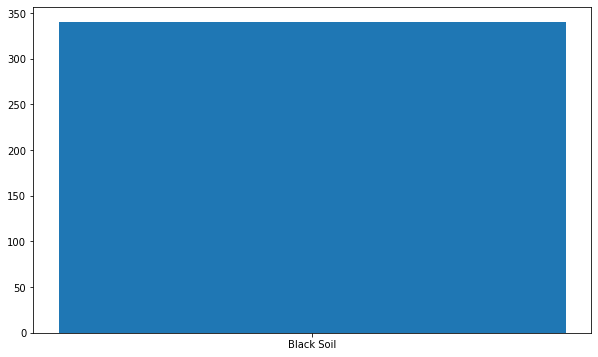

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Turmeric', 'Yam', 'Paddy', 'Banana', 'yam', 'Cotton',
       'Ridge Guard', 'Chilli', 'Vegetables'], dtype=object)

In [14]:
df['Crop'].value_counts()

Chilli         98
Paddy          85
Cotton         80
Turmeric       36
Yam            24
Banana         14
Vegetables      1
yam             1
Ridge Guard     1
Name: Crop, dtype: int64

Paddy + Cotton    165
Chilli             98
Turmeric           36
Yam                25
Banana             14
Name: Crop, dtype: int64


<BarContainer object of 5 artists>

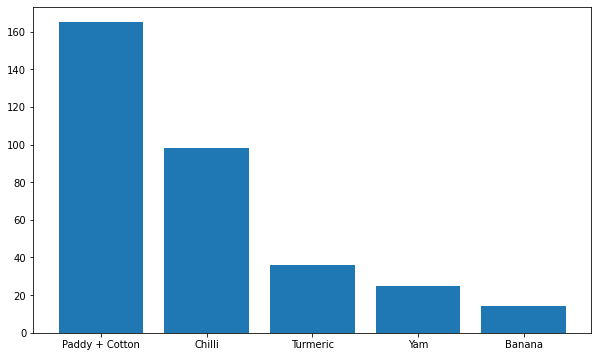

In [15]:
df['Crop'] = df['Crop'].replace('yam', 'Yam')
df['Crop'] = df['Crop'].replace(['Paddy', 'Cotton'], 'Paddy + Cotton')
df = df[(df['Crop'] != 'Vegetables') & (df['Crop'] != 'Ridge Guard')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,-0.401141,-0.299367,-0.403982,-0.037303,-0.264846,-0.370749,-0.274872,-0.139346,-0.244247,-0.573187,-0.611952,-0.546563,-0.256899
EC,-0.401141,1.000000,0.243990,0.196558,0.173598,0.185146,0.240402,0.828407,0.089097,0.441005,0.150949,0.336557,0.336473,0.107733
OC,-0.299367,0.243990,1.000000,0.618067,0.497872,-0.023821,0.110199,0.205578,0.396956,0.272625,0.102547,0.275944,0.374257,0.081386
P,-0.403982,0.196558,0.618067,1.000000,0.483960,-0.157398,0.142226,0.082094,0.479919,0.222239,0.221820,0.313875,0.426199,0.142633
K,-0.037303,0.173598,0.497872,0.483960,1.000000,-0.150087,-0.023388,0.078110,0.416968,0.161344,-0.175868,-0.020528,0.276539,0.028598
Ca,-0.264846,0.185146,-0.023821,-0.157398,-0.150087,1.000000,0.078633,0.094773,-0.098378,0.076135,0.020379,0.054914,0.028215,-0.224763
Mg,-0.370749,0.240402,0.110199,0.142226,-0.023388,0.078633,1.000000,0.342552,0.151412,0.529289,0.653097,0.740648,0.364612,0.715970
S,-0.274872,0.828407,0.205578,0.082094,0.078110,0.094773,0.342552,1.000000,0.074904,0.559119,0.223515,0.374149,0.200183,0.190733
Zn,-0.139346,0.089097,0.396956,0.479919,0.416968,-0.098378,0.151412,0.074904,1.000000,0.203424,0.022695,0.229737,0.227489,0.124785
B,-0.244247,0.441005,0.272625,0.222239,0.161344,0.076135,0.529289,0.559119,0.203424,1.000000,0.424479,0.534559,0.359413,0.336015


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'S', 'B', 'Fe', 'Cu', 'Mn', 'EVI']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Ca', 'Mg', 'Zn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC   OC      K      Ca     Mg    Zn  Black Soil
655  8.27  0.49  0.6  304.0  5734.0  634.0  1.62           1
655    Turmeric
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.714975845410628


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.03 %
Standard Deviation: 5.39 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6956521739130435


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.38 %
Standard Deviation: 7.26 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7681159420289855


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.36 %
Standard Deviation: 3.83 %


In [38]:
# pickle.dump(clf3_3, open('Guntur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Guntur_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7632850241545893


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.22 %
Standard Deviation: 3.62 %


In [44]:
# pickle.dump(clf4_4, open('Guntur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Guntur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7411003236245954
Testing Accuracy:  0.6328502415458938


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.94 %
Standard Deviation: 3.88 %


# Catboost

In [49]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.4266299	total: 142ms	remaining: 14.1s
1:	learn: 1.2018982	total: 143ms	remaining: 7s
2:	learn: 1.1550856	total: 144ms	remaining: 4.64s
3:	learn: 1.1265607	total: 144ms	remaining: 3.46s
4:	learn: 1.0805277	total: 145ms	remaining: 2.75s
5:	learn: 1.0117739	total: 146ms	remaining: 2.28s
6:	learn: 0.9767815	total: 147ms	remaining: 1.95s
7:	learn: 0.9600178	total: 147ms	remaining: 1.69s
8:	learn: 0.9076249	total: 148ms	remaining: 1.5s
9:	learn: 0.8690752	total: 149ms	remaining: 1.34s
10:	learn: 0.8524801	total: 150ms	remaining: 1.21s
11:	learn: 0.8296586	total: 150ms	remaining: 1.1s
12:	learn: 0.8187870	total: 151ms	remaining: 1.01s
13:	learn: 0.7912622	total: 152ms	remaining: 932ms
14:	learn: 0.7800372	total: 153ms	remaining: 864ms
15:	learn: 0.7666057	total: 153ms	remaining: 805ms
16:	learn: 0.7432939	total: 154ms	remaining: 752ms
17:	learn: 0.7393223	total: 155ms	remaining: 705ms
18:	learn: 0.7146404	total: 156ms	remaining: 663ms
19:	learn: 0.7004874	total: 157ms	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.220047489
bestIteration = 99

Training on fold [1/5]

bestTest = 1.173434374
bestIteration = 99

Training on fold [2/5]

bestTest = 1.172156864
bestIteration = 99

Training on fold [3/5]

bestTest = 1.164654333
bestIteration = 99

Training on fold [4/5]

bestTest = 1.152031786
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5921971	test: 1.5926115	best: 1.5926115 (0)	total: 2.46ms	remaining: 2.46s
1:	learn: 1.5754386	test: 1.5780852	best: 1.5780852 (1)	total: 4.14ms	remaining: 2.07s
2:	learn: 1.5597329	test: 1.5628341	best: 1.5628341 (2)	total: 5.71ms	remaining: 1.9s
3:	learn: 1.5472445	test: 1.5517028	best: 1.5517028 (3)	total: 7.24ms	remaining: 1.8s
4:	learn: 1.5301895	test: 1.5355063	best: 1.5355063 (4)	total: 8.96ms	remaining: 1.78s
5:	learn: 1.5164577	test: 1.5223913	best: 1.5223913 (5)	total: 10.8ms	remaining: 1.79s
6:	learn: 1.5028064	test: 1.5082553	best: 1.5082553 (6)	total: 12.4ms	remaining: 1.76s
7:	learn: 1.4879571	test: 1.4949290	best: 1.4949290 (7)	total: 14ms	remaining: 1.74s
8:	learn: 1.4752015	test: 1.4824653	best: 1.4824653 (8)	total: 15.6ms	remaining: 1.72s
9:	learn: 1.4627183	test: 1.4704811	best: 1.4704811 (9)	total: 17.3ms	remaining: 1.71s
10:	learn: 1.4495772	test: 1.4576661	best: 1.4576661 (10)	total: 19ms	remaining: 1.71s
11:	learn: 1.4392931	test: 1.4480749	best: 1.44

97:	learn: 0.9592790	test: 1.0149218	best: 1.0149218 (97)	total: 166ms	remaining: 1.52s
98:	learn: 0.9555994	test: 1.0123684	best: 1.0123684 (98)	total: 167ms	remaining: 1.52s
99:	learn: 0.9541213	test: 1.0108795	best: 1.0108795 (99)	total: 169ms	remaining: 1.52s
100:	learn: 0.9521353	test: 1.0085640	best: 1.0085640 (100)	total: 171ms	remaining: 1.52s
101:	learn: 0.9492637	test: 1.0061219	best: 1.0061219 (101)	total: 172ms	remaining: 1.52s
102:	learn: 0.9452386	test: 1.0020179	best: 1.0020179 (102)	total: 174ms	remaining: 1.51s
103:	learn: 0.9435587	test: 0.9998985	best: 0.9998985 (103)	total: 175ms	remaining: 1.51s
104:	learn: 0.9403232	test: 0.9965407	best: 0.9965407 (104)	total: 177ms	remaining: 1.51s
105:	learn: 0.9364309	test: 0.9936634	best: 0.9936634 (105)	total: 179ms	remaining: 1.51s
106:	learn: 0.9334759	test: 0.9913562	best: 0.9913562 (106)	total: 181ms	remaining: 1.51s
107:	learn: 0.9308965	test: 0.9898398	best: 0.9898398 (107)	total: 183ms	remaining: 1.51s
108:	learn: 0.92

199:	learn: 0.7566208	test: 0.8429840	best: 0.8429840 (199)	total: 341ms	remaining: 1.36s
200:	learn: 0.7547478	test: 0.8417973	best: 0.8417973 (200)	total: 344ms	remaining: 1.36s
201:	learn: 0.7532834	test: 0.8406752	best: 0.8406752 (201)	total: 345ms	remaining: 1.36s
202:	learn: 0.7518608	test: 0.8394624	best: 0.8394624 (202)	total: 348ms	remaining: 1.36s
203:	learn: 0.7500291	test: 0.8382309	best: 0.8382309 (203)	total: 349ms	remaining: 1.36s
204:	learn: 0.7484097	test: 0.8370519	best: 0.8370519 (204)	total: 351ms	remaining: 1.36s
205:	learn: 0.7472760	test: 0.8372294	best: 0.8370519 (204)	total: 353ms	remaining: 1.36s
206:	learn: 0.7460956	test: 0.8366329	best: 0.8366329 (206)	total: 355ms	remaining: 1.36s
207:	learn: 0.7448971	test: 0.8352736	best: 0.8352736 (207)	total: 356ms	remaining: 1.36s
208:	learn: 0.7432080	test: 0.8347109	best: 0.8347109 (208)	total: 358ms	remaining: 1.35s
209:	learn: 0.7413746	test: 0.8330372	best: 0.8330372 (209)	total: 360ms	remaining: 1.35s
210:	learn

377:	learn: 0.5593620	test: 0.7062622	best: 0.7062622 (377)	total: 689ms	remaining: 1.13s
378:	learn: 0.5583409	test: 0.7053839	best: 0.7053839 (378)	total: 691ms	remaining: 1.13s
379:	learn: 0.5579085	test: 0.7049007	best: 0.7049007 (379)	total: 693ms	remaining: 1.13s
380:	learn: 0.5570134	test: 0.7040036	best: 0.7040036 (380)	total: 695ms	remaining: 1.13s
381:	learn: 0.5556227	test: 0.7025126	best: 0.7025126 (381)	total: 697ms	remaining: 1.13s
382:	learn: 0.5552191	test: 0.7022790	best: 0.7022790 (382)	total: 698ms	remaining: 1.13s
383:	learn: 0.5541913	test: 0.7016095	best: 0.7016095 (383)	total: 700ms	remaining: 1.12s
384:	learn: 0.5535113	test: 0.7009332	best: 0.7009332 (384)	total: 702ms	remaining: 1.12s
385:	learn: 0.5524067	test: 0.7001420	best: 0.7001420 (385)	total: 703ms	remaining: 1.12s
386:	learn: 0.5511261	test: 0.6991030	best: 0.6991030 (386)	total: 705ms	remaining: 1.12s
387:	learn: 0.5506368	test: 0.6989576	best: 0.6989576 (387)	total: 707ms	remaining: 1.11s
388:	learn

476:	learn: 0.4857552	test: 0.6632513	best: 0.6632513 (476)	total: 862ms	remaining: 945ms
477:	learn: 0.4851189	test: 0.6628918	best: 0.6628918 (477)	total: 865ms	remaining: 944ms
478:	learn: 0.4846050	test: 0.6623489	best: 0.6623489 (478)	total: 867ms	remaining: 943ms
479:	learn: 0.4839352	test: 0.6617504	best: 0.6617504 (479)	total: 868ms	remaining: 941ms
480:	learn: 0.4831623	test: 0.6614617	best: 0.6614617 (480)	total: 870ms	remaining: 939ms
481:	learn: 0.4824109	test: 0.6607392	best: 0.6607392 (481)	total: 872ms	remaining: 937ms
482:	learn: 0.4812972	test: 0.6601894	best: 0.6601894 (482)	total: 873ms	remaining: 935ms
483:	learn: 0.4805512	test: 0.6595225	best: 0.6595225 (483)	total: 875ms	remaining: 933ms
484:	learn: 0.4797824	test: 0.6594262	best: 0.6594262 (484)	total: 877ms	remaining: 931ms
485:	learn: 0.4791191	test: 0.6593494	best: 0.6593494 (485)	total: 878ms	remaining: 929ms
486:	learn: 0.4787253	test: 0.6588453	best: 0.6588453 (486)	total: 880ms	remaining: 927ms
487:	learn

576:	learn: 0.4254647	test: 0.6236094	best: 0.6236094 (576)	total: 1.03s	remaining: 758ms
577:	learn: 0.4249350	test: 0.6235417	best: 0.6235417 (577)	total: 1.03s	remaining: 756ms
578:	learn: 0.4246069	test: 0.6234621	best: 0.6234621 (578)	total: 1.04s	remaining: 754ms
579:	learn: 0.4240821	test: 0.6232860	best: 0.6232860 (579)	total: 1.04s	remaining: 752ms
580:	learn: 0.4238931	test: 0.6232592	best: 0.6232592 (580)	total: 1.04s	remaining: 750ms
581:	learn: 0.4234210	test: 0.6234469	best: 0.6232592 (580)	total: 1.04s	remaining: 749ms
582:	learn: 0.4229708	test: 0.6231191	best: 0.6231191 (582)	total: 1.04s	remaining: 747ms
583:	learn: 0.4223281	test: 0.6229579	best: 0.6229579 (583)	total: 1.04s	remaining: 745ms
584:	learn: 0.4215819	test: 0.6226732	best: 0.6226732 (584)	total: 1.05s	remaining: 743ms
585:	learn: 0.4210799	test: 0.6226161	best: 0.6226161 (585)	total: 1.05s	remaining: 741ms
586:	learn: 0.4207811	test: 0.6227674	best: 0.6226161 (585)	total: 1.05s	remaining: 739ms
587:	learn

775:	learn: 0.3427283	test: 0.5829664	best: 0.5829664 (775)	total: 1.39s	remaining: 402ms
776:	learn: 0.3426159	test: 0.5829289	best: 0.5829289 (776)	total: 1.4s	remaining: 401ms
777:	learn: 0.3420893	test: 0.5823916	best: 0.5823916 (777)	total: 1.4s	remaining: 399ms
778:	learn: 0.3416726	test: 0.5823036	best: 0.5823036 (778)	total: 1.4s	remaining: 397ms
779:	learn: 0.3414925	test: 0.5822372	best: 0.5822372 (779)	total: 1.4s	remaining: 395ms
780:	learn: 0.3413413	test: 0.5823334	best: 0.5822372 (779)	total: 1.4s	remaining: 393ms
781:	learn: 0.3408572	test: 0.5820197	best: 0.5820197 (781)	total: 1.4s	remaining: 392ms
782:	learn: 0.3405615	test: 0.5820021	best: 0.5820021 (782)	total: 1.41s	remaining: 390ms
783:	learn: 0.3402196	test: 0.5822022	best: 0.5820021 (782)	total: 1.41s	remaining: 388ms
784:	learn: 0.3399864	test: 0.5822361	best: 0.5820021 (782)	total: 1.41s	remaining: 386ms
785:	learn: 0.3398096	test: 0.5823987	best: 0.5820021 (782)	total: 1.41s	remaining: 384ms
786:	learn: 0.33

970:	learn: 0.2820874	test: 0.5530749	best: 0.5529283 (969)	total: 1.74s	remaining: 51.9ms
971:	learn: 0.2817511	test: 0.5528597	best: 0.5528597 (971)	total: 1.74s	remaining: 50.1ms
972:	learn: 0.2816555	test: 0.5527333	best: 0.5527333 (972)	total: 1.74s	remaining: 48.3ms
973:	learn: 0.2814868	test: 0.5525972	best: 0.5525972 (973)	total: 1.74s	remaining: 46.5ms
974:	learn: 0.2811681	test: 0.5524899	best: 0.5524899 (974)	total: 1.74s	remaining: 44.7ms
975:	learn: 0.2809863	test: 0.5524659	best: 0.5524659 (975)	total: 1.74s	remaining: 42.9ms
976:	learn: 0.2804943	test: 0.5521502	best: 0.5521502 (976)	total: 1.75s	remaining: 41.1ms
977:	learn: 0.2802455	test: 0.5521264	best: 0.5521264 (977)	total: 1.75s	remaining: 39.3ms
978:	learn: 0.2800071	test: 0.5522592	best: 0.5521264 (977)	total: 1.75s	remaining: 37.5ms
979:	learn: 0.2795478	test: 0.5522091	best: 0.5521264 (977)	total: 1.75s	remaining: 35.7ms
980:	learn: 0.2792341	test: 0.5521747	best: 0.5521264 (977)	total: 1.75s	remaining: 34ms
9

154:	learn: 0.4728062	test: 0.6506709	best: 0.6499364 (153)	total: 275ms	remaining: 1.5s
155:	learn: 0.4717276	test: 0.6495464	best: 0.6495464 (155)	total: 277ms	remaining: 1.5s
156:	learn: 0.4703257	test: 0.6514062	best: 0.6495464 (155)	total: 279ms	remaining: 1.5s
157:	learn: 0.4689102	test: 0.6497948	best: 0.6495464 (155)	total: 280ms	remaining: 1.49s
158:	learn: 0.4661709	test: 0.6476698	best: 0.6476698 (158)	total: 282ms	remaining: 1.49s
159:	learn: 0.4643122	test: 0.6457952	best: 0.6457952 (159)	total: 284ms	remaining: 1.49s
160:	learn: 0.4630381	test: 0.6449713	best: 0.6449713 (160)	total: 285ms	remaining: 1.49s
161:	learn: 0.4615637	test: 0.6444534	best: 0.6444534 (161)	total: 287ms	remaining: 1.48s
162:	learn: 0.4588148	test: 0.6423254	best: 0.6423254 (162)	total: 288ms	remaining: 1.48s
163:	learn: 0.4578561	test: 0.6409332	best: 0.6409332 (163)	total: 290ms	remaining: 1.48s
164:	learn: 0.4561542	test: 0.6402268	best: 0.6402268 (164)	total: 292ms	remaining: 1.48s
165:	learn: 0

259:	learn: 0.3174375	test: 0.5652103	best: 0.5645845 (257)	total: 456ms	remaining: 1.3s
260:	learn: 0.3168349	test: 0.5649072	best: 0.5645845 (257)	total: 458ms	remaining: 1.3s
261:	learn: 0.3161466	test: 0.5638194	best: 0.5638194 (261)	total: 460ms	remaining: 1.3s
262:	learn: 0.3148515	test: 0.5635771	best: 0.5635771 (262)	total: 462ms	remaining: 1.29s
263:	learn: 0.3140212	test: 0.5637084	best: 0.5635771 (262)	total: 464ms	remaining: 1.29s
264:	learn: 0.3130581	test: 0.5628024	best: 0.5628024 (264)	total: 465ms	remaining: 1.29s
265:	learn: 0.3126794	test: 0.5623688	best: 0.5623688 (265)	total: 467ms	remaining: 1.29s
266:	learn: 0.3122905	test: 0.5622938	best: 0.5622938 (266)	total: 469ms	remaining: 1.29s
267:	learn: 0.3107519	test: 0.5611180	best: 0.5611180 (267)	total: 471ms	remaining: 1.28s
268:	learn: 0.3102393	test: 0.5607135	best: 0.5607135 (268)	total: 472ms	remaining: 1.28s
269:	learn: 0.3090448	test: 0.5588780	best: 0.5588780 (269)	total: 474ms	remaining: 1.28s
270:	learn: 0

358:	learn: 0.2363862	test: 0.5367552	best: 0.5361179 (356)	total: 630ms	remaining: 1.12s
359:	learn: 0.2357249	test: 0.5364172	best: 0.5361179 (356)	total: 633ms	remaining: 1.12s
360:	learn: 0.2353317	test: 0.5368383	best: 0.5361179 (356)	total: 635ms	remaining: 1.12s
361:	learn: 0.2341299	test: 0.5364190	best: 0.5361179 (356)	total: 637ms	remaining: 1.12s
362:	learn: 0.2336310	test: 0.5361689	best: 0.5361179 (356)	total: 640ms	remaining: 1.12s
363:	learn: 0.2328945	test: 0.5357872	best: 0.5357872 (363)	total: 642ms	remaining: 1.12s
364:	learn: 0.2323700	test: 0.5356154	best: 0.5356154 (364)	total: 645ms	remaining: 1.12s
365:	learn: 0.2313086	test: 0.5349493	best: 0.5349493 (365)	total: 647ms	remaining: 1.12s
366:	learn: 0.2304941	test: 0.5352457	best: 0.5349493 (365)	total: 649ms	remaining: 1.12s
367:	learn: 0.2300577	test: 0.5353896	best: 0.5349493 (365)	total: 651ms	remaining: 1.12s
368:	learn: 0.2296712	test: 0.5342671	best: 0.5342671 (368)	total: 652ms	remaining: 1.11s
369:	learn

454:	learn: 0.1841902	test: 0.5221317	best: 0.5214031 (452)	total: 798ms	remaining: 956ms
455:	learn: 0.1839980	test: 0.5228382	best: 0.5214031 (452)	total: 800ms	remaining: 955ms
456:	learn: 0.1836588	test: 0.5229200	best: 0.5214031 (452)	total: 802ms	remaining: 953ms
457:	learn: 0.1833107	test: 0.5226559	best: 0.5214031 (452)	total: 803ms	remaining: 951ms
458:	learn: 0.1829350	test: 0.5218192	best: 0.5214031 (452)	total: 806ms	remaining: 950ms
459:	learn: 0.1827349	test: 0.5215758	best: 0.5214031 (452)	total: 808ms	remaining: 949ms
460:	learn: 0.1821572	test: 0.5204298	best: 0.5204298 (460)	total: 810ms	remaining: 947ms
461:	learn: 0.1817172	test: 0.5199531	best: 0.5199531 (461)	total: 813ms	remaining: 946ms
462:	learn: 0.1810602	test: 0.5185258	best: 0.5185258 (462)	total: 814ms	remaining: 945ms
463:	learn: 0.1805335	test: 0.5183683	best: 0.5183683 (463)	total: 816ms	remaining: 943ms
464:	learn: 0.1801832	test: 0.5183238	best: 0.5183238 (464)	total: 818ms	remaining: 941ms
465:	learn

549:	learn: 0.1490459	test: 0.5064381	best: 0.5064381 (549)	total: 969ms	remaining: 793ms
550:	learn: 0.1489062	test: 0.5069033	best: 0.5064381 (549)	total: 971ms	remaining: 792ms
551:	learn: 0.1485974	test: 0.5072434	best: 0.5064381 (549)	total: 974ms	remaining: 790ms
552:	learn: 0.1484353	test: 0.5069341	best: 0.5064381 (549)	total: 976ms	remaining: 789ms
553:	learn: 0.1481868	test: 0.5067029	best: 0.5064381 (549)	total: 979ms	remaining: 788ms
554:	learn: 0.1478857	test: 0.5068767	best: 0.5064381 (549)	total: 981ms	remaining: 787ms
555:	learn: 0.1477910	test: 0.5070600	best: 0.5064381 (549)	total: 984ms	remaining: 785ms
556:	learn: 0.1476646	test: 0.5066794	best: 0.5064381 (549)	total: 987ms	remaining: 785ms
557:	learn: 0.1475511	test: 0.5059527	best: 0.5059527 (557)	total: 989ms	remaining: 784ms
558:	learn: 0.1472652	test: 0.5061417	best: 0.5059527 (557)	total: 992ms	remaining: 782ms
559:	learn: 0.1467976	test: 0.5068534	best: 0.5059527 (557)	total: 993ms	remaining: 781ms
560:	learn

652:	learn: 0.1227999	test: 0.5068180	best: 0.5050263 (564)	total: 1.15s	remaining: 613ms
653:	learn: 0.1226664	test: 0.5069810	best: 0.5050263 (564)	total: 1.15s	remaining: 611ms
654:	learn: 0.1223035	test: 0.5067494	best: 0.5050263 (564)	total: 1.16s	remaining: 609ms
655:	learn: 0.1219961	test: 0.5061736	best: 0.5050263 (564)	total: 1.16s	remaining: 608ms
656:	learn: 0.1217768	test: 0.5058429	best: 0.5050263 (564)	total: 1.16s	remaining: 606ms
657:	learn: 0.1213548	test: 0.5060477	best: 0.5050263 (564)	total: 1.16s	remaining: 605ms
658:	learn: 0.1211293	test: 0.5060309	best: 0.5050263 (564)	total: 1.17s	remaining: 603ms
659:	learn: 0.1209890	test: 0.5064596	best: 0.5050263 (564)	total: 1.17s	remaining: 602ms
660:	learn: 0.1207560	test: 0.5066039	best: 0.5050263 (564)	total: 1.17s	remaining: 600ms
661:	learn: 0.1205756	test: 0.5067896	best: 0.5050263 (564)	total: 1.17s	remaining: 598ms
662:	learn: 0.1199834	test: 0.5056599	best: 0.5050263 (564)	total: 1.17s	remaining: 597ms
663:	learn

750:	learn: 0.1021764	test: 0.5024807	best: 0.5019827 (749)	total: 1.32s	remaining: 438ms
751:	learn: 0.1019409	test: 0.5022125	best: 0.5019827 (749)	total: 1.32s	remaining: 437ms
752:	learn: 0.1016881	test: 0.5025549	best: 0.5019827 (749)	total: 1.33s	remaining: 435ms
753:	learn: 0.1016165	test: 0.5026109	best: 0.5019827 (749)	total: 1.33s	remaining: 433ms
754:	learn: 0.1015588	test: 0.5026618	best: 0.5019827 (749)	total: 1.33s	remaining: 432ms
755:	learn: 0.1012680	test: 0.5032235	best: 0.5019827 (749)	total: 1.33s	remaining: 430ms
756:	learn: 0.1012120	test: 0.5032447	best: 0.5019827 (749)	total: 1.33s	remaining: 428ms
757:	learn: 0.1010997	test: 0.5029231	best: 0.5019827 (749)	total: 1.34s	remaining: 427ms
758:	learn: 0.1009513	test: 0.5030800	best: 0.5019827 (749)	total: 1.34s	remaining: 425ms
759:	learn: 0.1006789	test: 0.5029051	best: 0.5019827 (749)	total: 1.34s	remaining: 423ms
760:	learn: 0.1006043	test: 0.5025560	best: 0.5019827 (749)	total: 1.34s	remaining: 422ms
761:	learn

849:	learn: 0.0883839	test: 0.5011033	best: 0.5002687 (826)	total: 1.49s	remaining: 263ms
850:	learn: 0.0883219	test: 0.5014027	best: 0.5002687 (826)	total: 1.49s	remaining: 262ms
851:	learn: 0.0882470	test: 0.5012858	best: 0.5002687 (826)	total: 1.5s	remaining: 260ms
852:	learn: 0.0881056	test: 0.5014557	best: 0.5002687 (826)	total: 1.5s	remaining: 258ms
853:	learn: 0.0878207	test: 0.5017572	best: 0.5002687 (826)	total: 1.5s	remaining: 257ms
854:	learn: 0.0876339	test: 0.5016140	best: 0.5002687 (826)	total: 1.5s	remaining: 255ms
855:	learn: 0.0875505	test: 0.5014062	best: 0.5002687 (826)	total: 1.5s	remaining: 253ms
856:	learn: 0.0874708	test: 0.5017263	best: 0.5002687 (826)	total: 1.5s	remaining: 251ms
857:	learn: 0.0871612	test: 0.5017973	best: 0.5002687 (826)	total: 1.51s	remaining: 249ms
858:	learn: 0.0870655	test: 0.5015637	best: 0.5002687 (826)	total: 1.51s	remaining: 248ms
859:	learn: 0.0869930	test: 0.5014340	best: 0.5002687 (826)	total: 1.51s	remaining: 246ms
860:	learn: 0.08

956:	learn: 0.0756367	test: 0.5037630	best: 0.4999071 (872)	total: 1.68s	remaining: 75.3ms
957:	learn: 0.0755362	test: 0.5042818	best: 0.4999071 (872)	total: 1.68s	remaining: 73.5ms
958:	learn: 0.0753074	test: 0.5037451	best: 0.4999071 (872)	total: 1.68s	remaining: 71.8ms
959:	learn: 0.0752367	test: 0.5041801	best: 0.4999071 (872)	total: 1.68s	remaining: 70.1ms
960:	learn: 0.0751739	test: 0.5044830	best: 0.4999071 (872)	total: 1.68s	remaining: 68.4ms
961:	learn: 0.0750834	test: 0.5042529	best: 0.4999071 (872)	total: 1.69s	remaining: 66.6ms
962:	learn: 0.0749607	test: 0.5046606	best: 0.4999071 (872)	total: 1.69s	remaining: 64.9ms
963:	learn: 0.0748946	test: 0.5045279	best: 0.4999071 (872)	total: 1.69s	remaining: 63.1ms
964:	learn: 0.0748122	test: 0.5045359	best: 0.4999071 (872)	total: 1.69s	remaining: 61.4ms
965:	learn: 0.0746981	test: 0.5048437	best: 0.4999071 (872)	total: 1.69s	remaining: 59.6ms
966:	learn: 0.0745702	test: 0.5048379	best: 0.4999071 (872)	total: 1.7s	remaining: 57.9ms


49:	learn: 1.0651998	test: 1.1402132	best: 1.1402132 (49)	total: 289ms	remaining: 5.5s
50:	learn: 1.0596452	test: 1.1347898	best: 1.1347898 (50)	total: 296ms	remaining: 5.5s
51:	learn: 1.0524992	test: 1.1295166	best: 1.1295166 (51)	total: 301ms	remaining: 5.49s
52:	learn: 1.0463352	test: 1.1251196	best: 1.1251196 (52)	total: 308ms	remaining: 5.51s
53:	learn: 1.0391643	test: 1.1180466	best: 1.1180466 (53)	total: 314ms	remaining: 5.5s
54:	learn: 1.0335807	test: 1.1124898	best: 1.1124898 (54)	total: 320ms	remaining: 5.5s
55:	learn: 1.0278917	test: 1.1073889	best: 1.1073889 (55)	total: 325ms	remaining: 5.49s
56:	learn: 1.0229714	test: 1.1030405	best: 1.1030405 (56)	total: 331ms	remaining: 5.48s
57:	learn: 1.0156048	test: 1.0962355	best: 1.0962355 (57)	total: 337ms	remaining: 5.47s
58:	learn: 1.0091838	test: 1.0909993	best: 1.0909993 (58)	total: 343ms	remaining: 5.47s
59:	learn: 1.0041993	test: 1.0878200	best: 1.0878200 (59)	total: 348ms	remaining: 5.46s
60:	learn: 0.9989316	test: 1.0832803

148:	learn: 0.6884474	test: 0.8311518	best: 0.8311518 (148)	total: 867ms	remaining: 4.95s
149:	learn: 0.6863550	test: 0.8294291	best: 0.8294291 (149)	total: 874ms	remaining: 4.95s
150:	learn: 0.6843964	test: 0.8280546	best: 0.8280546 (150)	total: 880ms	remaining: 4.95s
151:	learn: 0.6823492	test: 0.8271199	best: 0.8271199 (151)	total: 887ms	remaining: 4.95s
152:	learn: 0.6806330	test: 0.8266484	best: 0.8266484 (152)	total: 892ms	remaining: 4.94s
153:	learn: 0.6774523	test: 0.8245239	best: 0.8245239 (153)	total: 899ms	remaining: 4.93s
154:	learn: 0.6753648	test: 0.8226076	best: 0.8226076 (154)	total: 905ms	remaining: 4.93s
155:	learn: 0.6726659	test: 0.8206140	best: 0.8206140 (155)	total: 911ms	remaining: 4.93s
156:	learn: 0.6702456	test: 0.8187874	best: 0.8187874 (156)	total: 916ms	remaining: 4.92s
157:	learn: 0.6670812	test: 0.8164186	best: 0.8164186 (157)	total: 923ms	remaining: 4.92s
158:	learn: 0.6643933	test: 0.8144504	best: 0.8144504 (158)	total: 928ms	remaining: 4.91s
159:	learn

249:	learn: 0.5122541	test: 0.7061211	best: 0.7061211 (249)	total: 1.44s	remaining: 4.31s
250:	learn: 0.5109894	test: 0.7055593	best: 0.7055593 (250)	total: 1.44s	remaining: 4.3s
251:	learn: 0.5100372	test: 0.7048965	best: 0.7048965 (251)	total: 1.45s	remaining: 4.29s
252:	learn: 0.5086834	test: 0.7038733	best: 0.7038733 (252)	total: 1.45s	remaining: 4.29s
253:	learn: 0.5075378	test: 0.7030207	best: 0.7030207 (253)	total: 1.46s	remaining: 4.28s
254:	learn: 0.5066669	test: 0.7022754	best: 0.7022754 (254)	total: 1.46s	remaining: 4.28s
255:	learn: 0.5057483	test: 0.7016578	best: 0.7016578 (255)	total: 1.47s	remaining: 4.27s
256:	learn: 0.5047423	test: 0.7017043	best: 0.7016578 (255)	total: 1.47s	remaining: 4.26s
257:	learn: 0.5035512	test: 0.7016520	best: 0.7016520 (257)	total: 1.48s	remaining: 4.25s
258:	learn: 0.5020101	test: 0.7007574	best: 0.7007574 (258)	total: 1.48s	remaining: 4.25s
259:	learn: 0.5007357	test: 0.6999425	best: 0.6999425 (259)	total: 1.49s	remaining: 4.24s
260:	learn:

365:	learn: 0.3889348	test: 0.6342696	best: 0.6342696 (365)	total: 2.02s	remaining: 3.5s
366:	learn: 0.3881896	test: 0.6334797	best: 0.6334797 (366)	total: 2.02s	remaining: 3.49s
367:	learn: 0.3871608	test: 0.6321184	best: 0.6321184 (367)	total: 2.03s	remaining: 3.49s
368:	learn: 0.3860173	test: 0.6315673	best: 0.6315673 (368)	total: 2.04s	remaining: 3.48s
369:	learn: 0.3850598	test: 0.6308696	best: 0.6308696 (369)	total: 2.04s	remaining: 3.48s
370:	learn: 0.3845095	test: 0.6309630	best: 0.6308696 (369)	total: 2.05s	remaining: 3.47s
371:	learn: 0.3837854	test: 0.6302631	best: 0.6302631 (371)	total: 2.05s	remaining: 3.47s
372:	learn: 0.3829763	test: 0.6298559	best: 0.6298559 (372)	total: 2.06s	remaining: 3.46s
373:	learn: 0.3819340	test: 0.6290267	best: 0.6290267 (373)	total: 2.06s	remaining: 3.45s
374:	learn: 0.3815074	test: 0.6288110	best: 0.6288110 (374)	total: 2.07s	remaining: 3.45s
375:	learn: 0.3804679	test: 0.6283543	best: 0.6283543 (375)	total: 2.07s	remaining: 3.44s
376:	learn:

477:	learn: 0.3084258	test: 0.5887519	best: 0.5887519 (477)	total: 2.58s	remaining: 2.82s
478:	learn: 0.3080088	test: 0.5884376	best: 0.5884376 (478)	total: 2.59s	remaining: 2.82s
479:	learn: 0.3075207	test: 0.5882324	best: 0.5882324 (479)	total: 2.59s	remaining: 2.81s
480:	learn: 0.3070062	test: 0.5876313	best: 0.5876313 (480)	total: 2.6s	remaining: 2.8s
481:	learn: 0.3062166	test: 0.5872240	best: 0.5872240 (481)	total: 2.6s	remaining: 2.8s
482:	learn: 0.3056003	test: 0.5868771	best: 0.5868771 (482)	total: 2.61s	remaining: 2.79s
483:	learn: 0.3051801	test: 0.5866214	best: 0.5866214 (483)	total: 2.62s	remaining: 2.79s
484:	learn: 0.3046929	test: 0.5863460	best: 0.5863460 (484)	total: 2.62s	remaining: 2.78s
485:	learn: 0.3041663	test: 0.5860100	best: 0.5860100 (485)	total: 2.63s	remaining: 2.78s
486:	learn: 0.3038444	test: 0.5857398	best: 0.5857398 (486)	total: 2.63s	remaining: 2.77s
487:	learn: 0.3032388	test: 0.5852941	best: 0.5852941 (487)	total: 2.64s	remaining: 2.77s
488:	learn: 0.

591:	learn: 0.2523452	test: 0.5608752	best: 0.5608752 (591)	total: 3.17s	remaining: 2.18s
592:	learn: 0.2519022	test: 0.5607229	best: 0.5607229 (592)	total: 3.17s	remaining: 2.18s
593:	learn: 0.2513908	test: 0.5605964	best: 0.5605964 (593)	total: 3.18s	remaining: 2.17s
594:	learn: 0.2511027	test: 0.5605863	best: 0.5605863 (594)	total: 3.18s	remaining: 2.17s
595:	learn: 0.2506908	test: 0.5606695	best: 0.5605863 (594)	total: 3.19s	remaining: 2.16s
596:	learn: 0.2502487	test: 0.5605792	best: 0.5605792 (596)	total: 3.19s	remaining: 2.16s
597:	learn: 0.2496627	test: 0.5602382	best: 0.5602382 (597)	total: 3.2s	remaining: 2.15s
598:	learn: 0.2491605	test: 0.5600566	best: 0.5600566 (598)	total: 3.21s	remaining: 2.15s
599:	learn: 0.2485305	test: 0.5598949	best: 0.5598949 (599)	total: 3.21s	remaining: 2.14s
600:	learn: 0.2481508	test: 0.5597976	best: 0.5597976 (600)	total: 3.22s	remaining: 2.14s
601:	learn: 0.2475514	test: 0.5598598	best: 0.5597976 (600)	total: 3.22s	remaining: 2.13s
602:	learn:

693:	learn: 0.2128867	test: 0.5412826	best: 0.5412826 (693)	total: 3.73s	remaining: 1.65s
694:	learn: 0.2125854	test: 0.5410257	best: 0.5410257 (694)	total: 3.74s	remaining: 1.64s
695:	learn: 0.2123331	test: 0.5411141	best: 0.5410257 (694)	total: 3.74s	remaining: 1.63s
696:	learn: 0.2121081	test: 0.5410180	best: 0.5410180 (696)	total: 3.75s	remaining: 1.63s
697:	learn: 0.2118176	test: 0.5408431	best: 0.5408431 (697)	total: 3.75s	remaining: 1.62s
698:	learn: 0.2116255	test: 0.5404815	best: 0.5404815 (698)	total: 3.76s	remaining: 1.62s
699:	learn: 0.2113491	test: 0.5404202	best: 0.5404202 (699)	total: 3.76s	remaining: 1.61s
700:	learn: 0.2110856	test: 0.5401767	best: 0.5401767 (700)	total: 3.77s	remaining: 1.61s
701:	learn: 0.2108210	test: 0.5400187	best: 0.5400187 (701)	total: 3.77s	remaining: 1.6s
702:	learn: 0.2104489	test: 0.5399722	best: 0.5399722 (702)	total: 3.78s	remaining: 1.6s
703:	learn: 0.2099302	test: 0.5394886	best: 0.5394886 (703)	total: 3.79s	remaining: 1.59s
704:	learn: 

809:	learn: 0.1800207	test: 0.5306299	best: 0.5306299 (809)	total: 4.31s	remaining: 1.01s
810:	learn: 0.1797997	test: 0.5303599	best: 0.5303599 (810)	total: 4.32s	remaining: 1.01s
811:	learn: 0.1796255	test: 0.5302679	best: 0.5302679 (811)	total: 4.33s	remaining: 1s
812:	learn: 0.1792793	test: 0.5301205	best: 0.5301205 (812)	total: 4.33s	remaining: 996ms
813:	learn: 0.1790544	test: 0.5300133	best: 0.5300133 (813)	total: 4.34s	remaining: 991ms
814:	learn: 0.1785892	test: 0.5298663	best: 0.5298663 (814)	total: 4.34s	remaining: 986ms
815:	learn: 0.1782959	test: 0.5295607	best: 0.5295607 (815)	total: 4.35s	remaining: 981ms
816:	learn: 0.1779513	test: 0.5293099	best: 0.5293099 (816)	total: 4.35s	remaining: 975ms
817:	learn: 0.1776970	test: 0.5293746	best: 0.5293099 (816)	total: 4.36s	remaining: 970ms
818:	learn: 0.1775210	test: 0.5294816	best: 0.5293099 (816)	total: 4.36s	remaining: 964ms
819:	learn: 0.1773216	test: 0.5293484	best: 0.5293099 (816)	total: 4.37s	remaining: 959ms
820:	learn: 0

925:	learn: 0.1560157	test: 0.5199658	best: 0.5199658 (925)	total: 4.89s	remaining: 391ms
926:	learn: 0.1557777	test: 0.5196617	best: 0.5196617 (926)	total: 4.9s	remaining: 386ms
927:	learn: 0.1555726	test: 0.5194557	best: 0.5194557 (927)	total: 4.91s	remaining: 381ms
928:	learn: 0.1554701	test: 0.5193779	best: 0.5193779 (928)	total: 4.91s	remaining: 375ms
929:	learn: 0.1552703	test: 0.5192325	best: 0.5192325 (929)	total: 4.92s	remaining: 370ms
930:	learn: 0.1550607	test: 0.5194162	best: 0.5192325 (929)	total: 4.92s	remaining: 365ms
931:	learn: 0.1548404	test: 0.5193370	best: 0.5192325 (929)	total: 4.93s	remaining: 360ms
932:	learn: 0.1545891	test: 0.5190898	best: 0.5190898 (932)	total: 4.93s	remaining: 354ms
933:	learn: 0.1544079	test: 0.5191375	best: 0.5190898 (932)	total: 4.94s	remaining: 349ms
934:	learn: 0.1540608	test: 0.5193381	best: 0.5190898 (932)	total: 4.94s	remaining: 344ms
935:	learn: 0.1539185	test: 0.5195130	best: 0.5190898 (932)	total: 4.95s	remaining: 338ms
936:	learn:

37:	learn: 0.7299545	test: 0.8577357	best: 0.8577357 (37)	total: 198ms	remaining: 5.02s
38:	learn: 0.7193982	test: 0.8485537	best: 0.8485537 (38)	total: 204ms	remaining: 5.01s
39:	learn: 0.7095517	test: 0.8429488	best: 0.8429488 (39)	total: 209ms	remaining: 5.01s
40:	learn: 0.7047200	test: 0.8410745	best: 0.8410745 (40)	total: 214ms	remaining: 5.01s
41:	learn: 0.6962722	test: 0.8349412	best: 0.8349412 (41)	total: 221ms	remaining: 5.05s
42:	learn: 0.6893374	test: 0.8318636	best: 0.8318636 (42)	total: 227ms	remaining: 5.04s
43:	learn: 0.6822166	test: 0.8246201	best: 0.8246201 (43)	total: 232ms	remaining: 5.05s
44:	learn: 0.6757405	test: 0.8216362	best: 0.8216362 (44)	total: 237ms	remaining: 5.04s
45:	learn: 0.6701623	test: 0.8187207	best: 0.8187207 (45)	total: 242ms	remaining: 5.02s
46:	learn: 0.6637716	test: 0.8142307	best: 0.8142307 (46)	total: 247ms	remaining: 5.02s
47:	learn: 0.6576984	test: 0.8101364	best: 0.8101364 (47)	total: 252ms	remaining: 5.01s
48:	learn: 0.6484078	test: 0.804

145:	learn: 0.2962341	test: 0.5659443	best: 0.5659443 (145)	total: 751ms	remaining: 4.39s
146:	learn: 0.2948034	test: 0.5652556	best: 0.5652556 (146)	total: 756ms	remaining: 4.39s
147:	learn: 0.2930815	test: 0.5637455	best: 0.5637455 (147)	total: 762ms	remaining: 4.38s
148:	learn: 0.2905441	test: 0.5606536	best: 0.5606536 (148)	total: 767ms	remaining: 4.38s
149:	learn: 0.2878718	test: 0.5583858	best: 0.5583858 (149)	total: 775ms	remaining: 4.39s
150:	learn: 0.2855498	test: 0.5559810	best: 0.5559810 (150)	total: 782ms	remaining: 4.39s
151:	learn: 0.2845510	test: 0.5555446	best: 0.5555446 (151)	total: 787ms	remaining: 4.39s
152:	learn: 0.2833867	test: 0.5544986	best: 0.5544986 (152)	total: 792ms	remaining: 4.39s
153:	learn: 0.2815592	test: 0.5547412	best: 0.5544986 (152)	total: 799ms	remaining: 4.39s
154:	learn: 0.2803369	test: 0.5542423	best: 0.5542423 (154)	total: 804ms	remaining: 4.38s
155:	learn: 0.2790307	test: 0.5526042	best: 0.5526042 (155)	total: 809ms	remaining: 4.38s
156:	learn

258:	learn: 0.1675338	test: 0.4996433	best: 0.4990607 (254)	total: 1.33s	remaining: 3.82s
259:	learn: 0.1670894	test: 0.4995850	best: 0.4990607 (254)	total: 1.34s	remaining: 3.83s
260:	learn: 0.1664302	test: 0.4994099	best: 0.4990607 (254)	total: 1.35s	remaining: 3.83s
261:	learn: 0.1658701	test: 0.4989297	best: 0.4989297 (261)	total: 1.36s	remaining: 3.83s
262:	learn: 0.1649083	test: 0.4982041	best: 0.4982041 (262)	total: 1.37s	remaining: 3.83s
263:	learn: 0.1644029	test: 0.4973814	best: 0.4973814 (263)	total: 1.37s	remaining: 3.83s
264:	learn: 0.1636708	test: 0.4977285	best: 0.4973814 (263)	total: 1.38s	remaining: 3.82s
265:	learn: 0.1632822	test: 0.4974998	best: 0.4973814 (263)	total: 1.38s	remaining: 3.82s
266:	learn: 0.1625066	test: 0.4974207	best: 0.4973814 (263)	total: 1.39s	remaining: 3.81s
267:	learn: 0.1620014	test: 0.4971297	best: 0.4971297 (267)	total: 1.39s	remaining: 3.81s
268:	learn: 0.1614696	test: 0.4970300	best: 0.4970300 (268)	total: 1.4s	remaining: 3.8s
269:	learn: 

371:	learn: 0.1108654	test: 0.4791572	best: 0.4791469 (367)	total: 1.92s	remaining: 3.23s
372:	learn: 0.1105234	test: 0.4795852	best: 0.4791469 (367)	total: 1.92s	remaining: 3.23s
373:	learn: 0.1100426	test: 0.4794123	best: 0.4791469 (367)	total: 1.93s	remaining: 3.23s
374:	learn: 0.1097278	test: 0.4788442	best: 0.4788442 (374)	total: 1.93s	remaining: 3.22s
375:	learn: 0.1094026	test: 0.4785262	best: 0.4785262 (375)	total: 1.94s	remaining: 3.22s
376:	learn: 0.1089193	test: 0.4781592	best: 0.4781592 (376)	total: 1.94s	remaining: 3.21s
377:	learn: 0.1087897	test: 0.4781348	best: 0.4781348 (377)	total: 1.95s	remaining: 3.21s
378:	learn: 0.1085641	test: 0.4778062	best: 0.4778062 (378)	total: 1.96s	remaining: 3.2s
379:	learn: 0.1084256	test: 0.4775581	best: 0.4775581 (379)	total: 1.96s	remaining: 3.2s
380:	learn: 0.1080638	test: 0.4775518	best: 0.4775518 (380)	total: 1.97s	remaining: 3.19s
381:	learn: 0.1076958	test: 0.4772398	best: 0.4772398 (381)	total: 1.97s	remaining: 3.19s
382:	learn: 

486:	learn: 0.0794364	test: 0.4763373	best: 0.4734799 (427)	total: 2.5s	remaining: 2.63s
487:	learn: 0.0791978	test: 0.4761740	best: 0.4734799 (427)	total: 2.5s	remaining: 2.63s
488:	learn: 0.0788932	test: 0.4757491	best: 0.4734799 (427)	total: 2.51s	remaining: 2.62s
489:	learn: 0.0786951	test: 0.4756711	best: 0.4734799 (427)	total: 2.52s	remaining: 2.62s
490:	learn: 0.0784884	test: 0.4757017	best: 0.4734799 (427)	total: 2.52s	remaining: 2.62s
491:	learn: 0.0782401	test: 0.4751572	best: 0.4734799 (427)	total: 2.53s	remaining: 2.61s
492:	learn: 0.0780934	test: 0.4749469	best: 0.4734799 (427)	total: 2.53s	remaining: 2.6s
493:	learn: 0.0778845	test: 0.4749827	best: 0.4734799 (427)	total: 2.54s	remaining: 2.6s
494:	learn: 0.0777457	test: 0.4748061	best: 0.4734799 (427)	total: 2.54s	remaining: 2.6s
495:	learn: 0.0774946	test: 0.4745293	best: 0.4734799 (427)	total: 2.55s	remaining: 2.59s
496:	learn: 0.0772452	test: 0.4747154	best: 0.4734799 (427)	total: 2.55s	remaining: 2.58s
497:	learn: 0.0

601:	learn: 0.0601616	test: 0.4731755	best: 0.4713193 (554)	total: 3.08s	remaining: 2.04s
602:	learn: 0.0600323	test: 0.4733144	best: 0.4713193 (554)	total: 3.09s	remaining: 2.03s
603:	learn: 0.0599140	test: 0.4731944	best: 0.4713193 (554)	total: 3.1s	remaining: 2.03s
604:	learn: 0.0596933	test: 0.4734228	best: 0.4713193 (554)	total: 3.1s	remaining: 2.02s
605:	learn: 0.0595546	test: 0.4734485	best: 0.4713193 (554)	total: 3.11s	remaining: 2.02s
606:	learn: 0.0594263	test: 0.4732746	best: 0.4713193 (554)	total: 3.11s	remaining: 2.02s
607:	learn: 0.0593419	test: 0.4730755	best: 0.4713193 (554)	total: 3.12s	remaining: 2.01s
608:	learn: 0.0592003	test: 0.4730907	best: 0.4713193 (554)	total: 3.12s	remaining: 2s
609:	learn: 0.0591043	test: 0.4730279	best: 0.4713193 (554)	total: 3.13s	remaining: 2s
610:	learn: 0.0590179	test: 0.4729252	best: 0.4713193 (554)	total: 3.13s	remaining: 2s
611:	learn: 0.0589384	test: 0.4728596	best: 0.4713193 (554)	total: 3.14s	remaining: 1.99s
612:	learn: 0.0588937

712:	learn: 0.0485674	test: 0.4750035	best: 0.4713193 (554)	total: 3.65s	remaining: 1.47s
713:	learn: 0.0484593	test: 0.4755516	best: 0.4713193 (554)	total: 3.65s	remaining: 1.46s
714:	learn: 0.0483863	test: 0.4756535	best: 0.4713193 (554)	total: 3.66s	remaining: 1.46s
715:	learn: 0.0482902	test: 0.4760056	best: 0.4713193 (554)	total: 3.67s	remaining: 1.45s
716:	learn: 0.0482140	test: 0.4762544	best: 0.4713193 (554)	total: 3.67s	remaining: 1.45s
717:	learn: 0.0480934	test: 0.4768043	best: 0.4713193 (554)	total: 3.68s	remaining: 1.44s
718:	learn: 0.0480229	test: 0.4767134	best: 0.4713193 (554)	total: 3.68s	remaining: 1.44s
719:	learn: 0.0478929	test: 0.4764777	best: 0.4713193 (554)	total: 3.69s	remaining: 1.43s
720:	learn: 0.0477982	test: 0.4763446	best: 0.4713193 (554)	total: 3.69s	remaining: 1.43s
721:	learn: 0.0477298	test: 0.4766564	best: 0.4713193 (554)	total: 3.7s	remaining: 1.42s
722:	learn: 0.0475697	test: 0.4775590	best: 0.4713193 (554)	total: 3.7s	remaining: 1.42s
723:	learn: 

823:	learn: 0.0402087	test: 0.4843338	best: 0.4713193 (554)	total: 4.21s	remaining: 900ms
824:	learn: 0.0401720	test: 0.4845438	best: 0.4713193 (554)	total: 4.22s	remaining: 895ms
825:	learn: 0.0401272	test: 0.4846093	best: 0.4713193 (554)	total: 4.22s	remaining: 890ms
826:	learn: 0.0400838	test: 0.4850336	best: 0.4713193 (554)	total: 4.23s	remaining: 885ms
827:	learn: 0.0400178	test: 0.4851769	best: 0.4713193 (554)	total: 4.24s	remaining: 880ms
828:	learn: 0.0399692	test: 0.4852041	best: 0.4713193 (554)	total: 4.24s	remaining: 875ms
829:	learn: 0.0398984	test: 0.4856400	best: 0.4713193 (554)	total: 4.25s	remaining: 870ms
830:	learn: 0.0398372	test: 0.4856073	best: 0.4713193 (554)	total: 4.25s	remaining: 865ms
831:	learn: 0.0397899	test: 0.4857687	best: 0.4713193 (554)	total: 4.26s	remaining: 860ms
832:	learn: 0.0397432	test: 0.4857684	best: 0.4713193 (554)	total: 4.26s	remaining: 854ms
833:	learn: 0.0396887	test: 0.4860668	best: 0.4713193 (554)	total: 4.27s	remaining: 849ms
834:	learn

936:	learn: 0.0340302	test: 0.4864344	best: 0.4713193 (554)	total: 4.78s	remaining: 322ms
937:	learn: 0.0339764	test: 0.4869075	best: 0.4713193 (554)	total: 4.79s	remaining: 316ms
938:	learn: 0.0339128	test: 0.4868506	best: 0.4713193 (554)	total: 4.79s	remaining: 311ms
939:	learn: 0.0338792	test: 0.4869469	best: 0.4713193 (554)	total: 4.8s	remaining: 306ms
940:	learn: 0.0338540	test: 0.4870309	best: 0.4713193 (554)	total: 4.8s	remaining: 301ms
941:	learn: 0.0338221	test: 0.4872333	best: 0.4713193 (554)	total: 4.81s	remaining: 296ms
942:	learn: 0.0337827	test: 0.4871735	best: 0.4713193 (554)	total: 4.82s	remaining: 291ms
943:	learn: 0.0337173	test: 0.4870754	best: 0.4713193 (554)	total: 4.82s	remaining: 286ms
944:	learn: 0.0336865	test: 0.4872065	best: 0.4713193 (554)	total: 4.83s	remaining: 281ms
945:	learn: 0.0336438	test: 0.4872656	best: 0.4713193 (554)	total: 4.83s	remaining: 276ms
946:	learn: 0.0336040	test: 0.4874323	best: 0.4713193 (554)	total: 4.84s	remaining: 271ms
947:	learn: 

27:	learn: 1.2243392	test: 1.3138567	best: 1.3138567 (27)	total: 2.92s	remaining: 1m 41s
28:	learn: 1.2136736	test: 1.3053920	best: 1.3053920 (28)	total: 3.06s	remaining: 1m 42s
29:	learn: 1.2024644	test: 1.2966434	best: 1.2966434 (29)	total: 3.16s	remaining: 1m 42s
30:	learn: 1.1917147	test: 1.2881251	best: 1.2881251 (30)	total: 3.26s	remaining: 1m 41s
31:	learn: 1.1803462	test: 1.2781841	best: 1.2781841 (31)	total: 3.36s	remaining: 1m 41s
32:	learn: 1.1702019	test: 1.2700765	best: 1.2700765 (32)	total: 3.46s	remaining: 1m 41s
33:	learn: 1.1598656	test: 1.2607696	best: 1.2607696 (33)	total: 3.56s	remaining: 1m 41s
34:	learn: 1.1479122	test: 1.2509351	best: 1.2509351 (34)	total: 3.69s	remaining: 1m 41s
35:	learn: 1.1385597	test: 1.2440234	best: 1.2440234 (35)	total: 3.79s	remaining: 1m 41s
36:	learn: 1.1295566	test: 1.2379271	best: 1.2379271 (36)	total: 3.89s	remaining: 1m 41s
37:	learn: 1.1193631	test: 1.2305923	best: 1.2305923 (37)	total: 3.99s	remaining: 1m 41s
38:	learn: 1.1087777	

119:	learn: 0.6407286	test: 0.8647686	best: 0.8647686 (119)	total: 12.5s	remaining: 1m 31s
120:	learn: 0.6377503	test: 0.8619967	best: 0.8619967 (120)	total: 12.6s	remaining: 1m 31s
121:	learn: 0.6338558	test: 0.8587438	best: 0.8587438 (121)	total: 12.7s	remaining: 1m 31s
122:	learn: 0.6300547	test: 0.8558486	best: 0.8558486 (122)	total: 12.8s	remaining: 1m 31s
123:	learn: 0.6271355	test: 0.8536754	best: 0.8536754 (123)	total: 12.9s	remaining: 1m 31s
124:	learn: 0.6238918	test: 0.8512491	best: 0.8512491 (124)	total: 13s	remaining: 1m 31s
125:	learn: 0.6201189	test: 0.8488045	best: 0.8488045 (125)	total: 13.1s	remaining: 1m 31s
126:	learn: 0.6167301	test: 0.8462771	best: 0.8462771 (126)	total: 13.2s	remaining: 1m 30s
127:	learn: 0.6138560	test: 0.8441187	best: 0.8441187 (127)	total: 13.3s	remaining: 1m 30s
128:	learn: 0.6113608	test: 0.8427834	best: 0.8427834 (128)	total: 13.4s	remaining: 1m 30s
129:	learn: 0.6082288	test: 0.8401420	best: 0.8401420 (129)	total: 13.5s	remaining: 1m 30s
1

210:	learn: 0.4169388	test: 0.7095457	best: 0.7095457 (210)	total: 22.1s	remaining: 1m 22s
211:	learn: 0.4150198	test: 0.7086524	best: 0.7086524 (211)	total: 22.2s	remaining: 1m 22s
212:	learn: 0.4134564	test: 0.7077442	best: 0.7077442 (212)	total: 22.3s	remaining: 1m 22s
213:	learn: 0.4118143	test: 0.7066048	best: 0.7066048 (213)	total: 22.4s	remaining: 1m 22s
214:	learn: 0.4097081	test: 0.7052230	best: 0.7052230 (214)	total: 22.5s	remaining: 1m 22s
215:	learn: 0.4078855	test: 0.7035269	best: 0.7035269 (215)	total: 22.6s	remaining: 1m 22s
216:	learn: 0.4062227	test: 0.7026790	best: 0.7026790 (216)	total: 22.7s	remaining: 1m 22s
217:	learn: 0.4043854	test: 0.7010371	best: 0.7010371 (217)	total: 22.8s	remaining: 1m 21s
218:	learn: 0.4025718	test: 0.6995311	best: 0.6995311 (218)	total: 22.9s	remaining: 1m 21s
219:	learn: 0.4006481	test: 0.6974072	best: 0.6974072 (219)	total: 23s	remaining: 1m 21s
220:	learn: 0.3990730	test: 0.6966911	best: 0.6966911 (220)	total: 23.1s	remaining: 1m 21s
2

301:	learn: 0.2895856	test: 0.6224436	best: 0.6224436 (301)	total: 32s	remaining: 1m 13s
302:	learn: 0.2887422	test: 0.6218371	best: 0.6218371 (302)	total: 32.1s	remaining: 1m 13s
303:	learn: 0.2874723	test: 0.6210385	best: 0.6210385 (303)	total: 32.2s	remaining: 1m 13s
304:	learn: 0.2862389	test: 0.6202433	best: 0.6202433 (304)	total: 32.4s	remaining: 1m 13s
305:	learn: 0.2853260	test: 0.6198780	best: 0.6198780 (305)	total: 32.5s	remaining: 1m 13s
306:	learn: 0.2840876	test: 0.6191303	best: 0.6191303 (306)	total: 32.6s	remaining: 1m 13s
307:	learn: 0.2831912	test: 0.6186489	best: 0.6186489 (307)	total: 32.7s	remaining: 1m 13s
308:	learn: 0.2823499	test: 0.6183284	best: 0.6183284 (308)	total: 32.8s	remaining: 1m 13s
309:	learn: 0.2814362	test: 0.6177861	best: 0.6177861 (309)	total: 32.9s	remaining: 1m 13s
310:	learn: 0.2803863	test: 0.6168884	best: 0.6168884 (310)	total: 33s	remaining: 1m 13s
311:	learn: 0.2795141	test: 0.6163118	best: 0.6163118 (311)	total: 33.1s	remaining: 1m 13s
312

393:	learn: 0.2141148	test: 0.5765782	best: 0.5765782 (393)	total: 42s	remaining: 1m 4s
394:	learn: 0.2135080	test: 0.5763812	best: 0.5763812 (394)	total: 42.1s	remaining: 1m 4s
395:	learn: 0.2130448	test: 0.5761239	best: 0.5761239 (395)	total: 42.2s	remaining: 1m 4s
396:	learn: 0.2123865	test: 0.5759925	best: 0.5759925 (396)	total: 42.4s	remaining: 1m 4s
397:	learn: 0.2117936	test: 0.5759861	best: 0.5759861 (397)	total: 42.5s	remaining: 1m 4s
398:	learn: 0.2111711	test: 0.5756896	best: 0.5756896 (398)	total: 42.6s	remaining: 1m 4s
399:	learn: 0.2104476	test: 0.5751611	best: 0.5751611 (399)	total: 42.7s	remaining: 1m 3s
400:	learn: 0.2097937	test: 0.5751098	best: 0.5751098 (400)	total: 42.8s	remaining: 1m 3s
401:	learn: 0.2092319	test: 0.5750199	best: 0.5750199 (401)	total: 42.9s	remaining: 1m 3s
402:	learn: 0.2086196	test: 0.5746806	best: 0.5746806 (402)	total: 43s	remaining: 1m 3s
403:	learn: 0.2079257	test: 0.5737459	best: 0.5737459 (403)	total: 43.1s	remaining: 1m 3s
404:	learn: 0.

485:	learn: 0.1661469	test: 0.5511213	best: 0.5508598 (483)	total: 51.6s	remaining: 54.6s
486:	learn: 0.1657361	test: 0.5507677	best: 0.5507677 (486)	total: 51.7s	remaining: 54.5s
487:	learn: 0.1652918	test: 0.5501245	best: 0.5501245 (487)	total: 51.8s	remaining: 54.4s
488:	learn: 0.1649268	test: 0.5499330	best: 0.5499330 (488)	total: 52s	remaining: 54.3s
489:	learn: 0.1645728	test: 0.5497321	best: 0.5497321 (489)	total: 52.1s	remaining: 54.2s
490:	learn: 0.1641197	test: 0.5495724	best: 0.5495724 (490)	total: 52.2s	remaining: 54.1s
491:	learn: 0.1636627	test: 0.5491267	best: 0.5491267 (491)	total: 52.3s	remaining: 54s
492:	learn: 0.1632782	test: 0.5488557	best: 0.5488557 (492)	total: 52.4s	remaining: 53.8s
493:	learn: 0.1629530	test: 0.5485370	best: 0.5485370 (493)	total: 52.5s	remaining: 53.7s
494:	learn: 0.1625678	test: 0.5482276	best: 0.5482276 (494)	total: 52.6s	remaining: 53.6s
495:	learn: 0.1622142	test: 0.5478956	best: 0.5478956 (495)	total: 52.7s	remaining: 53.5s
496:	learn: 0.

577:	learn: 0.1342930	test: 0.5320930	best: 0.5319831 (575)	total: 1m 1s	remaining: 44.8s
578:	learn: 0.1339949	test: 0.5320747	best: 0.5319831 (575)	total: 1m 1s	remaining: 44.7s
579:	learn: 0.1337674	test: 0.5317502	best: 0.5317502 (579)	total: 1m 1s	remaining: 44.5s
580:	learn: 0.1334417	test: 0.5316226	best: 0.5316226 (580)	total: 1m 1s	remaining: 44.4s
581:	learn: 0.1332255	test: 0.5315597	best: 0.5315597 (581)	total: 1m 1s	remaining: 44.3s
582:	learn: 0.1329146	test: 0.5316692	best: 0.5315597 (581)	total: 1m 1s	remaining: 44.2s
583:	learn: 0.1326180	test: 0.5315528	best: 0.5315528 (583)	total: 1m 1s	remaining: 44.1s
584:	learn: 0.1323766	test: 0.5310874	best: 0.5310874 (584)	total: 1m 2s	remaining: 44s
585:	learn: 0.1321056	test: 0.5309737	best: 0.5309737 (585)	total: 1m 2s	remaining: 43.9s
586:	learn: 0.1318666	test: 0.5306540	best: 0.5306540 (586)	total: 1m 2s	remaining: 43.8s
587:	learn: 0.1315578	test: 0.5306379	best: 0.5306379 (587)	total: 1m 2s	remaining: 43.7s
588:	learn: 

670:	learn: 0.1118548	test: 0.5204170	best: 0.5203089 (669)	total: 1m 10s	remaining: 34.8s
671:	learn: 0.1116358	test: 0.5202464	best: 0.5202464 (671)	total: 1m 11s	remaining: 34.7s
672:	learn: 0.1114027	test: 0.5201670	best: 0.5201670 (672)	total: 1m 11s	remaining: 34.6s
673:	learn: 0.1111935	test: 0.5198849	best: 0.5198849 (673)	total: 1m 11s	remaining: 34.5s
674:	learn: 0.1109860	test: 0.5200612	best: 0.5198849 (673)	total: 1m 11s	remaining: 34.3s
675:	learn: 0.1107814	test: 0.5198297	best: 0.5198297 (675)	total: 1m 11s	remaining: 34.2s
676:	learn: 0.1105632	test: 0.5199857	best: 0.5198297 (675)	total: 1m 11s	remaining: 34.1s
677:	learn: 0.1103847	test: 0.5199555	best: 0.5198297 (675)	total: 1m 11s	remaining: 34s
678:	learn: 0.1101989	test: 0.5199564	best: 0.5198297 (675)	total: 1m 11s	remaining: 33.9s
679:	learn: 0.1100095	test: 0.5198832	best: 0.5198297 (675)	total: 1m 11s	remaining: 33.8s
680:	learn: 0.1098063	test: 0.5198688	best: 0.5198297 (675)	total: 1m 11s	remaining: 33.7s
6

761:	learn: 0.0951157	test: 0.5127728	best: 0.5127013 (756)	total: 1m 20s	remaining: 25.1s
762:	learn: 0.0949557	test: 0.5127198	best: 0.5127013 (756)	total: 1m 20s	remaining: 25s
763:	learn: 0.0947650	test: 0.5125446	best: 0.5125446 (763)	total: 1m 20s	remaining: 24.9s
764:	learn: 0.0946066	test: 0.5124001	best: 0.5124001 (764)	total: 1m 20s	remaining: 24.8s
765:	learn: 0.0944732	test: 0.5123450	best: 0.5123450 (765)	total: 1m 20s	remaining: 24.7s
766:	learn: 0.0943249	test: 0.5121704	best: 0.5121704 (766)	total: 1m 20s	remaining: 24.6s
767:	learn: 0.0942153	test: 0.5120612	best: 0.5120612 (767)	total: 1m 21s	remaining: 24.5s
768:	learn: 0.0940512	test: 0.5119607	best: 0.5119607 (768)	total: 1m 21s	remaining: 24.4s
769:	learn: 0.0939190	test: 0.5119381	best: 0.5119381 (769)	total: 1m 21s	remaining: 24.3s
770:	learn: 0.0937881	test: 0.5119603	best: 0.5119381 (769)	total: 1m 21s	remaining: 24.2s
771:	learn: 0.0936207	test: 0.5119879	best: 0.5119381 (769)	total: 1m 21s	remaining: 24.1s
7

854:	learn: 0.0824027	test: 0.5068530	best: 0.5068530 (854)	total: 1m 30s	remaining: 15.3s
855:	learn: 0.0822687	test: 0.5067735	best: 0.5067735 (855)	total: 1m 30s	remaining: 15.2s
856:	learn: 0.0821304	test: 0.5067378	best: 0.5067378 (856)	total: 1m 30s	remaining: 15.1s
857:	learn: 0.0820140	test: 0.5067431	best: 0.5067378 (856)	total: 1m 30s	remaining: 15s
858:	learn: 0.0819183	test: 0.5066721	best: 0.5066721 (858)	total: 1m 30s	remaining: 14.9s
859:	learn: 0.0818064	test: 0.5066713	best: 0.5066713 (859)	total: 1m 30s	remaining: 14.8s
860:	learn: 0.0817292	test: 0.5065055	best: 0.5065055 (860)	total: 1m 30s	remaining: 14.7s
861:	learn: 0.0816250	test: 0.5065475	best: 0.5065055 (860)	total: 1m 31s	remaining: 14.6s
862:	learn: 0.0814891	test: 0.5065997	best: 0.5065055 (860)	total: 1m 31s	remaining: 14.5s
863:	learn: 0.0813785	test: 0.5064908	best: 0.5064908 (863)	total: 1m 31s	remaining: 14.4s
864:	learn: 0.0812788	test: 0.5064574	best: 0.5064574 (864)	total: 1m 31s	remaining: 14.3s
8

945:	learn: 0.0728008	test: 0.5014427	best: 0.5013896 (944)	total: 1m 40s	remaining: 5.71s
946:	learn: 0.0726961	test: 0.5013576	best: 0.5013576 (946)	total: 1m 40s	remaining: 5.61s
947:	learn: 0.0725732	test: 0.5012813	best: 0.5012813 (947)	total: 1m 40s	remaining: 5.5s
948:	learn: 0.0724505	test: 0.5013189	best: 0.5012813 (947)	total: 1m 40s	remaining: 5.4s
949:	learn: 0.0723537	test: 0.5011426	best: 0.5011426 (949)	total: 1m 40s	remaining: 5.29s
950:	learn: 0.0722517	test: 0.5011441	best: 0.5011426 (949)	total: 1m 40s	remaining: 5.19s
951:	learn: 0.0721641	test: 0.5010981	best: 0.5010981 (951)	total: 1m 40s	remaining: 5.08s
952:	learn: 0.0720684	test: 0.5010414	best: 0.5010414 (952)	total: 1m 40s	remaining: 4.98s
953:	learn: 0.0719600	test: 0.5009070	best: 0.5009070 (953)	total: 1m 41s	remaining: 4.87s
954:	learn: 0.0718756	test: 0.5007344	best: 0.5007344 (954)	total: 1m 41s	remaining: 4.77s
955:	learn: 0.0717899	test: 0.5007382	best: 0.5007344 (954)	total: 1m 41s	remaining: 4.66s
9

36:	learn: 0.6278169	test: 0.8707898	best: 0.8707898 (36)	total: 4.18s	remaining: 1m 48s
37:	learn: 0.6176822	test: 0.8620563	best: 0.8620563 (37)	total: 4.3s	remaining: 1m 48s
38:	learn: 0.6071751	test: 0.8527293	best: 0.8527293 (38)	total: 4.42s	remaining: 1m 48s
39:	learn: 0.5966527	test: 0.8447353	best: 0.8447353 (39)	total: 4.53s	remaining: 1m 48s
40:	learn: 0.5865420	test: 0.8365296	best: 0.8365296 (40)	total: 4.64s	remaining: 1m 48s
41:	learn: 0.5765070	test: 0.8304971	best: 0.8304971 (41)	total: 4.77s	remaining: 1m 48s
42:	learn: 0.5663099	test: 0.8244432	best: 0.8244432 (42)	total: 4.9s	remaining: 1m 49s
43:	learn: 0.5586624	test: 0.8197952	best: 0.8197952 (43)	total: 5.03s	remaining: 1m 49s
44:	learn: 0.5494384	test: 0.8151029	best: 0.8151029 (44)	total: 5.14s	remaining: 1m 49s
45:	learn: 0.5400132	test: 0.8105845	best: 0.8105845 (45)	total: 5.25s	remaining: 1m 48s
46:	learn: 0.5302764	test: 0.8031670	best: 0.8031670 (46)	total: 5.35s	remaining: 1m 48s
47:	learn: 0.5232034	te

129:	learn: 0.1930183	test: 0.5799674	best: 0.5799674 (129)	total: 14.4s	remaining: 1m 36s
130:	learn: 0.1916517	test: 0.5796724	best: 0.5796724 (130)	total: 14.5s	remaining: 1m 36s
131:	learn: 0.1897670	test: 0.5789592	best: 0.5789592 (131)	total: 14.6s	remaining: 1m 36s
132:	learn: 0.1879505	test: 0.5780498	best: 0.5780498 (132)	total: 14.8s	remaining: 1m 36s
133:	learn: 0.1863068	test: 0.5771723	best: 0.5771723 (133)	total: 14.9s	remaining: 1m 36s
134:	learn: 0.1847267	test: 0.5763046	best: 0.5763046 (134)	total: 15s	remaining: 1m 36s
135:	learn: 0.1831352	test: 0.5747868	best: 0.5747868 (135)	total: 15.1s	remaining: 1m 35s
136:	learn: 0.1814494	test: 0.5731617	best: 0.5731617 (136)	total: 15.2s	remaining: 1m 35s
137:	learn: 0.1798342	test: 0.5733626	best: 0.5731617 (136)	total: 15.3s	remaining: 1m 35s
138:	learn: 0.1782853	test: 0.5718469	best: 0.5718469 (138)	total: 15.4s	remaining: 1m 35s
139:	learn: 0.1768338	test: 0.5713529	best: 0.5713529 (139)	total: 15.5s	remaining: 1m 35s
1

221:	learn: 0.0995114	test: 0.5227459	best: 0.5227459 (221)	total: 24.3s	remaining: 1m 25s
222:	learn: 0.0989765	test: 0.5225287	best: 0.5225287 (222)	total: 24.4s	remaining: 1m 24s
223:	learn: 0.0986113	test: 0.5220301	best: 0.5220301 (223)	total: 24.5s	remaining: 1m 24s
224:	learn: 0.0980419	test: 0.5221121	best: 0.5220301 (223)	total: 24.6s	remaining: 1m 24s
225:	learn: 0.0974228	test: 0.5217503	best: 0.5217503 (225)	total: 24.7s	remaining: 1m 24s
226:	learn: 0.0969587	test: 0.5215037	best: 0.5215037 (226)	total: 24.8s	remaining: 1m 24s
227:	learn: 0.0965328	test: 0.5212015	best: 0.5212015 (227)	total: 24.9s	remaining: 1m 24s
228:	learn: 0.0960403	test: 0.5213011	best: 0.5212015 (227)	total: 25s	remaining: 1m 24s
229:	learn: 0.0954967	test: 0.5212179	best: 0.5212015 (227)	total: 25.1s	remaining: 1m 23s
230:	learn: 0.0949569	test: 0.5207844	best: 0.5207844 (230)	total: 25.2s	remaining: 1m 23s
231:	learn: 0.0943939	test: 0.5196328	best: 0.5196328 (231)	total: 25.3s	remaining: 1m 23s
2

313:	learn: 0.0651812	test: 0.5082890	best: 0.5082761 (309)	total: 33.9s	remaining: 1m 14s
314:	learn: 0.0648852	test: 0.5078229	best: 0.5078229 (314)	total: 34s	remaining: 1m 13s
315:	learn: 0.0646629	test: 0.5074358	best: 0.5074358 (315)	total: 34.1s	remaining: 1m 13s
316:	learn: 0.0643362	test: 0.5073834	best: 0.5073834 (316)	total: 34.2s	remaining: 1m 13s
317:	learn: 0.0640625	test: 0.5073105	best: 0.5073105 (317)	total: 34.3s	remaining: 1m 13s
318:	learn: 0.0638311	test: 0.5069330	best: 0.5069330 (318)	total: 34.5s	remaining: 1m 13s
319:	learn: 0.0635021	test: 0.5064841	best: 0.5064841 (319)	total: 34.6s	remaining: 1m 13s
320:	learn: 0.0632293	test: 0.5060518	best: 0.5060518 (320)	total: 34.7s	remaining: 1m 13s
321:	learn: 0.0630111	test: 0.5062417	best: 0.5060518 (320)	total: 34.8s	remaining: 1m 13s
322:	learn: 0.0627369	test: 0.5057821	best: 0.5057821 (322)	total: 34.9s	remaining: 1m 13s
323:	learn: 0.0624725	test: 0.5062391	best: 0.5057821 (322)	total: 35s	remaining: 1m 12s
324

404:	learn: 0.0472011	test: 0.5068313	best: 0.5055797 (339)	total: 43.4s	remaining: 1m 3s
405:	learn: 0.0470542	test: 0.5071550	best: 0.5055797 (339)	total: 43.5s	remaining: 1m 3s
406:	learn: 0.0469047	test: 0.5069930	best: 0.5055797 (339)	total: 43.6s	remaining: 1m 3s
407:	learn: 0.0467716	test: 0.5067815	best: 0.5055797 (339)	total: 43.8s	remaining: 1m 3s
408:	learn: 0.0466695	test: 0.5070669	best: 0.5055797 (339)	total: 43.9s	remaining: 1m 3s
409:	learn: 0.0465039	test: 0.5073483	best: 0.5055797 (339)	total: 44s	remaining: 1m 3s
410:	learn: 0.0463747	test: 0.5076336	best: 0.5055797 (339)	total: 44.1s	remaining: 1m 3s
411:	learn: 0.0462392	test: 0.5081321	best: 0.5055797 (339)	total: 44.2s	remaining: 1m 3s
412:	learn: 0.0461242	test: 0.5080949	best: 0.5055797 (339)	total: 44.3s	remaining: 1m 2s
413:	learn: 0.0459804	test: 0.5075856	best: 0.5055797 (339)	total: 44.4s	remaining: 1m 2s
414:	learn: 0.0458597	test: 0.5078235	best: 0.5055797 (339)	total: 44.5s	remaining: 1m 2s
415:	learn: 

497:	learn: 0.0367596	test: 0.5054863	best: 0.5049240 (483)	total: 53.3s	remaining: 53.7s
498:	learn: 0.0366497	test: 0.5054401	best: 0.5049240 (483)	total: 53.4s	remaining: 53.6s
499:	learn: 0.0365510	test: 0.5050327	best: 0.5049240 (483)	total: 53.5s	remaining: 53.5s
500:	learn: 0.0364703	test: 0.5052130	best: 0.5049240 (483)	total: 53.6s	remaining: 53.4s
501:	learn: 0.0363691	test: 0.5049554	best: 0.5049240 (483)	total: 53.7s	remaining: 53.3s
502:	learn: 0.0362932	test: 0.5049240	best: 0.5049240 (502)	total: 53.8s	remaining: 53.2s
503:	learn: 0.0362104	test: 0.5048999	best: 0.5048999 (503)	total: 53.9s	remaining: 53.1s
504:	learn: 0.0361415	test: 0.5048526	best: 0.5048526 (504)	total: 54s	remaining: 53s
505:	learn: 0.0360468	test: 0.5045281	best: 0.5045281 (505)	total: 54.1s	remaining: 52.9s
506:	learn: 0.0359705	test: 0.5043413	best: 0.5043413 (506)	total: 54.3s	remaining: 52.8s
507:	learn: 0.0358671	test: 0.5043368	best: 0.5043368 (507)	total: 54.4s	remaining: 52.7s
508:	learn: 0.

590:	learn: 0.0298632	test: 0.5063383	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.7s
591:	learn: 0.0298134	test: 0.5062721	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.6s
592:	learn: 0.0297429	test: 0.5062180	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.5s
593:	learn: 0.0296978	test: 0.5061688	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.4s
594:	learn: 0.0296201	test: 0.5058271	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.2s
595:	learn: 0.0295546	test: 0.5060812	best: 0.5043191 (515)	total: 1m 3s	remaining: 43.1s
596:	learn: 0.0294861	test: 0.5059346	best: 0.5043191 (515)	total: 1m 3s	remaining: 43s
597:	learn: 0.0294173	test: 0.5060737	best: 0.5043191 (515)	total: 1m 3s	remaining: 42.9s
598:	learn: 0.0293531	test: 0.5060422	best: 0.5043191 (515)	total: 1m 3s	remaining: 42.8s
599:	learn: 0.0292945	test: 0.5057714	best: 0.5043191 (515)	total: 1m 4s	remaining: 42.7s
600:	learn: 0.0292251	test: 0.5057806	best: 0.5043191 (515)	total: 1m 4s	remaining: 42.6s
601:	learn: 

682:	learn: 0.0249486	test: 0.5071272	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.9s
683:	learn: 0.0249093	test: 0.5070555	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.8s
684:	learn: 0.0248636	test: 0.5070357	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.7s
685:	learn: 0.0248295	test: 0.5070145	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.6s
686:	learn: 0.0247843	test: 0.5071611	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.5s
687:	learn: 0.0247473	test: 0.5072765	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.4s
688:	learn: 0.0247053	test: 0.5072462	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.3s
689:	learn: 0.0246590	test: 0.5072989	best: 0.5043191 (515)	total: 1m 13s	remaining: 33.2s
690:	learn: 0.0246165	test: 0.5071497	best: 0.5043191 (515)	total: 1m 14s	remaining: 33.1s
691:	learn: 0.0245643	test: 0.5075557	best: 0.5043191 (515)	total: 1m 14s	remaining: 33s
692:	learn: 0.0245299	test: 0.5076271	best: 0.5043191 (515)	total: 1m 14s	remaining: 32.9s
6

774:	learn: 0.0214328	test: 0.5105255	best: 0.5043191 (515)	total: 1m 23s	remaining: 24.2s
775:	learn: 0.0213935	test: 0.5103985	best: 0.5043191 (515)	total: 1m 23s	remaining: 24.1s
776:	learn: 0.0213694	test: 0.5104109	best: 0.5043191 (515)	total: 1m 23s	remaining: 24s
777:	learn: 0.0213427	test: 0.5100883	best: 0.5043191 (515)	total: 1m 23s	remaining: 23.8s
778:	learn: 0.0213130	test: 0.5101929	best: 0.5043191 (515)	total: 1m 23s	remaining: 23.7s
779:	learn: 0.0212776	test: 0.5100927	best: 0.5043191 (515)	total: 1m 23s	remaining: 23.6s
780:	learn: 0.0212475	test: 0.5104197	best: 0.5043191 (515)	total: 1m 23s	remaining: 23.5s
781:	learn: 0.0212083	test: 0.5105755	best: 0.5043191 (515)	total: 1m 24s	remaining: 23.4s
782:	learn: 0.0211777	test: 0.5109856	best: 0.5043191 (515)	total: 1m 24s	remaining: 23.3s
783:	learn: 0.0211461	test: 0.5109577	best: 0.5043191 (515)	total: 1m 24s	remaining: 23.2s
784:	learn: 0.0211057	test: 0.5110500	best: 0.5043191 (515)	total: 1m 24s	remaining: 23.1s
7

865:	learn: 0.0188048	test: 0.5135961	best: 0.5043191 (515)	total: 1m 33s	remaining: 14.4s
866:	learn: 0.0187797	test: 0.5136070	best: 0.5043191 (515)	total: 1m 33s	remaining: 14.3s
867:	learn: 0.0187584	test: 0.5136240	best: 0.5043191 (515)	total: 1m 33s	remaining: 14.2s
868:	learn: 0.0187372	test: 0.5135245	best: 0.5043191 (515)	total: 1m 33s	remaining: 14.1s
869:	learn: 0.0187169	test: 0.5134857	best: 0.5043191 (515)	total: 1m 33s	remaining: 14s
870:	learn: 0.0186930	test: 0.5134596	best: 0.5043191 (515)	total: 1m 33s	remaining: 13.9s
871:	learn: 0.0186712	test: 0.5132023	best: 0.5043191 (515)	total: 1m 33s	remaining: 13.8s
872:	learn: 0.0186463	test: 0.5132225	best: 0.5043191 (515)	total: 1m 33s	remaining: 13.7s
873:	learn: 0.0186175	test: 0.5132817	best: 0.5043191 (515)	total: 1m 34s	remaining: 13.6s
874:	learn: 0.0185915	test: 0.5131072	best: 0.5043191 (515)	total: 1m 34s	remaining: 13.5s
875:	learn: 0.0185682	test: 0.5129227	best: 0.5043191 (515)	total: 1m 34s	remaining: 13.3s
8

956:	learn: 0.0167625	test: 0.5150697	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.64s
957:	learn: 0.0167455	test: 0.5153311	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.53s
958:	learn: 0.0167273	test: 0.5153563	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.42s
959:	learn: 0.0167083	test: 0.5153338	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.32s
960:	learn: 0.0166902	test: 0.5153291	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.21s
961:	learn: 0.0166717	test: 0.5153664	best: 0.5043191 (515)	total: 1m 43s	remaining: 4.1s
962:	learn: 0.0166533	test: 0.5154170	best: 0.5043191 (515)	total: 1m 43s	remaining: 3.99s
963:	learn: 0.0166317	test: 0.5154689	best: 0.5043191 (515)	total: 1m 43s	remaining: 3.88s
964:	learn: 0.0166150	test: 0.5156361	best: 0.5043191 (515)	total: 1m 44s	remaining: 3.77s
965:	learn: 0.0165965	test: 0.5156288	best: 0.5043191 (515)	total: 1m 44s	remaining: 3.67s
966:	learn: 0.0165683	test: 0.5156929	best: 0.5043191 (515)	total: 1m 44s	remaining: 3.56s


74:	learn: 0.4946478	test: 0.8366064	best: 0.8363599 (73)	total: 398ms	remaining: 4.9s
75:	learn: 0.4906404	test: 0.8342605	best: 0.8342605 (75)	total: 404ms	remaining: 4.91s
76:	learn: 0.4855412	test: 0.8328824	best: 0.8328824 (76)	total: 413ms	remaining: 4.95s
77:	learn: 0.4819730	test: 0.8297210	best: 0.8297210 (77)	total: 418ms	remaining: 4.94s
78:	learn: 0.4783766	test: 0.8288998	best: 0.8288998 (78)	total: 425ms	remaining: 4.96s
79:	learn: 0.4745191	test: 0.8256762	best: 0.8256762 (79)	total: 432ms	remaining: 4.96s
80:	learn: 0.4695926	test: 0.8234422	best: 0.8234422 (80)	total: 438ms	remaining: 4.97s
81:	learn: 0.4638854	test: 0.8208937	best: 0.8208937 (81)	total: 444ms	remaining: 4.97s
82:	learn: 0.4612028	test: 0.8194326	best: 0.8194326 (82)	total: 450ms	remaining: 4.97s
83:	learn: 0.4568847	test: 0.8167435	best: 0.8167435 (83)	total: 456ms	remaining: 4.97s
84:	learn: 0.4530976	test: 0.8148349	best: 0.8148349 (84)	total: 462ms	remaining: 4.97s
85:	learn: 0.4485949	test: 0.8135

178:	learn: 0.2411425	test: 0.7270554	best: 0.7270554 (178)	total: 958ms	remaining: 4.39s
179:	learn: 0.2394565	test: 0.7271263	best: 0.7270554 (178)	total: 964ms	remaining: 4.39s
180:	learn: 0.2390790	test: 0.7272927	best: 0.7270554 (178)	total: 969ms	remaining: 4.39s
181:	learn: 0.2381735	test: 0.7276337	best: 0.7270554 (178)	total: 975ms	remaining: 4.38s
182:	learn: 0.2373300	test: 0.7270281	best: 0.7270281 (182)	total: 982ms	remaining: 4.38s
183:	learn: 0.2362522	test: 0.7276024	best: 0.7270281 (182)	total: 989ms	remaining: 4.39s
184:	learn: 0.2354012	test: 0.7273109	best: 0.7270281 (182)	total: 994ms	remaining: 4.38s
185:	learn: 0.2340358	test: 0.7262821	best: 0.7262821 (185)	total: 999ms	remaining: 4.37s
186:	learn: 0.2317981	test: 0.7250650	best: 0.7250650 (186)	total: 1s	remaining: 4.37s
187:	learn: 0.2306170	test: 0.7249937	best: 0.7249937 (187)	total: 1.01s	remaining: 4.37s
188:	learn: 0.2297283	test: 0.7244279	best: 0.7244279 (188)	total: 1.01s	remaining: 4.36s
189:	learn: 0

282:	learn: 0.1492858	test: 0.6973907	best: 0.6962469 (271)	total: 1.51s	remaining: 3.84s
283:	learn: 0.1484120	test: 0.6975027	best: 0.6962469 (271)	total: 1.52s	remaining: 3.83s
284:	learn: 0.1477463	test: 0.6971758	best: 0.6962469 (271)	total: 1.53s	remaining: 3.83s
285:	learn: 0.1468415	test: 0.6964068	best: 0.6962469 (271)	total: 1.53s	remaining: 3.82s
286:	learn: 0.1465027	test: 0.6964904	best: 0.6962469 (271)	total: 1.54s	remaining: 3.82s
287:	learn: 0.1459780	test: 0.6966167	best: 0.6962469 (271)	total: 1.54s	remaining: 3.82s
288:	learn: 0.1451692	test: 0.6969535	best: 0.6962469 (271)	total: 1.55s	remaining: 3.81s
289:	learn: 0.1448353	test: 0.6959569	best: 0.6959569 (289)	total: 1.56s	remaining: 3.81s
290:	learn: 0.1435790	test: 0.6949020	best: 0.6949020 (290)	total: 1.56s	remaining: 3.81s
291:	learn: 0.1431119	test: 0.6944343	best: 0.6944343 (291)	total: 1.57s	remaining: 3.8s
292:	learn: 0.1421886	test: 0.6942880	best: 0.6942880 (292)	total: 1.57s	remaining: 3.8s
293:	learn: 

386:	learn: 0.1017175	test: 0.6934414	best: 0.6905653 (305)	total: 2.06s	remaining: 3.27s
387:	learn: 0.1013826	test: 0.6937228	best: 0.6905653 (305)	total: 2.07s	remaining: 3.27s
388:	learn: 0.1010799	test: 0.6941062	best: 0.6905653 (305)	total: 2.08s	remaining: 3.26s
389:	learn: 0.1007367	test: 0.6946632	best: 0.6905653 (305)	total: 2.08s	remaining: 3.26s
390:	learn: 0.1003668	test: 0.6943649	best: 0.6905653 (305)	total: 2.09s	remaining: 3.25s
391:	learn: 0.0999680	test: 0.6943386	best: 0.6905653 (305)	total: 2.09s	remaining: 3.25s
392:	learn: 0.0997295	test: 0.6946307	best: 0.6905653 (305)	total: 2.1s	remaining: 3.24s
393:	learn: 0.0992608	test: 0.6953982	best: 0.6905653 (305)	total: 2.11s	remaining: 3.24s
394:	learn: 0.0988548	test: 0.6953126	best: 0.6905653 (305)	total: 2.12s	remaining: 3.24s
395:	learn: 0.0985743	test: 0.6951870	best: 0.6905653 (305)	total: 2.12s	remaining: 3.24s
396:	learn: 0.0983472	test: 0.6954140	best: 0.6905653 (305)	total: 2.13s	remaining: 3.23s
397:	learn:

491:	learn: 0.0741739	test: 0.6978628	best: 0.6905653 (305)	total: 2.63s	remaining: 2.72s
492:	learn: 0.0740195	test: 0.6977488	best: 0.6905653 (305)	total: 2.64s	remaining: 2.72s
493:	learn: 0.0737884	test: 0.6983360	best: 0.6905653 (305)	total: 2.65s	remaining: 2.71s
494:	learn: 0.0735582	test: 0.6982289	best: 0.6905653 (305)	total: 2.65s	remaining: 2.71s
495:	learn: 0.0732348	test: 0.6978789	best: 0.6905653 (305)	total: 2.66s	remaining: 2.7s
496:	learn: 0.0731026	test: 0.6976959	best: 0.6905653 (305)	total: 2.67s	remaining: 2.7s
497:	learn: 0.0729680	test: 0.6976179	best: 0.6905653 (305)	total: 2.67s	remaining: 2.7s
498:	learn: 0.0726727	test: 0.6977061	best: 0.6905653 (305)	total: 2.68s	remaining: 2.69s
499:	learn: 0.0725159	test: 0.6972708	best: 0.6905653 (305)	total: 2.69s	remaining: 2.69s
500:	learn: 0.0724511	test: 0.6970261	best: 0.6905653 (305)	total: 2.69s	remaining: 2.68s
501:	learn: 0.0721882	test: 0.6970302	best: 0.6905653 (305)	total: 2.7s	remaining: 2.68s
502:	learn: 0.

600:	learn: 0.0575264	test: 0.7012907	best: 0.6905653 (305)	total: 3.21s	remaining: 2.13s
601:	learn: 0.0574487	test: 0.7014232	best: 0.6905653 (305)	total: 3.21s	remaining: 2.12s
602:	learn: 0.0573392	test: 0.7013635	best: 0.6905653 (305)	total: 3.22s	remaining: 2.12s
603:	learn: 0.0572839	test: 0.7017024	best: 0.6905653 (305)	total: 3.22s	remaining: 2.11s
604:	learn: 0.0571510	test: 0.7022481	best: 0.6905653 (305)	total: 3.23s	remaining: 2.11s
605:	learn: 0.0570551	test: 0.7022117	best: 0.6905653 (305)	total: 3.23s	remaining: 2.1s
606:	learn: 0.0569462	test: 0.7022583	best: 0.6905653 (305)	total: 3.24s	remaining: 2.1s
607:	learn: 0.0568587	test: 0.7021120	best: 0.6905653 (305)	total: 3.25s	remaining: 2.09s
608:	learn: 0.0567033	test: 0.7024178	best: 0.6905653 (305)	total: 3.25s	remaining: 2.09s
609:	learn: 0.0565686	test: 0.7025972	best: 0.6905653 (305)	total: 3.26s	remaining: 2.08s
610:	learn: 0.0564779	test: 0.7028937	best: 0.6905653 (305)	total: 3.26s	remaining: 2.08s
611:	learn: 

709:	learn: 0.0466804	test: 0.7066040	best: 0.6905653 (305)	total: 3.77s	remaining: 1.54s
710:	learn: 0.0466020	test: 0.7066499	best: 0.6905653 (305)	total: 3.78s	remaining: 1.53s
711:	learn: 0.0464812	test: 0.7072564	best: 0.6905653 (305)	total: 3.78s	remaining: 1.53s
712:	learn: 0.0464181	test: 0.7074027	best: 0.6905653 (305)	total: 3.79s	remaining: 1.52s
713:	learn: 0.0462820	test: 0.7075203	best: 0.6905653 (305)	total: 3.79s	remaining: 1.52s
714:	learn: 0.0461901	test: 0.7077049	best: 0.6905653 (305)	total: 3.8s	remaining: 1.52s
715:	learn: 0.0461500	test: 0.7077074	best: 0.6905653 (305)	total: 3.81s	remaining: 1.51s
716:	learn: 0.0460948	test: 0.7077308	best: 0.6905653 (305)	total: 3.82s	remaining: 1.51s
717:	learn: 0.0460121	test: 0.7076121	best: 0.6905653 (305)	total: 3.82s	remaining: 1.5s
718:	learn: 0.0459220	test: 0.7075610	best: 0.6905653 (305)	total: 3.83s	remaining: 1.5s
719:	learn: 0.0458060	test: 0.7078867	best: 0.6905653 (305)	total: 3.83s	remaining: 1.49s
720:	learn: 0

817:	learn: 0.0390956	test: 0.7145551	best: 0.6905653 (305)	total: 4.34s	remaining: 965ms
818:	learn: 0.0390184	test: 0.7150903	best: 0.6905653 (305)	total: 4.34s	remaining: 960ms
819:	learn: 0.0389614	test: 0.7150038	best: 0.6905653 (305)	total: 4.35s	remaining: 955ms
820:	learn: 0.0389038	test: 0.7151549	best: 0.6905653 (305)	total: 4.36s	remaining: 950ms
821:	learn: 0.0388555	test: 0.7153303	best: 0.6905653 (305)	total: 4.36s	remaining: 944ms
822:	learn: 0.0387917	test: 0.7156212	best: 0.6905653 (305)	total: 4.37s	remaining: 939ms
823:	learn: 0.0387594	test: 0.7156599	best: 0.6905653 (305)	total: 4.37s	remaining: 934ms
824:	learn: 0.0386915	test: 0.7157901	best: 0.6905653 (305)	total: 4.38s	remaining: 929ms
825:	learn: 0.0386195	test: 0.7157740	best: 0.6905653 (305)	total: 4.38s	remaining: 924ms
826:	learn: 0.0385450	test: 0.7158727	best: 0.6905653 (305)	total: 4.39s	remaining: 918ms
827:	learn: 0.0384888	test: 0.7161653	best: 0.6905653 (305)	total: 4.39s	remaining: 913ms
828:	learn

924:	learn: 0.0334052	test: 0.7234852	best: 0.6905653 (305)	total: 4.92s	remaining: 399ms
925:	learn: 0.0333488	test: 0.7235961	best: 0.6905653 (305)	total: 4.93s	remaining: 394ms
926:	learn: 0.0333006	test: 0.7240196	best: 0.6905653 (305)	total: 4.94s	remaining: 389ms
927:	learn: 0.0332853	test: 0.7242704	best: 0.6905653 (305)	total: 4.95s	remaining: 384ms
928:	learn: 0.0332366	test: 0.7241039	best: 0.6905653 (305)	total: 4.95s	remaining: 378ms
929:	learn: 0.0331793	test: 0.7245335	best: 0.6905653 (305)	total: 4.96s	remaining: 373ms
930:	learn: 0.0331579	test: 0.7245234	best: 0.6905653 (305)	total: 4.96s	remaining: 368ms
931:	learn: 0.0330785	test: 0.7246155	best: 0.6905653 (305)	total: 4.97s	remaining: 362ms
932:	learn: 0.0330214	test: 0.7248635	best: 0.6905653 (305)	total: 4.97s	remaining: 357ms
933:	learn: 0.0329636	test: 0.7250391	best: 0.6905653 (305)	total: 4.98s	remaining: 352ms
934:	learn: 0.0329189	test: 0.7250056	best: 0.6905653 (305)	total: 4.98s	remaining: 346ms
935:	learn

28:	learn: 0.8490424	test: 1.0136843	best: 1.0136843 (28)	total: 149ms	remaining: 5s
29:	learn: 0.8367788	test: 1.0036093	best: 1.0036093 (29)	total: 155ms	remaining: 5s
30:	learn: 0.8233791	test: 0.9947834	best: 0.9947834 (30)	total: 160ms	remaining: 5.01s
31:	learn: 0.8072392	test: 0.9849558	best: 0.9849558 (31)	total: 166ms	remaining: 5.02s
32:	learn: 0.7989618	test: 0.9795211	best: 0.9795211 (32)	total: 171ms	remaining: 5.02s
33:	learn: 0.7894476	test: 0.9750232	best: 0.9750232 (33)	total: 178ms	remaining: 5.06s
34:	learn: 0.7782077	test: 0.9643437	best: 0.9643437 (34)	total: 184ms	remaining: 5.07s
35:	learn: 0.7665943	test: 0.9599597	best: 0.9599597 (35)	total: 189ms	remaining: 5.06s
36:	learn: 0.7592184	test: 0.9540002	best: 0.9540002 (36)	total: 194ms	remaining: 5.05s
37:	learn: 0.7507922	test: 0.9477431	best: 0.9477431 (37)	total: 200ms	remaining: 5.06s
38:	learn: 0.7399959	test: 0.9411711	best: 0.9411711 (38)	total: 205ms	remaining: 5.05s
39:	learn: 0.7309458	test: 0.9358094	b

138:	learn: 0.3203583	test: 0.7012048	best: 0.7012048 (138)	total: 719ms	remaining: 4.45s
139:	learn: 0.3189035	test: 0.7011365	best: 0.7011365 (139)	total: 724ms	remaining: 4.45s
140:	learn: 0.3160070	test: 0.7002677	best: 0.7002677 (140)	total: 730ms	remaining: 4.45s
141:	learn: 0.3139060	test: 0.6988951	best: 0.6988951 (141)	total: 736ms	remaining: 4.45s
142:	learn: 0.3116979	test: 0.6981874	best: 0.6981874 (142)	total: 742ms	remaining: 4.45s
143:	learn: 0.3082037	test: 0.6958161	best: 0.6958161 (143)	total: 748ms	remaining: 4.45s
144:	learn: 0.3064912	test: 0.6945564	best: 0.6945564 (144)	total: 753ms	remaining: 4.44s
145:	learn: 0.3055570	test: 0.6940394	best: 0.6940394 (145)	total: 758ms	remaining: 4.43s
146:	learn: 0.3049819	test: 0.6930990	best: 0.6930990 (146)	total: 763ms	remaining: 4.43s
147:	learn: 0.3038060	test: 0.6922800	best: 0.6922800 (147)	total: 766ms	remaining: 4.41s
148:	learn: 0.3011708	test: 0.6908870	best: 0.6908870 (148)	total: 771ms	remaining: 4.4s
149:	learn:

242:	learn: 0.1811405	test: 0.6519976	best: 0.6519976 (242)	total: 1.28s	remaining: 3.98s
243:	learn: 0.1802954	test: 0.6513516	best: 0.6513516 (243)	total: 1.28s	remaining: 3.97s
244:	learn: 0.1790212	test: 0.6504235	best: 0.6504235 (244)	total: 1.29s	remaining: 3.97s
245:	learn: 0.1787725	test: 0.6504050	best: 0.6504050 (245)	total: 1.29s	remaining: 3.96s
246:	learn: 0.1778821	test: 0.6505815	best: 0.6504050 (245)	total: 1.3s	remaining: 3.96s
247:	learn: 0.1773962	test: 0.6505321	best: 0.6504050 (245)	total: 1.3s	remaining: 3.95s
248:	learn: 0.1768302	test: 0.6497741	best: 0.6497741 (248)	total: 1.31s	remaining: 3.95s
249:	learn: 0.1759252	test: 0.6499864	best: 0.6497741 (248)	total: 1.31s	remaining: 3.95s
250:	learn: 0.1754309	test: 0.6501010	best: 0.6497741 (248)	total: 1.32s	remaining: 3.94s
251:	learn: 0.1745597	test: 0.6500785	best: 0.6497741 (248)	total: 1.32s	remaining: 3.94s
252:	learn: 0.1737387	test: 0.6498026	best: 0.6497741 (248)	total: 1.33s	remaining: 3.93s
253:	learn: 

344:	learn: 0.1209148	test: 0.6489606	best: 0.6452553 (277)	total: 1.85s	remaining: 3.52s
345:	learn: 0.1207445	test: 0.6486833	best: 0.6452553 (277)	total: 1.86s	remaining: 3.51s
346:	learn: 0.1204336	test: 0.6484903	best: 0.6452553 (277)	total: 1.86s	remaining: 3.51s
347:	learn: 0.1198331	test: 0.6491567	best: 0.6452553 (277)	total: 1.87s	remaining: 3.5s
348:	learn: 0.1194956	test: 0.6487851	best: 0.6452553 (277)	total: 1.88s	remaining: 3.5s
349:	learn: 0.1191452	test: 0.6487550	best: 0.6452553 (277)	total: 1.88s	remaining: 3.49s
350:	learn: 0.1187644	test: 0.6480394	best: 0.6452553 (277)	total: 1.89s	remaining: 3.49s
351:	learn: 0.1183832	test: 0.6483403	best: 0.6452553 (277)	total: 1.89s	remaining: 3.48s
352:	learn: 0.1179067	test: 0.6479715	best: 0.6452553 (277)	total: 1.9s	remaining: 3.48s
353:	learn: 0.1173594	test: 0.6487158	best: 0.6452553 (277)	total: 1.9s	remaining: 3.47s
354:	learn: 0.1169838	test: 0.6490668	best: 0.6452553 (277)	total: 1.91s	remaining: 3.47s
355:	learn: 0.

453:	learn: 0.0867550	test: 0.6500676	best: 0.6452553 (277)	total: 2.42s	remaining: 2.91s
454:	learn: 0.0865883	test: 0.6498315	best: 0.6452553 (277)	total: 2.42s	remaining: 2.9s
455:	learn: 0.0863691	test: 0.6503593	best: 0.6452553 (277)	total: 2.43s	remaining: 2.9s
456:	learn: 0.0859655	test: 0.6498571	best: 0.6452553 (277)	total: 2.44s	remaining: 2.9s
457:	learn: 0.0856587	test: 0.6509048	best: 0.6452553 (277)	total: 2.44s	remaining: 2.89s
458:	learn: 0.0854030	test: 0.6516842	best: 0.6452553 (277)	total: 2.45s	remaining: 2.89s
459:	learn: 0.0850011	test: 0.6520529	best: 0.6452553 (277)	total: 2.46s	remaining: 2.88s
460:	learn: 0.0847418	test: 0.6523252	best: 0.6452553 (277)	total: 2.46s	remaining: 2.88s
461:	learn: 0.0843542	test: 0.6526768	best: 0.6452553 (277)	total: 2.46s	remaining: 2.87s
462:	learn: 0.0841570	test: 0.6528729	best: 0.6452553 (277)	total: 2.47s	remaining: 2.87s
463:	learn: 0.0839276	test: 0.6529326	best: 0.6452553 (277)	total: 2.48s	remaining: 2.86s
464:	learn: 0

553:	learn: 0.0674393	test: 0.6536817	best: 0.6452553 (277)	total: 2.99s	remaining: 2.4s
554:	learn: 0.0673654	test: 0.6537126	best: 0.6452553 (277)	total: 2.99s	remaining: 2.4s
555:	learn: 0.0672334	test: 0.6535111	best: 0.6452553 (277)	total: 3s	remaining: 2.39s
556:	learn: 0.0669902	test: 0.6537351	best: 0.6452553 (277)	total: 3s	remaining: 2.39s
557:	learn: 0.0668280	test: 0.6541231	best: 0.6452553 (277)	total: 3.01s	remaining: 2.38s
558:	learn: 0.0667369	test: 0.6539683	best: 0.6452553 (277)	total: 3.02s	remaining: 2.38s
559:	learn: 0.0666150	test: 0.6542589	best: 0.6452553 (277)	total: 3.02s	remaining: 2.38s
560:	learn: 0.0664569	test: 0.6544919	best: 0.6452553 (277)	total: 3.03s	remaining: 2.37s
561:	learn: 0.0662740	test: 0.6543610	best: 0.6452553 (277)	total: 3.04s	remaining: 2.37s
562:	learn: 0.0662137	test: 0.6539450	best: 0.6452553 (277)	total: 3.04s	remaining: 2.36s
563:	learn: 0.0660528	test: 0.6539096	best: 0.6452553 (277)	total: 3.05s	remaining: 2.35s
564:	learn: 0.0658

659:	learn: 0.0536796	test: 0.6593569	best: 0.6452553 (277)	total: 3.57s	remaining: 1.84s
660:	learn: 0.0536214	test: 0.6592362	best: 0.6452553 (277)	total: 3.57s	remaining: 1.83s
661:	learn: 0.0535278	test: 0.6592193	best: 0.6452553 (277)	total: 3.58s	remaining: 1.83s
662:	learn: 0.0534600	test: 0.6595011	best: 0.6452553 (277)	total: 3.58s	remaining: 1.82s
663:	learn: 0.0533543	test: 0.6596803	best: 0.6452553 (277)	total: 3.59s	remaining: 1.81s
664:	learn: 0.0532989	test: 0.6597882	best: 0.6452553 (277)	total: 3.59s	remaining: 1.81s
665:	learn: 0.0531822	test: 0.6601494	best: 0.6452553 (277)	total: 3.6s	remaining: 1.8s
666:	learn: 0.0530934	test: 0.6600433	best: 0.6452553 (277)	total: 3.6s	remaining: 1.8s
667:	learn: 0.0529606	test: 0.6601731	best: 0.6452553 (277)	total: 3.61s	remaining: 1.79s
668:	learn: 0.0529279	test: 0.6602558	best: 0.6452553 (277)	total: 3.61s	remaining: 1.79s
669:	learn: 0.0528371	test: 0.6599240	best: 0.6452553 (277)	total: 3.62s	remaining: 1.78s
670:	learn: 0.

767:	learn: 0.0436920	test: 0.6631611	best: 0.6452553 (277)	total: 4.12s	remaining: 1.25s
768:	learn: 0.0436536	test: 0.6631189	best: 0.6452553 (277)	total: 4.13s	remaining: 1.24s
769:	learn: 0.0435908	test: 0.6635416	best: 0.6452553 (277)	total: 4.13s	remaining: 1.24s
770:	learn: 0.0435066	test: 0.6636678	best: 0.6452553 (277)	total: 4.14s	remaining: 1.23s
771:	learn: 0.0434208	test: 0.6638247	best: 0.6452553 (277)	total: 4.15s	remaining: 1.22s
772:	learn: 0.0432877	test: 0.6634702	best: 0.6452553 (277)	total: 4.15s	remaining: 1.22s
773:	learn: 0.0432445	test: 0.6633291	best: 0.6452553 (277)	total: 4.16s	remaining: 1.21s
774:	learn: 0.0431785	test: 0.6635259	best: 0.6452553 (277)	total: 4.16s	remaining: 1.21s
775:	learn: 0.0431047	test: 0.6633784	best: 0.6452553 (277)	total: 4.17s	remaining: 1.2s
776:	learn: 0.0430348	test: 0.6632313	best: 0.6452553 (277)	total: 4.17s	remaining: 1.2s
777:	learn: 0.0429037	test: 0.6634849	best: 0.6452553 (277)	total: 4.18s	remaining: 1.19s
778:	learn: 

880:	learn: 0.0364446	test: 0.6701207	best: 0.6452553 (277)	total: 4.71s	remaining: 636ms
881:	learn: 0.0363837	test: 0.6704366	best: 0.6452553 (277)	total: 4.72s	remaining: 631ms
882:	learn: 0.0363195	test: 0.6709440	best: 0.6452553 (277)	total: 4.72s	remaining: 626ms
883:	learn: 0.0362882	test: 0.6708282	best: 0.6452553 (277)	total: 4.73s	remaining: 620ms
884:	learn: 0.0362406	test: 0.6712679	best: 0.6452553 (277)	total: 4.73s	remaining: 615ms
885:	learn: 0.0361855	test: 0.6712742	best: 0.6452553 (277)	total: 4.74s	remaining: 610ms
886:	learn: 0.0361526	test: 0.6714219	best: 0.6452553 (277)	total: 4.75s	remaining: 605ms
887:	learn: 0.0360702	test: 0.6715255	best: 0.6452553 (277)	total: 4.75s	remaining: 599ms
888:	learn: 0.0359994	test: 0.6717501	best: 0.6452553 (277)	total: 4.75s	remaining: 594ms
889:	learn: 0.0359597	test: 0.6717180	best: 0.6452553 (277)	total: 4.76s	remaining: 588ms
890:	learn: 0.0359406	test: 0.6716313	best: 0.6452553 (277)	total: 4.76s	remaining: 583ms
891:	learn

988:	learn: 0.0316522	test: 0.6770697	best: 0.6452553 (277)	total: 5.28s	remaining: 58.7ms
989:	learn: 0.0316246	test: 0.6771659	best: 0.6452553 (277)	total: 5.28s	remaining: 53.4ms
990:	learn: 0.0315662	test: 0.6773370	best: 0.6452553 (277)	total: 5.29s	remaining: 48ms
991:	learn: 0.0315228	test: 0.6770327	best: 0.6452553 (277)	total: 5.29s	remaining: 42.7ms
992:	learn: 0.0315049	test: 0.6769908	best: 0.6452553 (277)	total: 5.3s	remaining: 37.4ms
993:	learn: 0.0314691	test: 0.6769767	best: 0.6452553 (277)	total: 5.31s	remaining: 32ms
994:	learn: 0.0314581	test: 0.6770458	best: 0.6452553 (277)	total: 5.31s	remaining: 26.7ms
995:	learn: 0.0314335	test: 0.6769730	best: 0.6452553 (277)	total: 5.32s	remaining: 21.4ms
996:	learn: 0.0313988	test: 0.6770685	best: 0.6452553 (277)	total: 5.33s	remaining: 16ms
997:	learn: 0.0313701	test: 0.6771970	best: 0.6452553 (277)	total: 5.33s	remaining: 10.7ms
998:	learn: 0.0313131	test: 0.6773022	best: 0.6452553 (277)	total: 5.34s	remaining: 5.34ms
999:	l

87:	learn: 0.4517117	test: 0.7489168	best: 0.7489168 (87)	total: 470ms	remaining: 4.87s
88:	learn: 0.4494639	test: 0.7496803	best: 0.7489168 (87)	total: 475ms	remaining: 4.86s
89:	learn: 0.4450475	test: 0.7454498	best: 0.7454498 (89)	total: 481ms	remaining: 4.86s
90:	learn: 0.4410461	test: 0.7433735	best: 0.7433735 (90)	total: 487ms	remaining: 4.86s
91:	learn: 0.4373539	test: 0.7413746	best: 0.7413746 (91)	total: 492ms	remaining: 4.86s
92:	learn: 0.4340781	test: 0.7392589	best: 0.7392589 (92)	total: 498ms	remaining: 4.86s
93:	learn: 0.4298454	test: 0.7360455	best: 0.7360455 (93)	total: 505ms	remaining: 4.87s
94:	learn: 0.4261420	test: 0.7346372	best: 0.7346372 (94)	total: 512ms	remaining: 4.88s
95:	learn: 0.4226783	test: 0.7324353	best: 0.7324353 (95)	total: 518ms	remaining: 4.88s
96:	learn: 0.4186489	test: 0.7288078	best: 0.7288078 (96)	total: 523ms	remaining: 4.87s
97:	learn: 0.4159408	test: 0.7267307	best: 0.7267307 (97)	total: 528ms	remaining: 4.86s
98:	learn: 0.4126834	test: 0.726

194:	learn: 0.2171945	test: 0.6408209	best: 0.6408209 (194)	total: 1.04s	remaining: 4.29s
195:	learn: 0.2163373	test: 0.6401502	best: 0.6401502 (195)	total: 1.04s	remaining: 4.29s
196:	learn: 0.2152684	test: 0.6395869	best: 0.6395869 (196)	total: 1.06s	remaining: 4.34s
197:	learn: 0.2138691	test: 0.6400907	best: 0.6395869 (196)	total: 1.07s	remaining: 4.33s
198:	learn: 0.2129390	test: 0.6402605	best: 0.6395869 (196)	total: 1.07s	remaining: 4.32s
199:	learn: 0.2112649	test: 0.6388381	best: 0.6388381 (199)	total: 1.08s	remaining: 4.32s
200:	learn: 0.2101564	test: 0.6381221	best: 0.6381221 (200)	total: 1.08s	remaining: 4.31s
201:	learn: 0.2092186	test: 0.6386551	best: 0.6381221 (200)	total: 1.09s	remaining: 4.3s
202:	learn: 0.2075842	test: 0.6380210	best: 0.6380210 (202)	total: 1.09s	remaining: 4.29s
203:	learn: 0.2064759	test: 0.6379048	best: 0.6379048 (203)	total: 1.1s	remaining: 4.29s
204:	learn: 0.2053656	test: 0.6378222	best: 0.6378222 (204)	total: 1.1s	remaining: 4.28s
205:	learn: 0

302:	learn: 0.1323366	test: 0.6159480	best: 0.6159480 (302)	total: 1.61s	remaining: 3.7s
303:	learn: 0.1316182	test: 0.6155240	best: 0.6155240 (303)	total: 1.61s	remaining: 3.7s
304:	learn: 0.1310384	test: 0.6156645	best: 0.6155240 (303)	total: 1.62s	remaining: 3.69s
305:	learn: 0.1304188	test: 0.6149312	best: 0.6149312 (305)	total: 1.63s	remaining: 3.69s
306:	learn: 0.1301937	test: 0.6152417	best: 0.6149312 (305)	total: 1.63s	remaining: 3.68s
307:	learn: 0.1295237	test: 0.6148555	best: 0.6148555 (307)	total: 1.64s	remaining: 3.68s
308:	learn: 0.1289512	test: 0.6142381	best: 0.6142381 (308)	total: 1.64s	remaining: 3.68s
309:	learn: 0.1284468	test: 0.6149084	best: 0.6142381 (308)	total: 1.65s	remaining: 3.68s
310:	learn: 0.1281957	test: 0.6152550	best: 0.6142381 (308)	total: 1.66s	remaining: 3.68s
311:	learn: 0.1274670	test: 0.6155051	best: 0.6142381 (308)	total: 1.67s	remaining: 3.67s
312:	learn: 0.1269911	test: 0.6156927	best: 0.6142381 (308)	total: 1.67s	remaining: 3.67s
313:	learn: 

399:	learn: 0.0939649	test: 0.6126126	best: 0.6120169 (356)	total: 2.17s	remaining: 3.25s
400:	learn: 0.0937021	test: 0.6125518	best: 0.6120169 (356)	total: 2.17s	remaining: 3.25s
401:	learn: 0.0933991	test: 0.6127345	best: 0.6120169 (356)	total: 2.18s	remaining: 3.24s
402:	learn: 0.0931188	test: 0.6130962	best: 0.6120169 (356)	total: 2.19s	remaining: 3.24s
403:	learn: 0.0928699	test: 0.6135607	best: 0.6120169 (356)	total: 2.19s	remaining: 3.24s
404:	learn: 0.0925008	test: 0.6142094	best: 0.6120169 (356)	total: 2.2s	remaining: 3.24s
405:	learn: 0.0922819	test: 0.6145495	best: 0.6120169 (356)	total: 2.21s	remaining: 3.23s
406:	learn: 0.0919869	test: 0.6152881	best: 0.6120169 (356)	total: 2.21s	remaining: 3.23s
407:	learn: 0.0918115	test: 0.6149893	best: 0.6120169 (356)	total: 2.22s	remaining: 3.22s
408:	learn: 0.0915817	test: 0.6150697	best: 0.6120169 (356)	total: 2.23s	remaining: 3.22s
409:	learn: 0.0914478	test: 0.6148562	best: 0.6120169 (356)	total: 2.23s	remaining: 3.21s
410:	learn:

509:	learn: 0.0686703	test: 0.6153492	best: 0.6120169 (356)	total: 2.75s	remaining: 2.64s
510:	learn: 0.0684945	test: 0.6155191	best: 0.6120169 (356)	total: 2.75s	remaining: 2.63s
511:	learn: 0.0683234	test: 0.6152275	best: 0.6120169 (356)	total: 2.76s	remaining: 2.63s
512:	learn: 0.0681353	test: 0.6151579	best: 0.6120169 (356)	total: 2.77s	remaining: 2.63s
513:	learn: 0.0679682	test: 0.6155222	best: 0.6120169 (356)	total: 2.77s	remaining: 2.62s
514:	learn: 0.0677705	test: 0.6154731	best: 0.6120169 (356)	total: 2.78s	remaining: 2.62s
515:	learn: 0.0675595	test: 0.6162135	best: 0.6120169 (356)	total: 2.78s	remaining: 2.61s
516:	learn: 0.0673986	test: 0.6162333	best: 0.6120169 (356)	total: 2.79s	remaining: 2.6s
517:	learn: 0.0672840	test: 0.6161843	best: 0.6120169 (356)	total: 2.79s	remaining: 2.6s
518:	learn: 0.0670988	test: 0.6158352	best: 0.6120169 (356)	total: 2.8s	remaining: 2.59s
519:	learn: 0.0668902	test: 0.6154823	best: 0.6120169 (356)	total: 2.8s	remaining: 2.59s
520:	learn: 0.

618:	learn: 0.0535378	test: 0.6161228	best: 0.6116276 (547)	total: 3.32s	remaining: 2.04s
619:	learn: 0.0534870	test: 0.6155632	best: 0.6116276 (547)	total: 3.32s	remaining: 2.04s
620:	learn: 0.0534280	test: 0.6159518	best: 0.6116276 (547)	total: 3.33s	remaining: 2.03s
621:	learn: 0.0533718	test: 0.6157201	best: 0.6116276 (547)	total: 3.33s	remaining: 2.03s
622:	learn: 0.0532595	test: 0.6155689	best: 0.6116276 (547)	total: 3.34s	remaining: 2.02s
623:	learn: 0.0531678	test: 0.6154054	best: 0.6116276 (547)	total: 3.35s	remaining: 2.02s
624:	learn: 0.0531023	test: 0.6154299	best: 0.6116276 (547)	total: 3.36s	remaining: 2.01s
625:	learn: 0.0529980	test: 0.6155593	best: 0.6116276 (547)	total: 3.36s	remaining: 2.01s
626:	learn: 0.0528856	test: 0.6154925	best: 0.6116276 (547)	total: 3.37s	remaining: 2s
627:	learn: 0.0527616	test: 0.6157906	best: 0.6116276 (547)	total: 3.37s	remaining: 2s
628:	learn: 0.0526424	test: 0.6158370	best: 0.6116276 (547)	total: 3.38s	remaining: 1.99s
629:	learn: 0.05

727:	learn: 0.0435002	test: 0.6221884	best: 0.6116276 (547)	total: 3.89s	remaining: 1.45s
728:	learn: 0.0434004	test: 0.6223492	best: 0.6116276 (547)	total: 3.9s	remaining: 1.45s
729:	learn: 0.0433421	test: 0.6221357	best: 0.6116276 (547)	total: 3.9s	remaining: 1.44s
730:	learn: 0.0432927	test: 0.6220561	best: 0.6116276 (547)	total: 3.91s	remaining: 1.44s
731:	learn: 0.0432216	test: 0.6223407	best: 0.6116276 (547)	total: 3.91s	remaining: 1.43s
732:	learn: 0.0431933	test: 0.6222300	best: 0.6116276 (547)	total: 3.92s	remaining: 1.43s
733:	learn: 0.0430928	test: 0.6221464	best: 0.6116276 (547)	total: 3.93s	remaining: 1.42s
734:	learn: 0.0429933	test: 0.6224015	best: 0.6116276 (547)	total: 3.93s	remaining: 1.42s
735:	learn: 0.0429612	test: 0.6224722	best: 0.6116276 (547)	total: 3.94s	remaining: 1.41s
736:	learn: 0.0428642	test: 0.6229584	best: 0.6116276 (547)	total: 3.94s	remaining: 1.41s
737:	learn: 0.0427691	test: 0.6230224	best: 0.6116276 (547)	total: 3.95s	remaining: 1.4s
738:	learn: 0

836:	learn: 0.0364530	test: 0.6257816	best: 0.6116276 (547)	total: 4.47s	remaining: 870ms
837:	learn: 0.0364033	test: 0.6258214	best: 0.6116276 (547)	total: 4.47s	remaining: 865ms
838:	learn: 0.0363707	test: 0.6259391	best: 0.6116276 (547)	total: 4.48s	remaining: 859ms
839:	learn: 0.0363424	test: 0.6262720	best: 0.6116276 (547)	total: 4.48s	remaining: 854ms
840:	learn: 0.0362992	test: 0.6263666	best: 0.6116276 (547)	total: 4.49s	remaining: 849ms
841:	learn: 0.0362541	test: 0.6264811	best: 0.6116276 (547)	total: 4.5s	remaining: 844ms
842:	learn: 0.0361932	test: 0.6263729	best: 0.6116276 (547)	total: 4.5s	remaining: 839ms
843:	learn: 0.0361579	test: 0.6262379	best: 0.6116276 (547)	total: 4.51s	remaining: 833ms
844:	learn: 0.0360917	test: 0.6264383	best: 0.6116276 (547)	total: 4.51s	remaining: 828ms
845:	learn: 0.0360365	test: 0.6264595	best: 0.6116276 (547)	total: 4.52s	remaining: 823ms
846:	learn: 0.0359396	test: 0.6267981	best: 0.6116276 (547)	total: 4.52s	remaining: 817ms
847:	learn: 

942:	learn: 0.0313629	test: 0.6322848	best: 0.6116276 (547)	total: 5.02s	remaining: 304ms
943:	learn: 0.0313249	test: 0.6325516	best: 0.6116276 (547)	total: 5.03s	remaining: 298ms
944:	learn: 0.0312840	test: 0.6323570	best: 0.6116276 (547)	total: 5.03s	remaining: 293ms
945:	learn: 0.0312306	test: 0.6323815	best: 0.6116276 (547)	total: 5.04s	remaining: 288ms
946:	learn: 0.0311950	test: 0.6318707	best: 0.6116276 (547)	total: 5.04s	remaining: 282ms
947:	learn: 0.0311672	test: 0.6317762	best: 0.6116276 (547)	total: 5.05s	remaining: 277ms
948:	learn: 0.0311238	test: 0.6320235	best: 0.6116276 (547)	total: 5.06s	remaining: 272ms
949:	learn: 0.0311044	test: 0.6318892	best: 0.6116276 (547)	total: 5.07s	remaining: 267ms
950:	learn: 0.0310553	test: 0.6322999	best: 0.6116276 (547)	total: 5.07s	remaining: 261ms
951:	learn: 0.0310209	test: 0.6323468	best: 0.6116276 (547)	total: 5.08s	remaining: 256ms
952:	learn: 0.0309837	test: 0.6325032	best: 0.6116276 (547)	total: 5.08s	remaining: 251ms
953:	learn

65:	learn: 0.5490514	total: 368ms	remaining: 5.21s
66:	learn: 0.5440512	total: 374ms	remaining: 5.2s
67:	learn: 0.5390046	total: 379ms	remaining: 5.2s
68:	learn: 0.5341494	total: 385ms	remaining: 5.2s
69:	learn: 0.5311471	total: 393ms	remaining: 5.22s
70:	learn: 0.5262427	total: 400ms	remaining: 5.23s
71:	learn: 0.5199604	total: 405ms	remaining: 5.22s
72:	learn: 0.5144067	total: 410ms	remaining: 5.21s
73:	learn: 0.5116871	total: 417ms	remaining: 5.21s
74:	learn: 0.5072426	total: 422ms	remaining: 5.2s
75:	learn: 0.5026500	total: 427ms	remaining: 5.19s
76:	learn: 0.5001540	total: 432ms	remaining: 5.18s
77:	learn: 0.4972852	total: 437ms	remaining: 5.17s
78:	learn: 0.4923042	total: 443ms	remaining: 5.16s
79:	learn: 0.4880342	total: 448ms	remaining: 5.15s
80:	learn: 0.4859207	total: 453ms	remaining: 5.14s
81:	learn: 0.4805389	total: 458ms	remaining: 5.12s
82:	learn: 0.4770410	total: 463ms	remaining: 5.12s
83:	learn: 0.4731181	total: 468ms	remaining: 5.1s
84:	learn: 0.4697092	total: 473ms	re

235:	learn: 0.1991377	total: 1.3s	remaining: 4.23s
236:	learn: 0.1986269	total: 1.31s	remaining: 4.22s
237:	learn: 0.1979372	total: 1.32s	remaining: 4.22s
238:	learn: 0.1969370	total: 1.32s	remaining: 4.21s
239:	learn: 0.1962707	total: 1.33s	remaining: 4.21s
240:	learn: 0.1955757	total: 1.34s	remaining: 4.21s
241:	learn: 0.1948126	total: 1.34s	remaining: 4.2s
242:	learn: 0.1939170	total: 1.35s	remaining: 4.2s
243:	learn: 0.1924927	total: 1.35s	remaining: 4.19s
244:	learn: 0.1917829	total: 1.36s	remaining: 4.19s
245:	learn: 0.1910617	total: 1.37s	remaining: 4.19s
246:	learn: 0.1902594	total: 1.37s	remaining: 4.18s
247:	learn: 0.1892254	total: 1.38s	remaining: 4.17s
248:	learn: 0.1883592	total: 1.38s	remaining: 4.17s
249:	learn: 0.1874384	total: 1.39s	remaining: 4.16s
250:	learn: 0.1866563	total: 1.39s	remaining: 4.15s
251:	learn: 0.1856758	total: 1.4s	remaining: 4.15s
252:	learn: 0.1845548	total: 1.4s	remaining: 4.14s
253:	learn: 0.1835125	total: 1.41s	remaining: 4.13s
254:	learn: 0.182

424:	learn: 0.1015983	total: 2.39s	remaining: 3.23s
425:	learn: 0.1012617	total: 2.4s	remaining: 3.23s
426:	learn: 0.1008934	total: 2.4s	remaining: 3.22s
427:	learn: 0.1006860	total: 2.41s	remaining: 3.22s
428:	learn: 0.1005161	total: 2.41s	remaining: 3.21s
429:	learn: 0.1003733	total: 2.42s	remaining: 3.21s
430:	learn: 0.1001566	total: 2.42s	remaining: 3.2s
431:	learn: 0.0997867	total: 2.43s	remaining: 3.19s
432:	learn: 0.0994414	total: 2.44s	remaining: 3.19s
433:	learn: 0.0989451	total: 2.44s	remaining: 3.18s
434:	learn: 0.0986662	total: 2.44s	remaining: 3.18s
435:	learn: 0.0983607	total: 2.45s	remaining: 3.17s
436:	learn: 0.0980877	total: 2.46s	remaining: 3.16s
437:	learn: 0.0978105	total: 2.46s	remaining: 3.16s
438:	learn: 0.0974443	total: 2.47s	remaining: 3.15s
439:	learn: 0.0972984	total: 2.47s	remaining: 3.15s
440:	learn: 0.0969402	total: 2.48s	remaining: 3.14s
441:	learn: 0.0965035	total: 2.48s	remaining: 3.13s
442:	learn: 0.0962664	total: 2.49s	remaining: 3.13s
443:	learn: 0.0

592:	learn: 0.0668595	total: 3.34s	remaining: 2.29s
593:	learn: 0.0667557	total: 3.35s	remaining: 2.29s
594:	learn: 0.0667022	total: 3.35s	remaining: 2.28s
595:	learn: 0.0665879	total: 3.36s	remaining: 2.28s
596:	learn: 0.0664705	total: 3.37s	remaining: 2.27s
597:	learn: 0.0662631	total: 3.38s	remaining: 2.27s
598:	learn: 0.0660963	total: 3.38s	remaining: 2.26s
599:	learn: 0.0659899	total: 3.38s	remaining: 2.26s
600:	learn: 0.0658283	total: 3.39s	remaining: 2.25s
601:	learn: 0.0657313	total: 3.4s	remaining: 2.25s
602:	learn: 0.0655576	total: 3.4s	remaining: 2.24s
603:	learn: 0.0653556	total: 3.41s	remaining: 2.23s
604:	learn: 0.0652615	total: 3.41s	remaining: 2.23s
605:	learn: 0.0651096	total: 3.42s	remaining: 2.22s
606:	learn: 0.0649855	total: 3.42s	remaining: 2.22s
607:	learn: 0.0648891	total: 3.43s	remaining: 2.21s
608:	learn: 0.0647228	total: 3.43s	remaining: 2.2s
609:	learn: 0.0644857	total: 3.44s	remaining: 2.2s
610:	learn: 0.0643462	total: 3.44s	remaining: 2.19s
611:	learn: 0.06

762:	learn: 0.0486719	total: 4.28s	remaining: 1.33s
763:	learn: 0.0485154	total: 4.28s	remaining: 1.32s
764:	learn: 0.0484111	total: 4.29s	remaining: 1.32s
765:	learn: 0.0483697	total: 4.29s	remaining: 1.31s
766:	learn: 0.0483346	total: 4.3s	remaining: 1.31s
767:	learn: 0.0482560	total: 4.31s	remaining: 1.3s
768:	learn: 0.0481777	total: 4.31s	remaining: 1.29s
769:	learn: 0.0481019	total: 4.32s	remaining: 1.29s
770:	learn: 0.0479917	total: 4.32s	remaining: 1.28s
771:	learn: 0.0479432	total: 4.33s	remaining: 1.28s
772:	learn: 0.0478468	total: 4.33s	remaining: 1.27s
773:	learn: 0.0477073	total: 4.34s	remaining: 1.27s
774:	learn: 0.0476591	total: 4.34s	remaining: 1.26s
775:	learn: 0.0475383	total: 4.35s	remaining: 1.25s
776:	learn: 0.0475006	total: 4.35s	remaining: 1.25s
777:	learn: 0.0474149	total: 4.36s	remaining: 1.24s
778:	learn: 0.0473774	total: 4.36s	remaining: 1.24s
779:	learn: 0.0473237	total: 4.37s	remaining: 1.23s
780:	learn: 0.0472244	total: 4.38s	remaining: 1.23s
781:	learn: 0.

934:	learn: 0.0372627	total: 5.22s	remaining: 363ms
935:	learn: 0.0372075	total: 5.23s	remaining: 357ms
936:	learn: 0.0371617	total: 5.23s	remaining: 352ms
937:	learn: 0.0371273	total: 5.24s	remaining: 346ms
938:	learn: 0.0370314	total: 5.25s	remaining: 341ms
939:	learn: 0.0369403	total: 5.25s	remaining: 335ms
940:	learn: 0.0369146	total: 5.26s	remaining: 330ms
941:	learn: 0.0368371	total: 5.27s	remaining: 324ms
942:	learn: 0.0367752	total: 5.27s	remaining: 319ms
943:	learn: 0.0367447	total: 5.28s	remaining: 313ms
944:	learn: 0.0366833	total: 5.28s	remaining: 308ms
945:	learn: 0.0366480	total: 5.29s	remaining: 302ms
946:	learn: 0.0365956	total: 5.29s	remaining: 296ms
947:	learn: 0.0365053	total: 5.3s	remaining: 291ms
948:	learn: 0.0364703	total: 5.3s	remaining: 285ms
949:	learn: 0.0364236	total: 5.31s	remaining: 280ms
950:	learn: 0.0363722	total: 5.32s	remaining: 274ms
951:	learn: 0.0363421	total: 5.32s	remaining: 268ms
952:	learn: 0.0363006	total: 5.33s	remaining: 263ms
953:	learn: 0.

106:	learn: 0.3882771	total: 582ms	remaining: 4.86s
107:	learn: 0.3856219	total: 588ms	remaining: 4.85s
108:	learn: 0.3836178	total: 594ms	remaining: 4.85s
109:	learn: 0.3802732	total: 599ms	remaining: 4.85s
110:	learn: 0.3777020	total: 605ms	remaining: 4.84s
111:	learn: 0.3738833	total: 612ms	remaining: 4.85s
112:	learn: 0.3700048	total: 617ms	remaining: 4.84s
113:	learn: 0.3678474	total: 622ms	remaining: 4.84s
114:	learn: 0.3660294	total: 628ms	remaining: 4.83s
115:	learn: 0.3634341	total: 634ms	remaining: 4.83s
116:	learn: 0.3614839	total: 639ms	remaining: 4.82s
117:	learn: 0.3600495	total: 644ms	remaining: 4.82s
118:	learn: 0.3565376	total: 650ms	remaining: 4.81s
119:	learn: 0.3546668	total: 655ms	remaining: 4.8s
120:	learn: 0.3528573	total: 660ms	remaining: 4.79s
121:	learn: 0.3509867	total: 665ms	remaining: 4.79s
122:	learn: 0.3495800	total: 670ms	remaining: 4.78s
123:	learn: 0.3483379	total: 675ms	remaining: 4.77s
124:	learn: 0.3465659	total: 680ms	remaining: 4.76s
125:	learn: 0

275:	learn: 0.1641187	total: 1.5s	remaining: 3.95s
276:	learn: 0.1636380	total: 1.51s	remaining: 3.94s
277:	learn: 0.1631559	total: 1.52s	remaining: 3.94s
278:	learn: 0.1628266	total: 1.52s	remaining: 3.93s
279:	learn: 0.1624338	total: 1.53s	remaining: 3.93s
280:	learn: 0.1613694	total: 1.54s	remaining: 3.94s
281:	learn: 0.1611547	total: 1.54s	remaining: 3.93s
282:	learn: 0.1607401	total: 1.55s	remaining: 3.93s
283:	learn: 0.1599895	total: 1.56s	remaining: 3.93s
284:	learn: 0.1595824	total: 1.56s	remaining: 3.92s
285:	learn: 0.1590721	total: 1.57s	remaining: 3.92s
286:	learn: 0.1586138	total: 1.57s	remaining: 3.91s
287:	learn: 0.1578085	total: 1.58s	remaining: 3.9s
288:	learn: 0.1572543	total: 1.58s	remaining: 3.9s
289:	learn: 0.1568007	total: 1.59s	remaining: 3.89s
290:	learn: 0.1560374	total: 1.59s	remaining: 3.89s
291:	learn: 0.1558223	total: 1.6s	remaining: 3.88s
292:	learn: 0.1554272	total: 1.6s	remaining: 3.88s
293:	learn: 0.1548612	total: 1.61s	remaining: 3.87s
294:	learn: 0.154

447:	learn: 0.0926230	total: 2.44s	remaining: 3.01s
448:	learn: 0.0924399	total: 2.45s	remaining: 3s
449:	learn: 0.0922203	total: 2.45s	remaining: 3s
450:	learn: 0.0920089	total: 2.46s	remaining: 3s
451:	learn: 0.0917463	total: 2.47s	remaining: 2.99s
452:	learn: 0.0913650	total: 2.48s	remaining: 2.99s
453:	learn: 0.0911260	total: 2.48s	remaining: 2.98s
454:	learn: 0.0908892	total: 2.49s	remaining: 2.98s
455:	learn: 0.0907285	total: 2.49s	remaining: 2.97s
456:	learn: 0.0905809	total: 2.5s	remaining: 2.97s
457:	learn: 0.0901617	total: 2.5s	remaining: 2.96s
458:	learn: 0.0899803	total: 2.51s	remaining: 2.96s
459:	learn: 0.0897598	total: 2.51s	remaining: 2.95s
460:	learn: 0.0894054	total: 2.52s	remaining: 2.94s
461:	learn: 0.0891147	total: 2.52s	remaining: 2.94s
462:	learn: 0.0888109	total: 2.53s	remaining: 2.93s
463:	learn: 0.0885204	total: 2.53s	remaining: 2.93s
464:	learn: 0.0883438	total: 2.54s	remaining: 2.92s
465:	learn: 0.0880832	total: 2.54s	remaining: 2.92s
466:	learn: 0.0877615	t

623:	learn: 0.0613623	total: 3.39s	remaining: 2.04s
624:	learn: 0.0612726	total: 3.4s	remaining: 2.04s
625:	learn: 0.0611337	total: 3.4s	remaining: 2.03s
626:	learn: 0.0609922	total: 3.41s	remaining: 2.03s
627:	learn: 0.0607548	total: 3.42s	remaining: 2.02s
628:	learn: 0.0605806	total: 3.42s	remaining: 2.02s
629:	learn: 0.0604246	total: 3.43s	remaining: 2.01s
630:	learn: 0.0602407	total: 3.44s	remaining: 2.01s
631:	learn: 0.0601228	total: 3.44s	remaining: 2s
632:	learn: 0.0599220	total: 3.45s	remaining: 2s
633:	learn: 0.0598093	total: 3.45s	remaining: 1.99s
634:	learn: 0.0596631	total: 3.46s	remaining: 1.99s
635:	learn: 0.0594274	total: 3.46s	remaining: 1.98s
636:	learn: 0.0593555	total: 3.47s	remaining: 1.98s
637:	learn: 0.0592052	total: 3.47s	remaining: 1.97s
638:	learn: 0.0589808	total: 3.48s	remaining: 1.96s
639:	learn: 0.0588908	total: 3.48s	remaining: 1.96s
640:	learn: 0.0587898	total: 3.49s	remaining: 1.95s
641:	learn: 0.0586963	total: 3.49s	remaining: 1.95s
642:	learn: 0.058615

800:	learn: 0.0445850	total: 4.33s	remaining: 1.08s
801:	learn: 0.0445576	total: 4.34s	remaining: 1.07s
802:	learn: 0.0444774	total: 4.34s	remaining: 1.06s
803:	learn: 0.0444084	total: 4.35s	remaining: 1.06s
804:	learn: 0.0443464	total: 4.36s	remaining: 1.05s
805:	learn: 0.0442688	total: 4.36s	remaining: 1.05s
806:	learn: 0.0441731	total: 4.37s	remaining: 1.04s
807:	learn: 0.0440962	total: 4.37s	remaining: 1.04s
808:	learn: 0.0439949	total: 4.38s	remaining: 1.03s
809:	learn: 0.0438810	total: 4.38s	remaining: 1.03s
810:	learn: 0.0438209	total: 4.39s	remaining: 1.02s
811:	learn: 0.0437249	total: 4.39s	remaining: 1.02s
812:	learn: 0.0436427	total: 4.4s	remaining: 1.01s
813:	learn: 0.0435829	total: 4.41s	remaining: 1.01s
814:	learn: 0.0434891	total: 4.41s	remaining: 1s
815:	learn: 0.0434225	total: 4.42s	remaining: 996ms
816:	learn: 0.0433751	total: 4.42s	remaining: 990ms
817:	learn: 0.0433150	total: 4.43s	remaining: 985ms
818:	learn: 0.0432362	total: 4.43s	remaining: 979ms
819:	learn: 0.04

970:	learn: 0.0342798	total: 5.29s	remaining: 158ms
971:	learn: 0.0342381	total: 5.29s	remaining: 152ms
972:	learn: 0.0342032	total: 5.3s	remaining: 147ms
973:	learn: 0.0341637	total: 5.3s	remaining: 142ms
974:	learn: 0.0341310	total: 5.31s	remaining: 136ms
975:	learn: 0.0340811	total: 5.32s	remaining: 131ms
976:	learn: 0.0340425	total: 5.33s	remaining: 125ms
977:	learn: 0.0340134	total: 5.34s	remaining: 120ms
978:	learn: 0.0339771	total: 5.34s	remaining: 115ms
979:	learn: 0.0339429	total: 5.35s	remaining: 109ms
980:	learn: 0.0339208	total: 5.36s	remaining: 104ms
981:	learn: 0.0338730	total: 5.37s	remaining: 98.4ms
982:	learn: 0.0338450	total: 5.38s	remaining: 93ms
983:	learn: 0.0338030	total: 5.38s	remaining: 87.5ms
984:	learn: 0.0337524	total: 5.39s	remaining: 82.1ms
985:	learn: 0.0337171	total: 5.4s	remaining: 76.6ms
986:	learn: 0.0336512	total: 5.4s	remaining: 71.2ms
987:	learn: 0.0336068	total: 5.41s	remaining: 65.7ms
988:	learn: 0.0335762	total: 5.42s	remaining: 60.3ms
989:	learn

145:	learn: 0.3106035	total: 869ms	remaining: 5.08s
146:	learn: 0.3086632	total: 874ms	remaining: 5.07s
147:	learn: 0.3068189	total: 879ms	remaining: 5.06s
148:	learn: 0.3055883	total: 885ms	remaining: 5.06s
149:	learn: 0.3042417	total: 892ms	remaining: 5.06s
150:	learn: 0.3026490	total: 900ms	remaining: 5.06s
151:	learn: 0.3012122	total: 905ms	remaining: 5.05s
152:	learn: 0.2988706	total: 910ms	remaining: 5.04s
153:	learn: 0.2968942	total: 916ms	remaining: 5.03s
154:	learn: 0.2944070	total: 921ms	remaining: 5.02s
155:	learn: 0.2929274	total: 926ms	remaining: 5.01s
156:	learn: 0.2908740	total: 932ms	remaining: 5s
157:	learn: 0.2901175	total: 937ms	remaining: 4.99s
158:	learn: 0.2892277	total: 942ms	remaining: 4.98s
159:	learn: 0.2868152	total: 947ms	remaining: 4.97s
160:	learn: 0.2854937	total: 952ms	remaining: 4.96s
161:	learn: 0.2844670	total: 957ms	remaining: 4.95s
162:	learn: 0.2830713	total: 962ms	remaining: 4.94s
163:	learn: 0.2811206	total: 967ms	remaining: 4.93s
164:	learn: 0.2

322:	learn: 0.1384312	total: 1.8s	remaining: 3.78s
323:	learn: 0.1379151	total: 1.81s	remaining: 3.78s
324:	learn: 0.1371932	total: 1.82s	remaining: 3.77s
325:	learn: 0.1365103	total: 1.82s	remaining: 3.77s
326:	learn: 0.1359772	total: 1.83s	remaining: 3.76s
327:	learn: 0.1356125	total: 1.83s	remaining: 3.76s
328:	learn: 0.1351268	total: 1.84s	remaining: 3.75s
329:	learn: 0.1348281	total: 1.84s	remaining: 3.75s
330:	learn: 0.1345485	total: 1.85s	remaining: 3.74s
331:	learn: 0.1339119	total: 1.85s	remaining: 3.73s
332:	learn: 0.1334668	total: 1.86s	remaining: 3.73s
333:	learn: 0.1327953	total: 1.87s	remaining: 3.72s
334:	learn: 0.1323510	total: 1.87s	remaining: 3.71s
335:	learn: 0.1319105	total: 1.88s	remaining: 3.71s
336:	learn: 0.1316773	total: 1.88s	remaining: 3.7s
337:	learn: 0.1312017	total: 1.89s	remaining: 3.69s
338:	learn: 0.1306521	total: 1.89s	remaining: 3.69s
339:	learn: 0.1300896	total: 1.9s	remaining: 3.68s
340:	learn: 0.1298691	total: 1.9s	remaining: 3.67s
341:	learn: 0.12

501:	learn: 0.0806351	total: 2.76s	remaining: 2.74s
502:	learn: 0.0804874	total: 2.76s	remaining: 2.73s
503:	learn: 0.0803520	total: 2.77s	remaining: 2.73s
504:	learn: 0.0800634	total: 2.78s	remaining: 2.72s
505:	learn: 0.0798640	total: 2.78s	remaining: 2.72s
506:	learn: 0.0796622	total: 2.79s	remaining: 2.71s
507:	learn: 0.0792958	total: 2.79s	remaining: 2.71s
508:	learn: 0.0791549	total: 2.8s	remaining: 2.7s
509:	learn: 0.0788984	total: 2.81s	remaining: 2.7s
510:	learn: 0.0786503	total: 2.81s	remaining: 2.69s
511:	learn: 0.0784207	total: 2.82s	remaining: 2.69s
512:	learn: 0.0781610	total: 2.82s	remaining: 2.68s
513:	learn: 0.0778256	total: 2.83s	remaining: 2.67s
514:	learn: 0.0776934	total: 2.83s	remaining: 2.67s
515:	learn: 0.0774954	total: 2.84s	remaining: 2.66s
516:	learn: 0.0773568	total: 2.84s	remaining: 2.66s
517:	learn: 0.0771150	total: 2.85s	remaining: 2.65s
518:	learn: 0.0769364	total: 2.85s	remaining: 2.64s
519:	learn: 0.0767637	total: 2.86s	remaining: 2.64s
520:	learn: 0.0

679:	learn: 0.0553097	total: 3.71s	remaining: 1.75s
680:	learn: 0.0551501	total: 3.71s	remaining: 1.74s
681:	learn: 0.0549943	total: 3.72s	remaining: 1.73s
682:	learn: 0.0548278	total: 3.73s	remaining: 1.73s
683:	learn: 0.0547143	total: 3.73s	remaining: 1.72s
684:	learn: 0.0546334	total: 3.74s	remaining: 1.72s
685:	learn: 0.0544858	total: 3.74s	remaining: 1.71s
686:	learn: 0.0544301	total: 3.75s	remaining: 1.71s
687:	learn: 0.0543382	total: 3.75s	remaining: 1.7s
688:	learn: 0.0542877	total: 3.76s	remaining: 1.7s
689:	learn: 0.0541658	total: 3.77s	remaining: 1.69s
690:	learn: 0.0540570	total: 3.77s	remaining: 1.69s
691:	learn: 0.0539686	total: 3.78s	remaining: 1.68s
692:	learn: 0.0538032	total: 3.78s	remaining: 1.68s
693:	learn: 0.0536942	total: 3.79s	remaining: 1.67s
694:	learn: 0.0535835	total: 3.79s	remaining: 1.66s
695:	learn: 0.0534786	total: 3.8s	remaining: 1.66s
696:	learn: 0.0533551	total: 3.8s	remaining: 1.65s
697:	learn: 0.0532515	total: 3.81s	remaining: 1.65s
698:	learn: 0.05

856:	learn: 0.0407748	total: 4.65s	remaining: 776ms
857:	learn: 0.0407408	total: 4.66s	remaining: 771ms
858:	learn: 0.0406937	total: 4.66s	remaining: 765ms
859:	learn: 0.0406083	total: 4.67s	remaining: 760ms
860:	learn: 0.0405712	total: 4.67s	remaining: 754ms
861:	learn: 0.0405218	total: 4.68s	remaining: 749ms
862:	learn: 0.0404526	total: 4.68s	remaining: 744ms
863:	learn: 0.0403686	total: 4.69s	remaining: 738ms
864:	learn: 0.0403242	total: 4.7s	remaining: 733ms
865:	learn: 0.0402453	total: 4.7s	remaining: 727ms
866:	learn: 0.0401930	total: 4.71s	remaining: 722ms
867:	learn: 0.0401371	total: 4.71s	remaining: 717ms
868:	learn: 0.0400751	total: 4.72s	remaining: 711ms
869:	learn: 0.0400210	total: 4.72s	remaining: 706ms
870:	learn: 0.0399468	total: 4.73s	remaining: 700ms
871:	learn: 0.0398804	total: 4.73s	remaining: 695ms
872:	learn: 0.0398376	total: 4.74s	remaining: 689ms
873:	learn: 0.0397860	total: 4.74s	remaining: 684ms
874:	learn: 0.0397277	total: 4.75s	remaining: 678ms
875:	learn: 0.

16:	learn: 0.9995518	total: 99.7ms	remaining: 5.76s
17:	learn: 0.9833015	total: 105ms	remaining: 5.74s
18:	learn: 0.9610616	total: 111ms	remaining: 5.71s
19:	learn: 0.9508051	total: 116ms	remaining: 5.68s
20:	learn: 0.9318864	total: 122ms	remaining: 5.67s
21:	learn: 0.9105971	total: 130ms	remaining: 5.76s
22:	learn: 0.8974622	total: 136ms	remaining: 5.76s
23:	learn: 0.8846124	total: 142ms	remaining: 5.78s
24:	learn: 0.8714113	total: 148ms	remaining: 5.75s
25:	learn: 0.8542815	total: 153ms	remaining: 5.73s
26:	learn: 0.8403875	total: 159ms	remaining: 5.71s
27:	learn: 0.8284928	total: 164ms	remaining: 5.69s
28:	learn: 0.8127787	total: 169ms	remaining: 5.66s
29:	learn: 0.7993402	total: 175ms	remaining: 5.64s
30:	learn: 0.7887663	total: 180ms	remaining: 5.62s
31:	learn: 0.7798390	total: 185ms	remaining: 5.59s
32:	learn: 0.7702594	total: 190ms	remaining: 5.57s
33:	learn: 0.7625636	total: 195ms	remaining: 5.54s
34:	learn: 0.7534942	total: 200ms	remaining: 5.52s
35:	learn: 0.7427012	total: 20

190:	learn: 0.2407512	total: 1.03s	remaining: 4.37s
191:	learn: 0.2398445	total: 1.04s	remaining: 4.37s
192:	learn: 0.2384414	total: 1.04s	remaining: 4.36s
193:	learn: 0.2369237	total: 1.05s	remaining: 4.36s
194:	learn: 0.2354689	total: 1.05s	remaining: 4.35s
195:	learn: 0.2348680	total: 1.06s	remaining: 4.35s
196:	learn: 0.2340626	total: 1.07s	remaining: 4.35s
197:	learn: 0.2331252	total: 1.07s	remaining: 4.34s
198:	learn: 0.2319852	total: 1.08s	remaining: 4.33s
199:	learn: 0.2309483	total: 1.08s	remaining: 4.33s
200:	learn: 0.2301477	total: 1.09s	remaining: 4.32s
201:	learn: 0.2288810	total: 1.09s	remaining: 4.32s
202:	learn: 0.2282050	total: 1.1s	remaining: 4.31s
203:	learn: 0.2271294	total: 1.1s	remaining: 4.31s
204:	learn: 0.2258471	total: 1.11s	remaining: 4.3s
205:	learn: 0.2248674	total: 1.11s	remaining: 4.3s
206:	learn: 0.2237143	total: 1.12s	remaining: 4.29s
207:	learn: 0.2223574	total: 1.13s	remaining: 4.28s
208:	learn: 0.2215462	total: 1.13s	remaining: 4.28s
209:	learn: 0.21

362:	learn: 0.1205769	total: 1.97s	remaining: 3.46s
363:	learn: 0.1201533	total: 1.98s	remaining: 3.45s
364:	learn: 0.1199699	total: 1.98s	remaining: 3.45s
365:	learn: 0.1196583	total: 1.99s	remaining: 3.44s
366:	learn: 0.1195239	total: 1.99s	remaining: 3.44s
367:	learn: 0.1193067	total: 2s	remaining: 3.43s
368:	learn: 0.1189333	total: 2s	remaining: 3.43s
369:	learn: 0.1186924	total: 2.01s	remaining: 3.42s
370:	learn: 0.1185129	total: 2.02s	remaining: 3.42s
371:	learn: 0.1180436	total: 2.02s	remaining: 3.41s
372:	learn: 0.1178214	total: 2.03s	remaining: 3.41s
373:	learn: 0.1173670	total: 2.03s	remaining: 3.4s
374:	learn: 0.1170869	total: 2.04s	remaining: 3.4s
375:	learn: 0.1165904	total: 2.04s	remaining: 3.39s
376:	learn: 0.1160845	total: 2.05s	remaining: 3.38s
377:	learn: 0.1157471	total: 2.05s	remaining: 3.38s
378:	learn: 0.1152892	total: 2.06s	remaining: 3.37s
379:	learn: 0.1148560	total: 2.06s	remaining: 3.37s
380:	learn: 0.1146609	total: 2.07s	remaining: 3.36s
381:	learn: 0.114445

542:	learn: 0.0739975	total: 2.92s	remaining: 2.46s
543:	learn: 0.0738657	total: 2.93s	remaining: 2.46s
544:	learn: 0.0737340	total: 2.94s	remaining: 2.45s
545:	learn: 0.0735631	total: 2.94s	remaining: 2.44s
546:	learn: 0.0734584	total: 2.95s	remaining: 2.44s
547:	learn: 0.0732127	total: 2.95s	remaining: 2.44s
548:	learn: 0.0731552	total: 2.96s	remaining: 2.43s
549:	learn: 0.0730768	total: 2.96s	remaining: 2.42s
550:	learn: 0.0728473	total: 2.97s	remaining: 2.42s
551:	learn: 0.0725995	total: 2.98s	remaining: 2.41s
552:	learn: 0.0723803	total: 2.98s	remaining: 2.41s
553:	learn: 0.0722461	total: 2.99s	remaining: 2.4s
554:	learn: 0.0719526	total: 2.99s	remaining: 2.4s
555:	learn: 0.0718237	total: 3s	remaining: 2.39s
556:	learn: 0.0716476	total: 3s	remaining: 2.39s
557:	learn: 0.0715394	total: 3.01s	remaining: 2.38s
558:	learn: 0.0713862	total: 3.01s	remaining: 2.38s
559:	learn: 0.0711577	total: 3.02s	remaining: 2.37s
560:	learn: 0.0710105	total: 3.02s	remaining: 2.36s
561:	learn: 0.070847

721:	learn: 0.0506741	total: 3.88s	remaining: 1.49s
722:	learn: 0.0505448	total: 3.88s	remaining: 1.49s
723:	learn: 0.0504079	total: 3.89s	remaining: 1.48s
724:	learn: 0.0503103	total: 3.89s	remaining: 1.48s
725:	learn: 0.0501881	total: 3.9s	remaining: 1.47s
726:	learn: 0.0500870	total: 3.9s	remaining: 1.47s
727:	learn: 0.0500290	total: 3.91s	remaining: 1.46s
728:	learn: 0.0499542	total: 3.92s	remaining: 1.46s
729:	learn: 0.0498733	total: 3.92s	remaining: 1.45s
730:	learn: 0.0498232	total: 3.93s	remaining: 1.44s
731:	learn: 0.0497714	total: 3.93s	remaining: 1.44s
732:	learn: 0.0496616	total: 3.94s	remaining: 1.43s
733:	learn: 0.0495769	total: 3.94s	remaining: 1.43s
734:	learn: 0.0494919	total: 3.95s	remaining: 1.42s
735:	learn: 0.0494000	total: 3.95s	remaining: 1.42s
736:	learn: 0.0493303	total: 3.96s	remaining: 1.41s
737:	learn: 0.0492677	total: 3.96s	remaining: 1.41s
738:	learn: 0.0492226	total: 3.97s	remaining: 1.4s
739:	learn: 0.0491333	total: 3.97s	remaining: 1.4s
740:	learn: 0.04

898:	learn: 0.0378658	total: 4.81s	remaining: 541ms
899:	learn: 0.0378231	total: 4.82s	remaining: 535ms
900:	learn: 0.0377561	total: 4.82s	remaining: 530ms
901:	learn: 0.0376968	total: 4.83s	remaining: 525ms
902:	learn: 0.0376333	total: 4.83s	remaining: 519ms
903:	learn: 0.0375815	total: 4.84s	remaining: 514ms
904:	learn: 0.0375094	total: 4.85s	remaining: 509ms
905:	learn: 0.0374365	total: 4.85s	remaining: 503ms
906:	learn: 0.0374112	total: 4.86s	remaining: 498ms
907:	learn: 0.0373740	total: 4.86s	remaining: 493ms
908:	learn: 0.0373149	total: 4.87s	remaining: 487ms
909:	learn: 0.0372528	total: 4.87s	remaining: 482ms
910:	learn: 0.0371841	total: 4.88s	remaining: 477ms
911:	learn: 0.0371311	total: 4.88s	remaining: 471ms
912:	learn: 0.0370627	total: 4.89s	remaining: 466ms
913:	learn: 0.0370218	total: 4.89s	remaining: 460ms
914:	learn: 0.0369615	total: 4.9s	remaining: 455ms
915:	learn: 0.0368805	total: 4.9s	remaining: 450ms
916:	learn: 0.0368451	total: 4.91s	remaining: 444ms
917:	learn: 0.

72:	learn: 0.5207413	total: 385ms	remaining: 4.89s
73:	learn: 0.5157261	total: 390ms	remaining: 4.88s
74:	learn: 0.5123394	total: 395ms	remaining: 4.88s
75:	learn: 0.5083626	total: 401ms	remaining: 4.88s
76:	learn: 0.5039404	total: 407ms	remaining: 4.88s
77:	learn: 0.4988858	total: 413ms	remaining: 4.88s
78:	learn: 0.4952788	total: 419ms	remaining: 4.88s
79:	learn: 0.4908262	total: 424ms	remaining: 4.87s
80:	learn: 0.4872201	total: 429ms	remaining: 4.87s
81:	learn: 0.4830525	total: 435ms	remaining: 4.87s
82:	learn: 0.4775450	total: 440ms	remaining: 4.86s
83:	learn: 0.4731810	total: 445ms	remaining: 4.85s
84:	learn: 0.4696598	total: 450ms	remaining: 4.85s
85:	learn: 0.4643771	total: 456ms	remaining: 4.84s
86:	learn: 0.4617547	total: 461ms	remaining: 4.83s
87:	learn: 0.4568332	total: 466ms	remaining: 4.83s
88:	learn: 0.4545367	total: 471ms	remaining: 4.82s
89:	learn: 0.4506614	total: 476ms	remaining: 4.81s
90:	learn: 0.4471591	total: 483ms	remaining: 4.83s
91:	learn: 0.4441818	total: 488

251:	learn: 0.1819275	total: 1.33s	remaining: 3.96s
252:	learn: 0.1810478	total: 1.34s	remaining: 3.96s
253:	learn: 0.1806152	total: 1.35s	remaining: 3.96s
254:	learn: 0.1798812	total: 1.35s	remaining: 3.95s
255:	learn: 0.1793246	total: 1.36s	remaining: 3.95s
256:	learn: 0.1782134	total: 1.36s	remaining: 3.94s
257:	learn: 0.1770034	total: 1.37s	remaining: 3.94s
258:	learn: 0.1760695	total: 1.37s	remaining: 3.93s
259:	learn: 0.1755439	total: 1.38s	remaining: 3.92s
260:	learn: 0.1751631	total: 1.38s	remaining: 3.92s
261:	learn: 0.1742856	total: 1.39s	remaining: 3.92s
262:	learn: 0.1734066	total: 1.4s	remaining: 3.91s
263:	learn: 0.1729768	total: 1.4s	remaining: 3.9s
264:	learn: 0.1718018	total: 1.41s	remaining: 3.9s
265:	learn: 0.1711733	total: 1.41s	remaining: 3.89s
266:	learn: 0.1702442	total: 1.42s	remaining: 3.89s
267:	learn: 0.1697004	total: 1.42s	remaining: 3.88s
268:	learn: 0.1691118	total: 1.43s	remaining: 3.87s
269:	learn: 0.1686403	total: 1.43s	remaining: 3.87s
270:	learn: 0.16

431:	learn: 0.0980198	total: 2.28s	remaining: 3s
432:	learn: 0.0977322	total: 2.29s	remaining: 3s
433:	learn: 0.0975075	total: 2.29s	remaining: 2.99s
434:	learn: 0.0972689	total: 2.3s	remaining: 2.99s
435:	learn: 0.0970732	total: 2.31s	remaining: 2.98s
436:	learn: 0.0968885	total: 2.31s	remaining: 2.98s
437:	learn: 0.0966011	total: 2.32s	remaining: 2.98s
438:	learn: 0.0963205	total: 2.32s	remaining: 2.97s
439:	learn: 0.0959371	total: 2.33s	remaining: 2.96s
440:	learn: 0.0954748	total: 2.33s	remaining: 2.96s
441:	learn: 0.0952971	total: 2.34s	remaining: 2.95s
442:	learn: 0.0951861	total: 2.35s	remaining: 2.95s
443:	learn: 0.0949107	total: 2.35s	remaining: 2.94s
444:	learn: 0.0947719	total: 2.35s	remaining: 2.94s
445:	learn: 0.0945171	total: 2.36s	remaining: 2.93s
446:	learn: 0.0941864	total: 2.37s	remaining: 2.93s
447:	learn: 0.0939407	total: 2.37s	remaining: 2.92s
448:	learn: 0.0935541	total: 2.38s	remaining: 2.92s
449:	learn: 0.0932147	total: 2.38s	remaining: 2.91s
450:	learn: 0.09301

609:	learn: 0.0634164	total: 3.24s	remaining: 2.07s
610:	learn: 0.0633575	total: 3.25s	remaining: 2.07s
611:	learn: 0.0631851	total: 3.25s	remaining: 2.06s
612:	learn: 0.0629986	total: 3.26s	remaining: 2.06s
613:	learn: 0.0628807	total: 3.26s	remaining: 2.05s
614:	learn: 0.0627304	total: 3.27s	remaining: 2.05s
615:	learn: 0.0626633	total: 3.27s	remaining: 2.04s
616:	learn: 0.0626075	total: 3.28s	remaining: 2.04s
617:	learn: 0.0624412	total: 3.29s	remaining: 2.03s
618:	learn: 0.0623355	total: 3.29s	remaining: 2.03s
619:	learn: 0.0622295	total: 3.3s	remaining: 2.02s
620:	learn: 0.0621441	total: 3.3s	remaining: 2.02s
621:	learn: 0.0619964	total: 3.31s	remaining: 2.01s
622:	learn: 0.0618891	total: 3.31s	remaining: 2s
623:	learn: 0.0617118	total: 3.32s	remaining: 2s
624:	learn: 0.0615330	total: 3.32s	remaining: 1.99s
625:	learn: 0.0614081	total: 3.33s	remaining: 1.99s
626:	learn: 0.0613434	total: 3.33s	remaining: 1.98s
627:	learn: 0.0612499	total: 3.34s	remaining: 1.98s
628:	learn: 0.061059

787:	learn: 0.0457981	total: 4.19s	remaining: 1.13s
788:	learn: 0.0457366	total: 4.2s	remaining: 1.12s
789:	learn: 0.0456389	total: 4.21s	remaining: 1.12s
790:	learn: 0.0455588	total: 4.21s	remaining: 1.11s
791:	learn: 0.0454984	total: 4.22s	remaining: 1.11s
792:	learn: 0.0454051	total: 4.23s	remaining: 1.1s
793:	learn: 0.0453208	total: 4.23s	remaining: 1.1s
794:	learn: 0.0452094	total: 4.24s	remaining: 1.09s
795:	learn: 0.0451387	total: 4.25s	remaining: 1.09s
796:	learn: 0.0450992	total: 4.25s	remaining: 1.08s
797:	learn: 0.0450549	total: 4.26s	remaining: 1.08s
798:	learn: 0.0450219	total: 4.26s	remaining: 1.07s
799:	learn: 0.0449444	total: 4.27s	remaining: 1.07s
800:	learn: 0.0448379	total: 4.28s	remaining: 1.06s
801:	learn: 0.0447736	total: 4.28s	remaining: 1.06s
802:	learn: 0.0446791	total: 4.29s	remaining: 1.05s
803:	learn: 0.0446117	total: 4.29s	remaining: 1.05s
804:	learn: 0.0445056	total: 4.3s	remaining: 1.04s
805:	learn: 0.0444516	total: 4.31s	remaining: 1.04s
806:	learn: 0.04

960:	learn: 0.0355278	total: 5.13s	remaining: 208ms
961:	learn: 0.0354889	total: 5.13s	remaining: 203ms
962:	learn: 0.0354369	total: 5.14s	remaining: 197ms
963:	learn: 0.0353924	total: 5.14s	remaining: 192ms
964:	learn: 0.0353457	total: 5.15s	remaining: 187ms
965:	learn: 0.0353219	total: 5.16s	remaining: 182ms
966:	learn: 0.0352783	total: 5.16s	remaining: 176ms
967:	learn: 0.0352262	total: 5.17s	remaining: 171ms
968:	learn: 0.0351955	total: 5.17s	remaining: 166ms
969:	learn: 0.0351383	total: 5.18s	remaining: 160ms
970:	learn: 0.0350775	total: 5.18s	remaining: 155ms
971:	learn: 0.0350249	total: 5.19s	remaining: 150ms
972:	learn: 0.0349687	total: 5.2s	remaining: 144ms
973:	learn: 0.0349227	total: 5.2s	remaining: 139ms
974:	learn: 0.0348713	total: 5.21s	remaining: 133ms
975:	learn: 0.0348292	total: 5.21s	remaining: 128ms
976:	learn: 0.0347772	total: 5.21s	remaining: 123ms
977:	learn: 0.0347325	total: 5.22s	remaining: 117ms
978:	learn: 0.0347030	total: 5.23s	remaining: 112ms
979:	learn: 0.

153:	learn: 0.2952575	total: 824ms	remaining: 4.53s
154:	learn: 0.2943780	total: 829ms	remaining: 4.52s
155:	learn: 0.2931152	total: 834ms	remaining: 4.51s
156:	learn: 0.2911075	total: 840ms	remaining: 4.51s
157:	learn: 0.2897567	total: 846ms	remaining: 4.51s
158:	learn: 0.2892200	total: 851ms	remaining: 4.5s
159:	learn: 0.2870973	total: 856ms	remaining: 4.49s
160:	learn: 0.2862565	total: 861ms	remaining: 4.49s
161:	learn: 0.2854020	total: 867ms	remaining: 4.48s
162:	learn: 0.2833801	total: 872ms	remaining: 4.48s
163:	learn: 0.2815722	total: 877ms	remaining: 4.47s
164:	learn: 0.2808525	total: 882ms	remaining: 4.46s
165:	learn: 0.2796221	total: 887ms	remaining: 4.46s
166:	learn: 0.2779593	total: 892ms	remaining: 4.45s
167:	learn: 0.2759159	total: 897ms	remaining: 4.44s
168:	learn: 0.2748507	total: 903ms	remaining: 4.44s
169:	learn: 0.2731805	total: 908ms	remaining: 4.43s
170:	learn: 0.2712265	total: 913ms	remaining: 4.43s
171:	learn: 0.2687210	total: 918ms	remaining: 4.42s
172:	learn: 0

328:	learn: 0.1399382	total: 1.75s	remaining: 3.58s
329:	learn: 0.1392151	total: 1.76s	remaining: 3.57s
330:	learn: 0.1387401	total: 1.76s	remaining: 3.57s
331:	learn: 0.1384230	total: 1.77s	remaining: 3.56s
332:	learn: 0.1380420	total: 1.78s	remaining: 3.56s
333:	learn: 0.1375797	total: 1.78s	remaining: 3.56s
334:	learn: 0.1368683	total: 1.79s	remaining: 3.55s
335:	learn: 0.1365693	total: 1.79s	remaining: 3.55s
336:	learn: 0.1361579	total: 1.8s	remaining: 3.54s
337:	learn: 0.1354878	total: 1.8s	remaining: 3.54s
338:	learn: 0.1349276	total: 1.81s	remaining: 3.53s
339:	learn: 0.1345600	total: 1.82s	remaining: 3.52s
340:	learn: 0.1342143	total: 1.82s	remaining: 3.52s
341:	learn: 0.1338629	total: 1.83s	remaining: 3.51s
342:	learn: 0.1334284	total: 1.83s	remaining: 3.51s
343:	learn: 0.1329373	total: 1.84s	remaining: 3.5s
344:	learn: 0.1326769	total: 1.84s	remaining: 3.5s
345:	learn: 0.1321299	total: 1.85s	remaining: 3.49s
346:	learn: 0.1318057	total: 1.85s	remaining: 3.48s
347:	learn: 0.13

505:	learn: 0.0833108	total: 2.69s	remaining: 2.63s
506:	learn: 0.0831227	total: 2.7s	remaining: 2.62s
507:	learn: 0.0829062	total: 2.7s	remaining: 2.62s
508:	learn: 0.0827060	total: 2.71s	remaining: 2.61s
509:	learn: 0.0824887	total: 2.71s	remaining: 2.61s
510:	learn: 0.0822200	total: 2.72s	remaining: 2.6s
511:	learn: 0.0818540	total: 2.73s	remaining: 2.6s
512:	learn: 0.0816741	total: 2.73s	remaining: 2.59s
513:	learn: 0.0815690	total: 2.74s	remaining: 2.59s
514:	learn: 0.0813480	total: 2.74s	remaining: 2.58s
515:	learn: 0.0811963	total: 2.75s	remaining: 2.58s
516:	learn: 0.0809588	total: 2.75s	remaining: 2.57s
517:	learn: 0.0806805	total: 2.76s	remaining: 2.57s
518:	learn: 0.0805606	total: 2.76s	remaining: 2.56s
519:	learn: 0.0803626	total: 2.77s	remaining: 2.56s
520:	learn: 0.0801584	total: 2.77s	remaining: 2.55s
521:	learn: 0.0799169	total: 2.78s	remaining: 2.54s
522:	learn: 0.0797040	total: 2.78s	remaining: 2.54s
523:	learn: 0.0795222	total: 2.79s	remaining: 2.53s
524:	learn: 0.07

682:	learn: 0.0571821	total: 3.63s	remaining: 1.68s
683:	learn: 0.0570826	total: 3.63s	remaining: 1.68s
684:	learn: 0.0569832	total: 3.64s	remaining: 1.67s
685:	learn: 0.0568941	total: 3.64s	remaining: 1.67s
686:	learn: 0.0568068	total: 3.65s	remaining: 1.66s
687:	learn: 0.0566504	total: 3.66s	remaining: 1.66s
688:	learn: 0.0565731	total: 3.66s	remaining: 1.65s
689:	learn: 0.0564391	total: 3.67s	remaining: 1.65s
690:	learn: 0.0562942	total: 3.67s	remaining: 1.64s
691:	learn: 0.0561730	total: 3.68s	remaining: 1.64s
692:	learn: 0.0560973	total: 3.68s	remaining: 1.63s
693:	learn: 0.0559947	total: 3.69s	remaining: 1.63s
694:	learn: 0.0558662	total: 3.69s	remaining: 1.62s
695:	learn: 0.0557425	total: 3.7s	remaining: 1.62s
696:	learn: 0.0556834	total: 3.7s	remaining: 1.61s
697:	learn: 0.0556025	total: 3.71s	remaining: 1.6s
698:	learn: 0.0554788	total: 3.71s	remaining: 1.6s
699:	learn: 0.0553831	total: 3.72s	remaining: 1.59s
700:	learn: 0.0552879	total: 3.72s	remaining: 1.59s
701:	learn: 0.05

856:	learn: 0.0423870	total: 4.55s	remaining: 759ms
857:	learn: 0.0423327	total: 4.55s	remaining: 753ms
858:	learn: 0.0422964	total: 4.56s	remaining: 748ms
859:	learn: 0.0422546	total: 4.56s	remaining: 743ms
860:	learn: 0.0421679	total: 4.57s	remaining: 738ms
861:	learn: 0.0420959	total: 4.58s	remaining: 733ms
862:	learn: 0.0420075	total: 4.58s	remaining: 727ms
863:	learn: 0.0419526	total: 4.59s	remaining: 722ms
864:	learn: 0.0419020	total: 4.59s	remaining: 717ms
865:	learn: 0.0418628	total: 4.6s	remaining: 712ms
866:	learn: 0.0417947	total: 4.6s	remaining: 706ms
867:	learn: 0.0417729	total: 4.61s	remaining: 701ms
868:	learn: 0.0417262	total: 4.61s	remaining: 696ms
869:	learn: 0.0416776	total: 4.62s	remaining: 690ms
870:	learn: 0.0416342	total: 4.62s	remaining: 685ms
871:	learn: 0.0415962	total: 4.63s	remaining: 680ms
872:	learn: 0.0415288	total: 4.63s	remaining: 674ms
873:	learn: 0.0414937	total: 4.64s	remaining: 669ms
874:	learn: 0.0414347	total: 4.65s	remaining: 664ms
875:	learn: 0.

21:	learn: 0.9123617	total: 113ms	remaining: 5.04s
22:	learn: 0.8979646	total: 119ms	remaining: 5.06s
23:	learn: 0.8820196	total: 125ms	remaining: 5.08s
24:	learn: 0.8703316	total: 131ms	remaining: 5.09s
25:	learn: 0.8599657	total: 136ms	remaining: 5.1s
26:	learn: 0.8451124	total: 143ms	remaining: 5.16s
27:	learn: 0.8324551	total: 148ms	remaining: 5.15s
28:	learn: 0.8202116	total: 153ms	remaining: 5.14s
29:	learn: 0.8070569	total: 159ms	remaining: 5.14s
30:	learn: 0.7962736	total: 165ms	remaining: 5.15s
31:	learn: 0.7868577	total: 170ms	remaining: 5.14s
32:	learn: 0.7785869	total: 175ms	remaining: 5.13s
33:	learn: 0.7720636	total: 181ms	remaining: 5.13s
34:	learn: 0.7606571	total: 186ms	remaining: 5.12s
35:	learn: 0.7507546	total: 191ms	remaining: 5.11s
36:	learn: 0.7404940	total: 196ms	remaining: 5.1s
37:	learn: 0.7309922	total: 201ms	remaining: 5.08s
38:	learn: 0.7203055	total: 206ms	remaining: 5.08s
39:	learn: 0.7110307	total: 211ms	remaining: 5.07s
40:	learn: 0.6987858	total: 216ms

194:	learn: 0.2299209	total: 1.03s	remaining: 4.26s
195:	learn: 0.2290923	total: 1.04s	remaining: 4.25s
196:	learn: 0.2282297	total: 1.04s	remaining: 4.25s
197:	learn: 0.2266902	total: 1.05s	remaining: 4.25s
198:	learn: 0.2255003	total: 1.05s	remaining: 4.24s
199:	learn: 0.2248707	total: 1.06s	remaining: 4.24s
200:	learn: 0.2243163	total: 1.07s	remaining: 4.24s
201:	learn: 0.2236603	total: 1.07s	remaining: 4.23s
202:	learn: 0.2225741	total: 1.08s	remaining: 4.23s
203:	learn: 0.2210920	total: 1.08s	remaining: 4.23s
204:	learn: 0.2200347	total: 1.09s	remaining: 4.22s
205:	learn: 0.2196584	total: 1.09s	remaining: 4.22s
206:	learn: 0.2183003	total: 1.1s	remaining: 4.22s
207:	learn: 0.2166010	total: 1.11s	remaining: 4.22s
208:	learn: 0.2160868	total: 1.11s	remaining: 4.21s
209:	learn: 0.2151144	total: 1.12s	remaining: 4.21s
210:	learn: 0.2140432	total: 1.13s	remaining: 4.21s
211:	learn: 0.2128950	total: 1.13s	remaining: 4.21s
212:	learn: 0.2113186	total: 1.14s	remaining: 4.2s
213:	learn: 0.

367:	learn: 0.1161348	total: 1.97s	remaining: 3.39s
368:	learn: 0.1157013	total: 1.98s	remaining: 3.38s
369:	learn: 0.1152576	total: 1.98s	remaining: 3.38s
370:	learn: 0.1149176	total: 1.99s	remaining: 3.37s
371:	learn: 0.1145225	total: 2s	remaining: 3.37s
372:	learn: 0.1143763	total: 2s	remaining: 3.37s
373:	learn: 0.1140951	total: 2.01s	remaining: 3.36s
374:	learn: 0.1133914	total: 2.01s	remaining: 3.35s
375:	learn: 0.1128322	total: 2.02s	remaining: 3.35s
376:	learn: 0.1125081	total: 2.02s	remaining: 3.35s
377:	learn: 0.1123154	total: 2.03s	remaining: 3.34s
378:	learn: 0.1121200	total: 2.03s	remaining: 3.33s
379:	learn: 0.1117354	total: 2.04s	remaining: 3.33s
380:	learn: 0.1116399	total: 2.04s	remaining: 3.32s
381:	learn: 0.1114120	total: 2.05s	remaining: 3.31s
382:	learn: 0.1108606	total: 2.05s	remaining: 3.31s
383:	learn: 0.1105673	total: 2.06s	remaining: 3.3s
384:	learn: 0.1098931	total: 2.06s	remaining: 3.3s
385:	learn: 0.1094417	total: 2.07s	remaining: 3.29s
386:	learn: 0.109204

546:	learn: 0.0708785	total: 2.92s	remaining: 2.42s
547:	learn: 0.0707853	total: 2.93s	remaining: 2.42s
548:	learn: 0.0706645	total: 2.93s	remaining: 2.41s
549:	learn: 0.0705417	total: 2.94s	remaining: 2.4s
550:	learn: 0.0704648	total: 2.94s	remaining: 2.4s
551:	learn: 0.0702103	total: 2.95s	remaining: 2.4s
552:	learn: 0.0700533	total: 2.96s	remaining: 2.39s
553:	learn: 0.0699454	total: 2.96s	remaining: 2.38s
554:	learn: 0.0697233	total: 2.97s	remaining: 2.38s
555:	learn: 0.0695526	total: 2.97s	remaining: 2.37s
556:	learn: 0.0693633	total: 2.98s	remaining: 2.37s
557:	learn: 0.0691777	total: 2.98s	remaining: 2.36s
558:	learn: 0.0691047	total: 2.99s	remaining: 2.36s
559:	learn: 0.0689929	total: 2.99s	remaining: 2.35s
560:	learn: 0.0689151	total: 3s	remaining: 2.35s
561:	learn: 0.0687568	total: 3s	remaining: 2.34s
562:	learn: 0.0686100	total: 3.01s	remaining: 2.34s
563:	learn: 0.0683557	total: 3.02s	remaining: 2.33s
564:	learn: 0.0682093	total: 3.02s	remaining: 2.33s
565:	learn: 0.0680468

723:	learn: 0.0494713	total: 3.86s	remaining: 1.47s
724:	learn: 0.0493414	total: 3.87s	remaining: 1.47s
725:	learn: 0.0492824	total: 3.87s	remaining: 1.46s
726:	learn: 0.0492303	total: 3.88s	remaining: 1.46s
727:	learn: 0.0491302	total: 3.88s	remaining: 1.45s
728:	learn: 0.0490637	total: 3.89s	remaining: 1.45s
729:	learn: 0.0489799	total: 3.9s	remaining: 1.44s
730:	learn: 0.0489280	total: 3.9s	remaining: 1.44s
731:	learn: 0.0488416	total: 3.9s	remaining: 1.43s
732:	learn: 0.0487743	total: 3.91s	remaining: 1.42s
733:	learn: 0.0487085	total: 3.92s	remaining: 1.42s
734:	learn: 0.0486725	total: 3.92s	remaining: 1.41s
735:	learn: 0.0485884	total: 3.93s	remaining: 1.41s
736:	learn: 0.0485252	total: 3.93s	remaining: 1.4s
737:	learn: 0.0484200	total: 3.94s	remaining: 1.4s
738:	learn: 0.0483271	total: 3.94s	remaining: 1.39s
739:	learn: 0.0482235	total: 3.95s	remaining: 1.39s
740:	learn: 0.0481222	total: 3.95s	remaining: 1.38s
741:	learn: 0.0480493	total: 3.96s	remaining: 1.38s
742:	learn: 0.047

900:	learn: 0.0373832	total: 4.8s	remaining: 527ms
901:	learn: 0.0373010	total: 4.8s	remaining: 522ms
902:	learn: 0.0372382	total: 4.81s	remaining: 516ms
903:	learn: 0.0371617	total: 4.81s	remaining: 511ms
904:	learn: 0.0370978	total: 4.82s	remaining: 506ms
905:	learn: 0.0370696	total: 4.82s	remaining: 500ms
906:	learn: 0.0370353	total: 4.83s	remaining: 495ms
907:	learn: 0.0369678	total: 4.83s	remaining: 490ms
908:	learn: 0.0369343	total: 4.84s	remaining: 485ms
909:	learn: 0.0368480	total: 4.84s	remaining: 479ms
910:	learn: 0.0367887	total: 4.85s	remaining: 474ms
911:	learn: 0.0367598	total: 4.86s	remaining: 469ms
912:	learn: 0.0367257	total: 4.86s	remaining: 463ms
913:	learn: 0.0366638	total: 4.87s	remaining: 458ms
914:	learn: 0.0366303	total: 4.87s	remaining: 453ms
915:	learn: 0.0365708	total: 4.88s	remaining: 447ms
916:	learn: 0.0365100	total: 4.88s	remaining: 442ms
917:	learn: 0.0364493	total: 4.89s	remaining: 437ms
918:	learn: 0.0363983	total: 4.89s	remaining: 431ms
919:	learn: 0.

72:	learn: 0.5120957	total: 384ms	remaining: 4.88s
73:	learn: 0.5067594	total: 390ms	remaining: 4.88s
74:	learn: 0.5035306	total: 396ms	remaining: 4.88s
75:	learn: 0.4997923	total: 401ms	remaining: 4.88s
76:	learn: 0.4946179	total: 407ms	remaining: 4.88s
77:	learn: 0.4900793	total: 415ms	remaining: 4.9s
78:	learn: 0.4855363	total: 421ms	remaining: 4.9s
79:	learn: 0.4798746	total: 426ms	remaining: 4.89s
80:	learn: 0.4770190	total: 431ms	remaining: 4.89s
81:	learn: 0.4722708	total: 436ms	remaining: 4.88s
82:	learn: 0.4692396	total: 442ms	remaining: 4.88s
83:	learn: 0.4635193	total: 447ms	remaining: 4.87s
84:	learn: 0.4585352	total: 452ms	remaining: 4.86s
85:	learn: 0.4551358	total: 457ms	remaining: 4.86s
86:	learn: 0.4514693	total: 462ms	remaining: 4.85s
87:	learn: 0.4476544	total: 467ms	remaining: 4.84s
88:	learn: 0.4443824	total: 472ms	remaining: 4.83s
89:	learn: 0.4400399	total: 477ms	remaining: 4.83s
90:	learn: 0.4378554	total: 482ms	remaining: 4.82s
91:	learn: 0.4345060	total: 487ms

248:	learn: 0.1789032	total: 1.32s	remaining: 3.98s
249:	learn: 0.1783483	total: 1.32s	remaining: 3.97s
250:	learn: 0.1776569	total: 1.33s	remaining: 3.97s
251:	learn: 0.1770673	total: 1.33s	remaining: 3.96s
252:	learn: 0.1763274	total: 1.34s	remaining: 3.96s
253:	learn: 0.1758896	total: 1.35s	remaining: 3.96s
254:	learn: 0.1746258	total: 1.35s	remaining: 3.96s
255:	learn: 0.1736501	total: 1.36s	remaining: 3.95s
256:	learn: 0.1723604	total: 1.36s	remaining: 3.94s
257:	learn: 0.1714062	total: 1.37s	remaining: 3.94s
258:	learn: 0.1708448	total: 1.38s	remaining: 3.94s
259:	learn: 0.1700691	total: 1.38s	remaining: 3.93s
260:	learn: 0.1695224	total: 1.39s	remaining: 3.92s
261:	learn: 0.1681671	total: 1.39s	remaining: 3.92s
262:	learn: 0.1675721	total: 1.4s	remaining: 3.91s
263:	learn: 0.1672116	total: 1.4s	remaining: 3.91s
264:	learn: 0.1668942	total: 1.41s	remaining: 3.9s
265:	learn: 0.1661919	total: 1.41s	remaining: 3.9s
266:	learn: 0.1656900	total: 1.42s	remaining: 3.89s
267:	learn: 0.16

424:	learn: 0.0975680	total: 2.25s	remaining: 3.05s
425:	learn: 0.0972485	total: 2.26s	remaining: 3.04s
426:	learn: 0.0969523	total: 2.27s	remaining: 3.04s
427:	learn: 0.0966603	total: 2.27s	remaining: 3.04s
428:	learn: 0.0962047	total: 2.28s	remaining: 3.03s
429:	learn: 0.0958997	total: 2.29s	remaining: 3.03s
430:	learn: 0.0956913	total: 2.29s	remaining: 3.02s
431:	learn: 0.0953437	total: 2.3s	remaining: 3.02s
432:	learn: 0.0950569	total: 2.3s	remaining: 3.01s
433:	learn: 0.0946738	total: 2.31s	remaining: 3.01s
434:	learn: 0.0944357	total: 2.31s	remaining: 3s
435:	learn: 0.0940818	total: 2.32s	remaining: 3s
436:	learn: 0.0937586	total: 2.32s	remaining: 2.99s
437:	learn: 0.0936254	total: 2.33s	remaining: 2.99s
438:	learn: 0.0933354	total: 2.33s	remaining: 2.98s
439:	learn: 0.0928262	total: 2.34s	remaining: 2.98s
440:	learn: 0.0927294	total: 2.34s	remaining: 2.97s
441:	learn: 0.0924413	total: 2.35s	remaining: 2.96s
442:	learn: 0.0922354	total: 2.35s	remaining: 2.96s
443:	learn: 0.091742

598:	learn: 0.0620473	total: 3.18s	remaining: 2.13s
599:	learn: 0.0619276	total: 3.19s	remaining: 2.12s
600:	learn: 0.0617457	total: 3.19s	remaining: 2.12s
601:	learn: 0.0615145	total: 3.2s	remaining: 2.12s
602:	learn: 0.0613549	total: 3.21s	remaining: 2.11s
603:	learn: 0.0612417	total: 3.21s	remaining: 2.1s
604:	learn: 0.0610986	total: 3.22s	remaining: 2.1s
605:	learn: 0.0609908	total: 3.22s	remaining: 2.1s
606:	learn: 0.0608936	total: 3.23s	remaining: 2.09s
607:	learn: 0.0607238	total: 3.23s	remaining: 2.08s
608:	learn: 0.0606198	total: 3.24s	remaining: 2.08s
609:	learn: 0.0604944	total: 3.24s	remaining: 2.07s
610:	learn: 0.0603867	total: 3.25s	remaining: 2.07s
611:	learn: 0.0602453	total: 3.25s	remaining: 2.06s
612:	learn: 0.0600836	total: 3.26s	remaining: 2.06s
613:	learn: 0.0599645	total: 3.26s	remaining: 2.05s
614:	learn: 0.0598130	total: 3.27s	remaining: 2.05s
615:	learn: 0.0597089	total: 3.27s	remaining: 2.04s
616:	learn: 0.0595921	total: 3.28s	remaining: 2.04s
617:	learn: 0.05

769:	learn: 0.0446536	total: 4.11s	remaining: 1.23s
770:	learn: 0.0445635	total: 4.12s	remaining: 1.22s
771:	learn: 0.0444890	total: 4.12s	remaining: 1.22s
772:	learn: 0.0444496	total: 4.13s	remaining: 1.21s
773:	learn: 0.0444105	total: 4.14s	remaining: 1.21s
774:	learn: 0.0443365	total: 4.14s	remaining: 1.2s
775:	learn: 0.0442937	total: 4.15s	remaining: 1.2s
776:	learn: 0.0442598	total: 4.15s	remaining: 1.19s
777:	learn: 0.0441488	total: 4.16s	remaining: 1.19s
778:	learn: 0.0440462	total: 4.17s	remaining: 1.18s
779:	learn: 0.0439904	total: 4.17s	remaining: 1.18s
780:	learn: 0.0439415	total: 4.17s	remaining: 1.17s
781:	learn: 0.0438673	total: 4.18s	remaining: 1.17s
782:	learn: 0.0438202	total: 4.18s	remaining: 1.16s
783:	learn: 0.0437658	total: 4.19s	remaining: 1.15s
784:	learn: 0.0437016	total: 4.2s	remaining: 1.15s
785:	learn: 0.0436260	total: 4.2s	remaining: 1.14s
786:	learn: 0.0435620	total: 4.21s	remaining: 1.14s
787:	learn: 0.0434909	total: 4.21s	remaining: 1.13s
788:	learn: 0.04

946:	learn: 0.0341337	total: 5.05s	remaining: 282ms
947:	learn: 0.0340763	total: 5.05s	remaining: 277ms
948:	learn: 0.0340371	total: 5.06s	remaining: 272ms
949:	learn: 0.0339785	total: 5.06s	remaining: 267ms
950:	learn: 0.0339422	total: 5.07s	remaining: 261ms
951:	learn: 0.0339020	total: 5.08s	remaining: 256ms
952:	learn: 0.0338696	total: 5.08s	remaining: 251ms
953:	learn: 0.0338203	total: 5.09s	remaining: 245ms
954:	learn: 0.0337899	total: 5.09s	remaining: 240ms
955:	learn: 0.0337555	total: 5.1s	remaining: 235ms
956:	learn: 0.0337070	total: 5.1s	remaining: 229ms
957:	learn: 0.0336600	total: 5.11s	remaining: 224ms
958:	learn: 0.0336208	total: 5.11s	remaining: 219ms
959:	learn: 0.0335611	total: 5.12s	remaining: 213ms
960:	learn: 0.0335108	total: 5.12s	remaining: 208ms
961:	learn: 0.0334607	total: 5.13s	remaining: 203ms
962:	learn: 0.0333873	total: 5.13s	remaining: 197ms
963:	learn: 0.0333395	total: 5.14s	remaining: 192ms
964:	learn: 0.0333077	total: 5.14s	remaining: 187ms
965:	learn: 0.

109:	learn: 0.3928405	total: 606ms	remaining: 4.9s
110:	learn: 0.3894074	total: 611ms	remaining: 4.89s
111:	learn: 0.3863016	total: 616ms	remaining: 4.89s
112:	learn: 0.3818463	total: 622ms	remaining: 4.88s
113:	learn: 0.3798231	total: 627ms	remaining: 4.87s
114:	learn: 0.3773073	total: 633ms	remaining: 4.88s
115:	learn: 0.3760664	total: 640ms	remaining: 4.87s
116:	learn: 0.3734581	total: 645ms	remaining: 4.87s
117:	learn: 0.3714626	total: 650ms	remaining: 4.86s
118:	learn: 0.3703004	total: 655ms	remaining: 4.85s
119:	learn: 0.3672000	total: 660ms	remaining: 4.84s
120:	learn: 0.3644595	total: 665ms	remaining: 4.83s
121:	learn: 0.3615832	total: 671ms	remaining: 4.83s
122:	learn: 0.3585331	total: 676ms	remaining: 4.82s
123:	learn: 0.3565907	total: 681ms	remaining: 4.81s
124:	learn: 0.3546053	total: 686ms	remaining: 4.8s
125:	learn: 0.3529376	total: 691ms	remaining: 4.79s
126:	learn: 0.3510642	total: 696ms	remaining: 4.78s
127:	learn: 0.3490037	total: 701ms	remaining: 4.77s
128:	learn: 0.

286:	learn: 0.1608847	total: 1.54s	remaining: 3.84s
287:	learn: 0.1600765	total: 1.55s	remaining: 3.83s
288:	learn: 0.1596803	total: 1.56s	remaining: 3.83s
289:	learn: 0.1589766	total: 1.56s	remaining: 3.83s
290:	learn: 0.1582626	total: 1.57s	remaining: 3.82s
291:	learn: 0.1575858	total: 1.58s	remaining: 3.82s
292:	learn: 0.1570114	total: 1.58s	remaining: 3.82s
293:	learn: 0.1564860	total: 1.59s	remaining: 3.81s
294:	learn: 0.1560087	total: 1.59s	remaining: 3.81s
295:	learn: 0.1555651	total: 1.6s	remaining: 3.8s
296:	learn: 0.1547607	total: 1.6s	remaining: 3.79s
297:	learn: 0.1543313	total: 1.61s	remaining: 3.79s
298:	learn: 0.1534845	total: 1.61s	remaining: 3.78s
299:	learn: 0.1531758	total: 1.62s	remaining: 3.78s
300:	learn: 0.1524947	total: 1.62s	remaining: 3.77s
301:	learn: 0.1522625	total: 1.63s	remaining: 3.77s
302:	learn: 0.1519044	total: 1.63s	remaining: 3.76s
303:	learn: 0.1513116	total: 1.64s	remaining: 3.75s
304:	learn: 0.1506086	total: 1.64s	remaining: 3.75s
305:	learn: 0.1

462:	learn: 0.0899353	total: 2.48s	remaining: 2.88s
463:	learn: 0.0896174	total: 2.49s	remaining: 2.87s
464:	learn: 0.0895019	total: 2.49s	remaining: 2.87s
465:	learn: 0.0892108	total: 2.5s	remaining: 2.86s
466:	learn: 0.0889536	total: 2.5s	remaining: 2.86s
467:	learn: 0.0886548	total: 2.51s	remaining: 2.85s
468:	learn: 0.0885247	total: 2.52s	remaining: 2.85s
469:	learn: 0.0882714	total: 2.52s	remaining: 2.84s
470:	learn: 0.0879609	total: 2.53s	remaining: 2.84s
471:	learn: 0.0878044	total: 2.53s	remaining: 2.83s
472:	learn: 0.0875425	total: 2.54s	remaining: 2.83s
473:	learn: 0.0873939	total: 2.54s	remaining: 2.82s
474:	learn: 0.0871462	total: 2.55s	remaining: 2.82s
475:	learn: 0.0869362	total: 2.55s	remaining: 2.81s
476:	learn: 0.0867551	total: 2.56s	remaining: 2.81s
477:	learn: 0.0866519	total: 2.56s	remaining: 2.8s
478:	learn: 0.0864564	total: 2.57s	remaining: 2.79s
479:	learn: 0.0863422	total: 2.57s	remaining: 2.79s
480:	learn: 0.0861765	total: 2.58s	remaining: 2.78s
481:	learn: 0.0

634:	learn: 0.0604184	total: 3.42s	remaining: 1.96s
635:	learn: 0.0602724	total: 3.42s	remaining: 1.96s
636:	learn: 0.0601177	total: 3.43s	remaining: 1.95s
637:	learn: 0.0600487	total: 3.43s	remaining: 1.95s
638:	learn: 0.0598896	total: 3.44s	remaining: 1.94s
639:	learn: 0.0597559	total: 3.44s	remaining: 1.94s
640:	learn: 0.0596161	total: 3.45s	remaining: 1.93s
641:	learn: 0.0595050	total: 3.46s	remaining: 1.93s
642:	learn: 0.0593673	total: 3.46s	remaining: 1.92s
643:	learn: 0.0592505	total: 3.47s	remaining: 1.92s
644:	learn: 0.0591498	total: 3.47s	remaining: 1.91s
645:	learn: 0.0590634	total: 3.48s	remaining: 1.91s
646:	learn: 0.0589382	total: 3.48s	remaining: 1.9s
647:	learn: 0.0588002	total: 3.49s	remaining: 1.89s
648:	learn: 0.0586603	total: 3.49s	remaining: 1.89s
649:	learn: 0.0585313	total: 3.5s	remaining: 1.88s
650:	learn: 0.0584432	total: 3.5s	remaining: 1.88s
651:	learn: 0.0583530	total: 3.51s	remaining: 1.87s
652:	learn: 0.0582393	total: 3.51s	remaining: 1.87s
653:	learn: 0.0

811:	learn: 0.0439219	total: 4.35s	remaining: 1.01s
812:	learn: 0.0438390	total: 4.36s	remaining: 1s
813:	learn: 0.0437928	total: 4.36s	remaining: 997ms
814:	learn: 0.0436991	total: 4.37s	remaining: 992ms
815:	learn: 0.0435953	total: 4.38s	remaining: 987ms
816:	learn: 0.0435331	total: 4.38s	remaining: 982ms
817:	learn: 0.0434681	total: 4.39s	remaining: 976ms
818:	learn: 0.0433287	total: 4.39s	remaining: 971ms
819:	learn: 0.0432408	total: 4.4s	remaining: 966ms
820:	learn: 0.0431986	total: 4.4s	remaining: 960ms
821:	learn: 0.0431541	total: 4.41s	remaining: 955ms
822:	learn: 0.0430981	total: 4.41s	remaining: 949ms
823:	learn: 0.0430285	total: 4.42s	remaining: 944ms
824:	learn: 0.0429677	total: 4.42s	remaining: 939ms
825:	learn: 0.0429000	total: 4.43s	remaining: 933ms
826:	learn: 0.0428420	total: 4.43s	remaining: 928ms
827:	learn: 0.0427648	total: 4.44s	remaining: 922ms
828:	learn: 0.0427186	total: 4.45s	remaining: 917ms
829:	learn: 0.0426601	total: 4.45s	remaining: 912ms
830:	learn: 0.042

988:	learn: 0.0341226	total: 5.29s	remaining: 58.9ms
989:	learn: 0.0340754	total: 5.3s	remaining: 53.5ms
990:	learn: 0.0339975	total: 5.3s	remaining: 48.2ms
991:	learn: 0.0339251	total: 5.31s	remaining: 42.8ms
992:	learn: 0.0338714	total: 5.32s	remaining: 37.5ms
993:	learn: 0.0338430	total: 5.32s	remaining: 32.1ms
994:	learn: 0.0338091	total: 5.33s	remaining: 26.8ms
995:	learn: 0.0337751	total: 5.33s	remaining: 21.4ms
996:	learn: 0.0337306	total: 5.34s	remaining: 16.1ms
997:	learn: 0.0336458	total: 5.34s	remaining: 10.7ms
998:	learn: 0.0336075	total: 5.35s	remaining: 5.35ms
999:	learn: 0.0335893	total: 5.35s	remaining: 0us
0:	learn: 1.5458388	total: 5.14ms	remaining: 5.13s
1:	learn: 1.4970113	total: 10ms	remaining: 4.99s
2:	learn: 1.4483826	total: 14.9ms	remaining: 4.95s
3:	learn: 1.3918176	total: 19.8ms	remaining: 4.94s
4:	learn: 1.3531723	total: 24.8ms	remaining: 4.93s
5:	learn: 1.3121045	total: 30ms	remaining: 4.97s
6:	learn: 1.2791592	total: 35.3ms	remaining: 5s
7:	learn: 1.2488642

148:	learn: 0.3003636	total: 816ms	remaining: 4.66s
149:	learn: 0.2986484	total: 822ms	remaining: 4.66s
150:	learn: 0.2969851	total: 828ms	remaining: 4.65s
151:	learn: 0.2948172	total: 834ms	remaining: 4.65s
152:	learn: 0.2938797	total: 839ms	remaining: 4.64s
153:	learn: 0.2917132	total: 846ms	remaining: 4.65s
154:	learn: 0.2904559	total: 851ms	remaining: 4.64s
155:	learn: 0.2880539	total: 857ms	remaining: 4.63s
156:	learn: 0.2868262	total: 862ms	remaining: 4.63s
157:	learn: 0.2843740	total: 867ms	remaining: 4.62s
158:	learn: 0.2833135	total: 873ms	remaining: 4.62s
159:	learn: 0.2812232	total: 878ms	remaining: 4.61s
160:	learn: 0.2794570	total: 883ms	remaining: 4.6s
161:	learn: 0.2784900	total: 889ms	remaining: 4.6s
162:	learn: 0.2768364	total: 894ms	remaining: 4.59s
163:	learn: 0.2748168	total: 899ms	remaining: 4.58s
164:	learn: 0.2734657	total: 904ms	remaining: 4.57s
165:	learn: 0.2722062	total: 909ms	remaining: 4.57s
166:	learn: 0.2706800	total: 914ms	remaining: 4.56s
167:	learn: 0.

324:	learn: 0.1334615	total: 1.75s	remaining: 3.64s
325:	learn: 0.1329519	total: 1.76s	remaining: 3.64s
326:	learn: 0.1325613	total: 1.76s	remaining: 3.63s
327:	learn: 0.1319075	total: 1.77s	remaining: 3.63s
328:	learn: 0.1313926	total: 1.77s	remaining: 3.62s
329:	learn: 0.1310662	total: 1.78s	remaining: 3.62s
330:	learn: 0.1305063	total: 1.79s	remaining: 3.61s
331:	learn: 0.1300248	total: 1.79s	remaining: 3.61s
332:	learn: 0.1296604	total: 1.8s	remaining: 3.6s
333:	learn: 0.1289957	total: 1.8s	remaining: 3.6s
334:	learn: 0.1284847	total: 1.81s	remaining: 3.59s
335:	learn: 0.1279320	total: 1.81s	remaining: 3.59s
336:	learn: 0.1273507	total: 1.82s	remaining: 3.58s
337:	learn: 0.1270408	total: 1.82s	remaining: 3.57s
338:	learn: 0.1264711	total: 1.83s	remaining: 3.57s
339:	learn: 0.1260191	total: 1.83s	remaining: 3.56s
340:	learn: 0.1255351	total: 1.84s	remaining: 3.56s
341:	learn: 0.1251174	total: 1.84s	remaining: 3.55s
342:	learn: 0.1246354	total: 1.85s	remaining: 3.54s
343:	learn: 0.12

503:	learn: 0.0783671	total: 2.71s	remaining: 2.67s
504:	learn: 0.0781422	total: 2.71s	remaining: 2.66s
505:	learn: 0.0779639	total: 2.72s	remaining: 2.65s
506:	learn: 0.0777649	total: 2.72s	remaining: 2.65s
507:	learn: 0.0775744	total: 2.73s	remaining: 2.64s
508:	learn: 0.0773548	total: 2.74s	remaining: 2.64s
509:	learn: 0.0771033	total: 2.74s	remaining: 2.63s
510:	learn: 0.0768615	total: 2.75s	remaining: 2.63s
511:	learn: 0.0767596	total: 2.75s	remaining: 2.62s
512:	learn: 0.0765561	total: 2.76s	remaining: 2.62s
513:	learn: 0.0763766	total: 2.76s	remaining: 2.61s
514:	learn: 0.0762266	total: 2.77s	remaining: 2.61s
515:	learn: 0.0760566	total: 2.77s	remaining: 2.6s
516:	learn: 0.0758198	total: 2.78s	remaining: 2.6s
517:	learn: 0.0756595	total: 2.78s	remaining: 2.59s
518:	learn: 0.0754643	total: 2.79s	remaining: 2.58s
519:	learn: 0.0752996	total: 2.79s	remaining: 2.58s
520:	learn: 0.0751095	total: 2.8s	remaining: 2.57s
521:	learn: 0.0749638	total: 2.81s	remaining: 2.57s
522:	learn: 0.0

683:	learn: 0.0522575	total: 3.66s	remaining: 1.69s
684:	learn: 0.0521797	total: 3.67s	remaining: 1.69s
685:	learn: 0.0521154	total: 3.67s	remaining: 1.68s
686:	learn: 0.0519426	total: 3.68s	remaining: 1.68s
687:	learn: 0.0518137	total: 3.68s	remaining: 1.67s
688:	learn: 0.0517705	total: 3.69s	remaining: 1.67s
689:	learn: 0.0517209	total: 3.7s	remaining: 1.66s
690:	learn: 0.0515992	total: 3.7s	remaining: 1.66s
691:	learn: 0.0515268	total: 3.71s	remaining: 1.65s
692:	learn: 0.0513792	total: 3.71s	remaining: 1.65s
693:	learn: 0.0513104	total: 3.72s	remaining: 1.64s
694:	learn: 0.0512179	total: 3.72s	remaining: 1.63s
695:	learn: 0.0511601	total: 3.73s	remaining: 1.63s
696:	learn: 0.0510468	total: 3.73s	remaining: 1.62s
697:	learn: 0.0509000	total: 3.74s	remaining: 1.62s
698:	learn: 0.0508290	total: 3.74s	remaining: 1.61s
699:	learn: 0.0507147	total: 3.75s	remaining: 1.61s
700:	learn: 0.0506318	total: 3.75s	remaining: 1.6s
701:	learn: 0.0505381	total: 3.76s	remaining: 1.6s
702:	learn: 0.05

859:	learn: 0.0386872	total: 4.6s	remaining: 749ms
860:	learn: 0.0386191	total: 4.6s	remaining: 743ms
861:	learn: 0.0385653	total: 4.61s	remaining: 738ms
862:	learn: 0.0385044	total: 4.62s	remaining: 733ms
863:	learn: 0.0384377	total: 4.62s	remaining: 728ms
864:	learn: 0.0384044	total: 4.63s	remaining: 723ms
865:	learn: 0.0383548	total: 4.63s	remaining: 717ms
866:	learn: 0.0382873	total: 4.64s	remaining: 712ms
867:	learn: 0.0382385	total: 4.65s	remaining: 707ms
868:	learn: 0.0381575	total: 4.65s	remaining: 701ms
869:	learn: 0.0380834	total: 4.66s	remaining: 696ms
870:	learn: 0.0380196	total: 4.66s	remaining: 691ms
871:	learn: 0.0379621	total: 4.67s	remaining: 685ms
872:	learn: 0.0378477	total: 4.67s	remaining: 680ms
873:	learn: 0.0378212	total: 4.68s	remaining: 675ms
874:	learn: 0.0377457	total: 4.68s	remaining: 669ms
875:	learn: 0.0376816	total: 4.69s	remaining: 664ms
876:	learn: 0.0376488	total: 4.69s	remaining: 658ms
877:	learn: 0.0375902	total: 4.7s	remaining: 653ms
878:	learn: 0.0